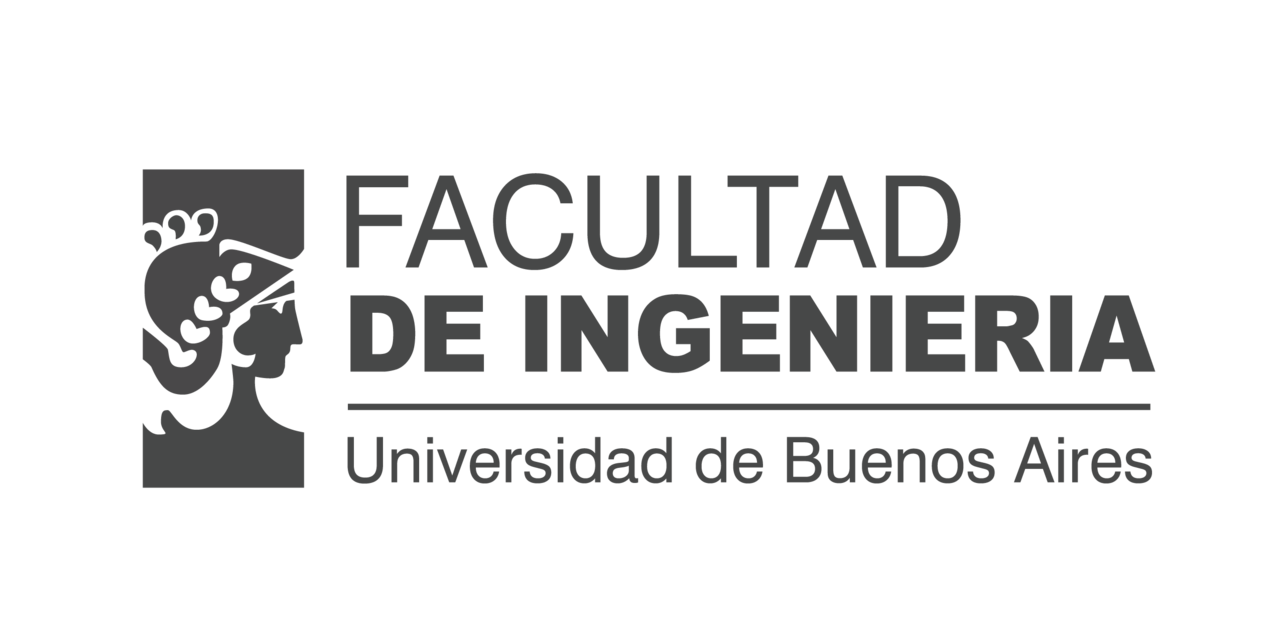

**Profesores:** <br />
Dr. Facundo Adrián Lucianna - facundolucianna@gmail.com <br />
Dr. Álvaro Gabriel Pizá - piza.ag@gmail.com <br />

**Alumnos:** <br />
Ing. Pablo Martin Gomez Verdini - gomezpablo86@gmail.com <br />
Ing. Diego Paciotti Iacchelli - diegopaciotti@gmail.com  <br />
Ing. Joaquin Gonzalez - joagonzalez@gmail.com <br />

**Repositorio Github**<br />
https://github.com/FIUBA-CEIA-18Co2024/AMIA-TP3 <br />


# Tabla de Contenido

1. [Carga de datasets](#carga-de-datasets)
2. [Regresión Logística para clasificación de reviews de TripAdvisor](#regresión-logística-para-clasificación-de-reviews-de-tripadvisor---inferencia-y-comparaciones-de-modelos)
3. [SVM y CatBoost para clasificación de reviews de TripAdvisor](#svm-y-catboost-para-clasificación-de-reviews-de-tripadvisor---inferencia-y-comparaciones-de-modelos)
    1. [Definiciones](#definiciones)
    2. [Datos para 5 clases](#datos-para-5-clases)
        1. [Instanciación de modelos con los mejores parámetros encontrados y evalucación para 5 clases](#instanciación-de-modelos-con-los-mejores-parámetros-encontrados-y-evalucación-para-5-clases)
            1. [LinearSVC (liblinear) para 5 clases](#linearsvc-liblinear-para-5-clases)
            2. [SVC kernel linear (LibSVM) para 5 clases](#svc-kernel-linear-libsvm-para-5-clases)
            3. [SVC kernel rbf (LibSVM) para 5 clases](#svc-kernel-rbf-libsvm-para-5-clases)
            4. [Catboost para 5 clases (GPU)](#catboost-para-5-clases-gpu)
        2. [Ensemble](#ensemble)
            1. [Hard voting classifier](#hard-voting-classifier)
            2. [Soft voting classifier](#soft-voting-classifier)
        3. [Comparación de modelos](#comparación-de-modelos)
    3. [Datos para 3 clases](#datos-para-3-clases)
        1. [Instanciación de modelos con los mejores parámetros encontrados y evalucación para 3 clases](#instanciación-de-modelos-con-los-mejores-parámetros-encontrados-y-evalucación-para-3-clases)
            1. [LinearSVC (liblinear) para 3 clases](#linearsvc-liblinear-para-3-clases)
            2. [SVC kernel linear (LibSVM) para 3 clases](#svc-kernel-linear-libsvm-para-3-clases)
            3. [SVC kernel rbf (LibSVM) para 3 clases](#svc-kernel-rbf-libsvm-para-3-clases)
            4. [Catboost para 3 clases (GPU)](#catboost-para-3-clases-gpu)
        2. [Ensemble](#ensemble-1)
            1. [Hard voting classifier](#hard-voting-classifier-1)
            2. [Soft voting classifier](#soft-voting-classifier-1)
    4. [Comparación de modelos](#comparación-de-modelos-1)

# Carga de datasets

In [1]:
# Se importan funciones auxiliares para entrenamiento, evaluación y visualización de resultados
from lib.utils import *

In [2]:
dataset = pd.read_csv('data/cleaned_dataset_processed_balanced.csv').sample(n=20508, random_state=42) # 20508
print(dataset.head(5))
print(dataset.shape)

X = dataset['cleaned_review']
y = dataset['rating']
y_three = dataset['three_classes']

X_train, X_test, y_train, y_test = split_data_stratified(X, y)

X_train_three, X_test_three, y_train_three, y_test_three = split_data_stratified(X, y_three)

                                                  review  rating  \
11368  great hotel just returned hotel stayed 24.08 3...       4   
2605   not worth price stayed whirlpool suite 269 nig...       3   
4518   great location clean rooms reviewers hotel gre...       4   
10638  service service, arrived renaissance friday ex...       2   
1962   Title: A Comfortable yet Imperfect Overnight D...       2   

       three_classes                                     cleaned_review  
11368              2  great returned originally petite double tight ...  
2605               1  not worth price whirlpool suite nice worth pri...  
4518               2  great location clean reviewers great bargain l...  
10638              0  service service arrived renaissance friday exp...  
1962               0  title comfortable yet imperfect overnight rece...  
(20508, 4)
Class distribution in splits:

Training set:
rating
1    2201
2    2498
3    2035
4    4030
5    5642
Name: count, dtype: int64

Test se

# Regresión Logística para clasificación de reviews de TripAdvisor

Para un problema de análisis de sentimiento con 5 clases (ratings del 1 al 5), la regresión logística multiclase podría ser una buena opción por los siguientes motivos:

1. **Naturaleza del problema**: La regresión logística multiclase es especialmente adecuada para problemas de clasificación donde:
   - Las clases son mutuamente excluyentes (una review solo puede tener un rating)

2. **Interpretabilidad**: A diferencia de modelos más complejos como redes neuronales, la regresión logística:
   - Permite entender qué palabras o características tienen mayor peso en la clasificación
   - Facilita la explicabilidad del modelo al equipo de negocio
   - Provee probabilidades interpretables para cada clase

3. **Eficiencia computacional**:
   - Es más rápida de entrenar que modelos más complejos
   - Requiere menos datos para obtener buenos resultados
   - Es menos propensa al sobreajuste

4. **Buen baseline**: 
   - Sirve como punto de referencia sólido para comparar con modelos más sofisticados
   - Permite establecer un rendimiento mínimo esperado
   - Ayuda a determinar si vale la pena la complejidad adicional de otros modelos

Entendemos que es una elección sólida para este problema de análisis de sentimiento porque permite modelar la naturaleza ordinal de las calificaciones (1-5 estrellas) de manera interpretable y computacionalmente eficiente. Su capacidad para manejar múltiples clases mientras mantiene la simplicidad del modelo la hace ideal como **baseline**, permitiendo entender qué características del texto son más relevantes para la clasificación. Entendemos que, teniendo esta base de performance, modelos mas complejos deberían tener la capacidad de absorber otros patrones y, en consecuencia, mostrar una mejor performance.

## Requerimientos

In [ ]:
# Dependencias
from IPython.display import display, Markdown
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

image_path = "diagrams/training_grid_pipeline.png"
base64_string = encode_image_to_base64(image_path)

# Create the Markdown string with the base64 image
markdown_string = f'![Text_Pipeline](data:image/png;base64,{base64_string})'

## Pipeline


1. Transformación de labels (1-5 a 0-4 | 1-3 a 0-2 )
2. Se preparan 4 variantes principales con TfidfVectorizer y LogisticRegression:
   - Basic pipeline
   - Con scaling
   - Con PCA (TruncatedSVD)
   - Con PCA y scaling
3. Se utiliza GridSearchCV para cada pipeline
4. Se registran metricas de entrenamiento y performance

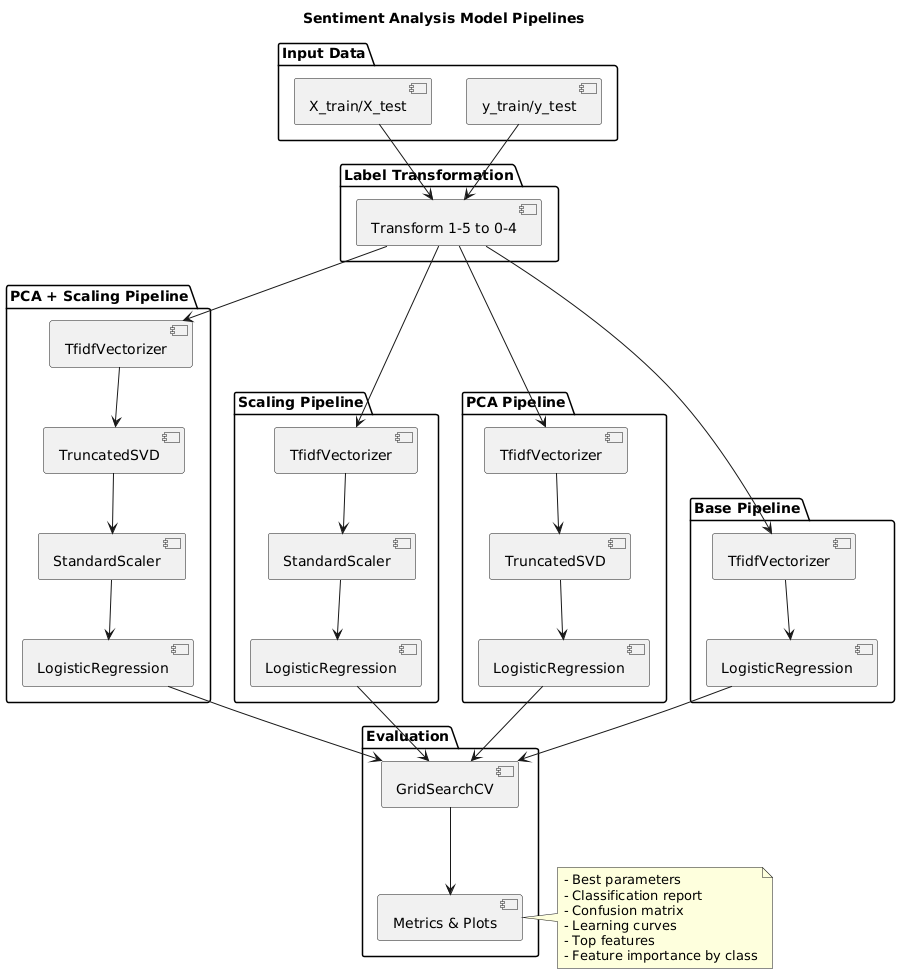

In [ ]:
# Display the Markdown
display(Markdown(markdown_string))

## Entrenamiento y busqueda de parámetros para regresión logística

In [ ]:
def create_param_grids():
    """Define parameter grids for each model"""
    param_grids = {
        'Logistic Regression': {
            'vectorizer__max_features': [1000, 3000, 8000, 10000, 15000], # [1000, 3000, 8000, 10000, 15000]
            'vectorizer__ngram_range': [(1,1), (1,2)],
            'classifier__C': [0.1, 1.0, 10.0, 12.0],
            'classifier__class_weight': ['balanced'],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['saga', 'liblinear']
        },
        'With Scaling': {
            'vectorizer__max_features': [1000, 3000, 8000, 10000, 15000],
            'vectorizer__ngram_range': [(1,1), (1,2)],
            'scaler__with_mean': [False],  # Correct way to parameterize scaler
            'classifier__C': [0.1, 1.0, 10.0, 12.0],
            'classifier__class_weight': ['balanced'],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['saga', 'liblinear']
        },
        'With PCA': {
            'vectorizer__max_features': [1000, 3000, 8000, 10000, 15000],
            'vectorizer__ngram_range': [(1,1), (1,2)],
            'dim_reduction__n_components': [50, 100, 200],
            'classifier__C': [0.1, 1.0, 10.0, 12.0],
            'classifier__class_weight': ['balanced'],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['saga', 'liblinear']
        },
        'PCA + Scaling': {
            'vectorizer__max_features': [1000, 3000, 8000, 10000, 15000],
            'vectorizer__ngram_range': [(1,1), (1,2)],
            'dim_reduction__n_components': [50, 100, 200],
            'scaler__with_mean': [False],  # Correct way to parameterize scaler
            'classifier__C': [0.1, 1.0, 10.0, 12.0],
            'classifier__class_weight': ['balanced'],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['saga', 'liblinear']
        },

    }
    return param_grids

### Cinco Clases


Training Logistic Regression with Grid Search...
Fitting 3 folds for each of 160 candidates, totalling 480 fits


/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  


Logistic Regression Results:
Best parameters: {'classifier__C': 1.0, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'vectorizer__max_features': 15000, 'vectorizer__ngram_range': (1, 2)}
Best CV score: 0.660
Training accuracy: 0.829
Testing accuracy: 0.664
Fit time: 7.010 seconds

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.87      0.84       550
           2       0.75      0.62      0.68       625
           3       0.51      0.49      0.50       509
           4       0.53      0.49      0.51      1007
           5       0.71      0.79      0.75      1411

    accuracy                           0.66      4102
   macro avg       0.66      0.65      0.65      4102
weighted avg       0.66      0.66      0.66      4102



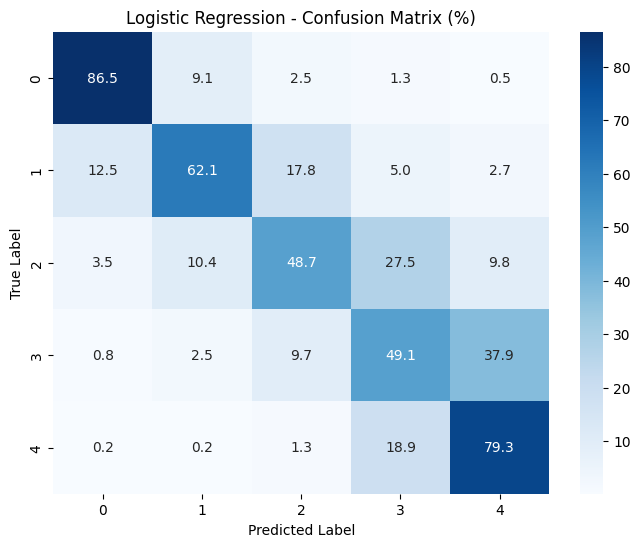

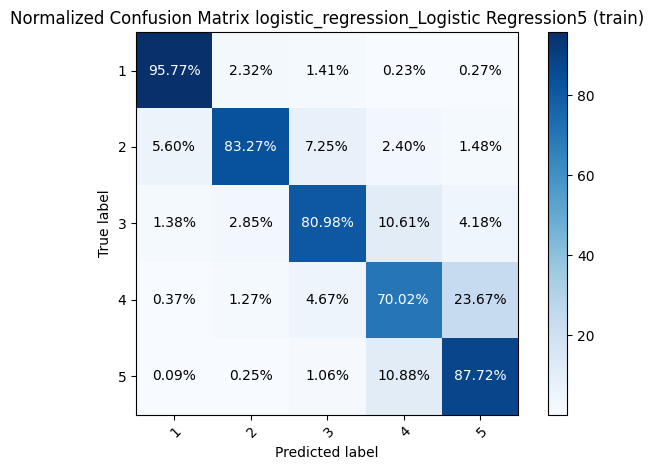

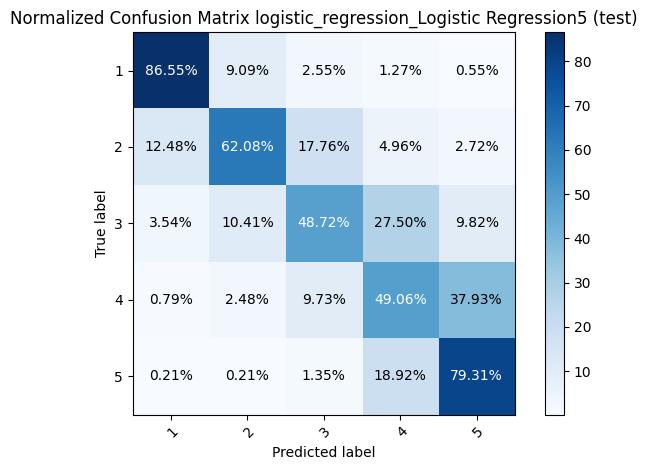

'Y Test'

(array([1, 2, 3, 4, 5]), array([ 550,  625,  509, 1007, 1411]))

'Y Test Predictions'

(array([1, 2, 3, 4, 5]), array([ 583,  519,  490,  939, 1571]))

Score for logistic_regression_Logistic Regression5


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             1   0.816467  0.865455  0.840247    550.0       NaN         NaN   
1             2   0.747592  0.620800  0.678322    625.0       NaN         NaN   
2             3   0.506122  0.487230  0.496496    509.0       NaN         NaN   
3             4   0.526092  0.490566  0.507708   1007.0       NaN         NaN   
4             5   0.712285  0.793055  0.750503   1411.0       NaN         NaN   
5      accuracy        NaN       NaN       NaN      NaN   0.66431         NaN   
6     macro avg   0.661711  0.651421  0.654655   4102.0       NaN         NaN   
7  weighted avg   0.660343  0.664310  0.660416   4102.0       NaN         NaN   
8    time_train        NaN       NaN       NaN      NaN       NaN    7.010329   

                                    Modelo  
0  logistic_regression_Logistic Regression  
1  logistic_regression_Logistic Regression  
2  logistic_regression_Logistic Regression  
3  logistic_regression_Logistic Regression  
4  logistic_regression_Logistic Regression  
5  logistic_regression_Logistic Regression  
6  logistic_regression_Logistic Regression  
7  logistic_regression_Logistic Regression  
8  logistic_regression_Logistic Regression

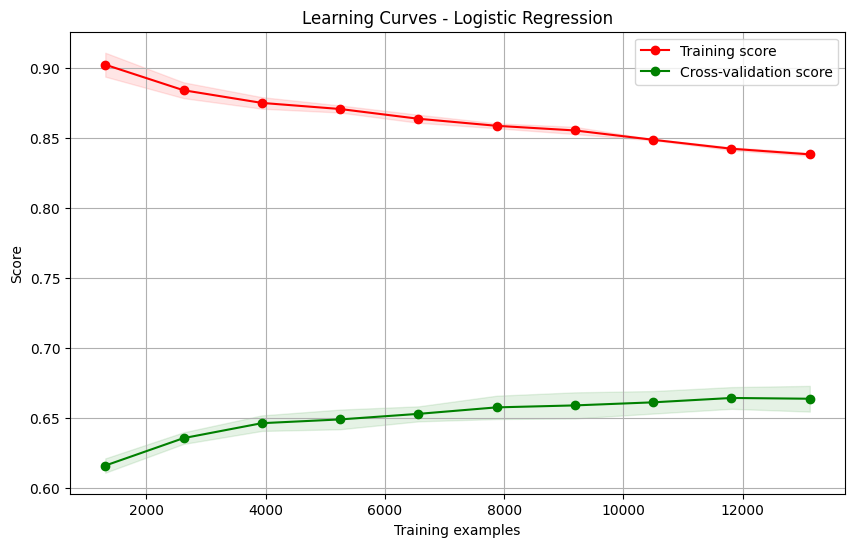


Grid Search Results for Logistic Regression:


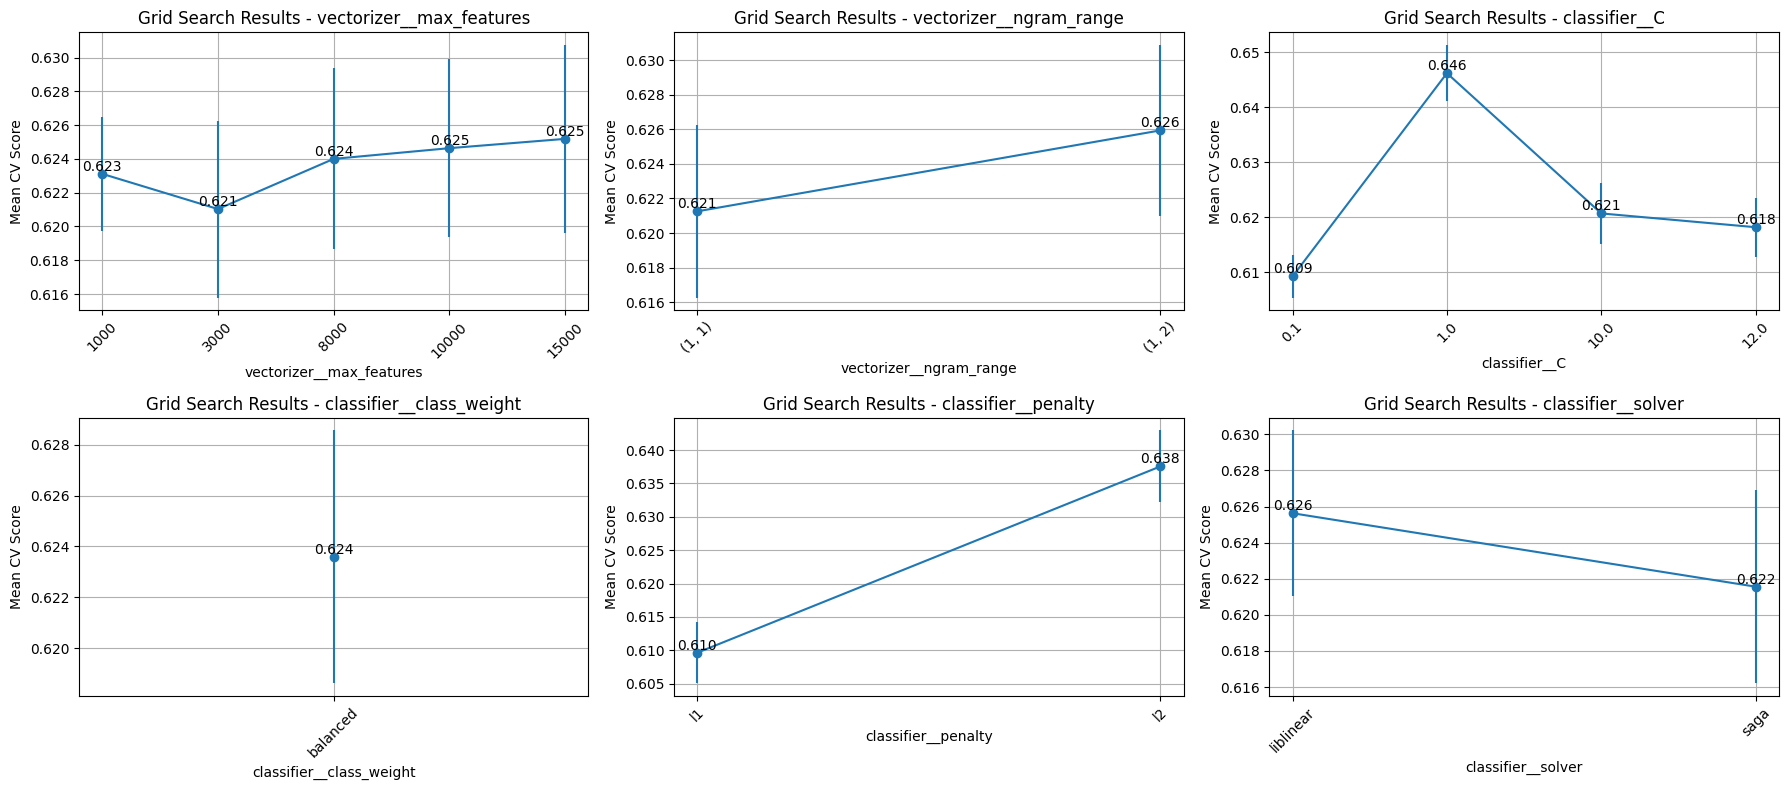


Top Features for Logistic Regression:


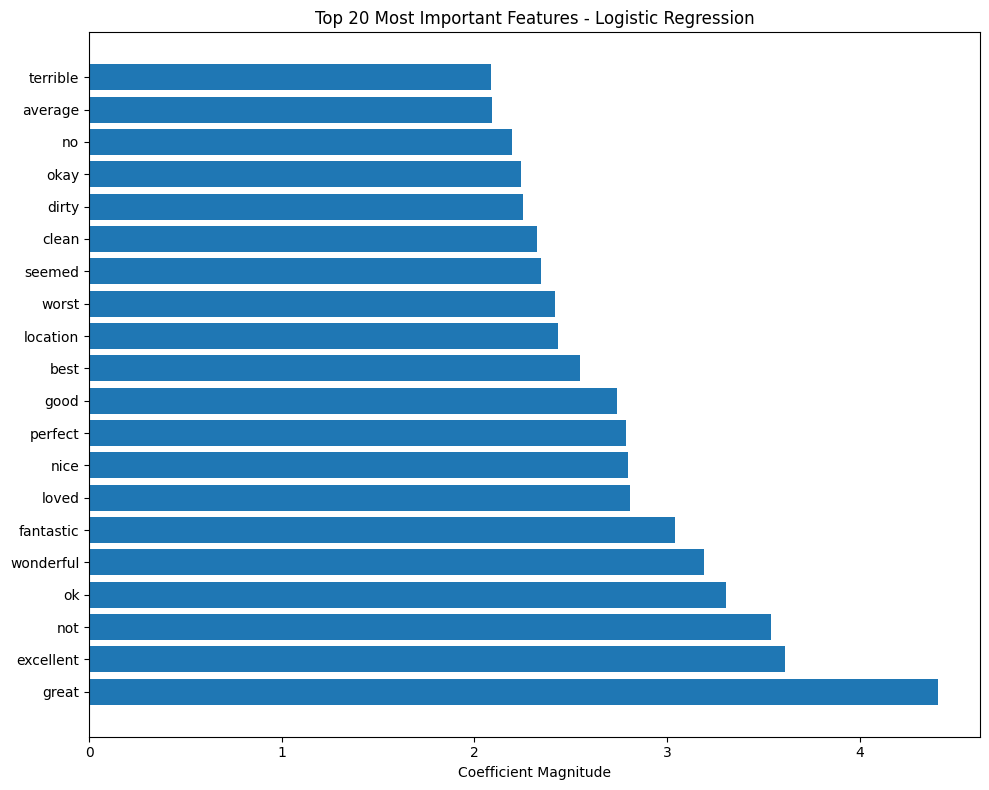


Class-specific Features for Logistic Regression:


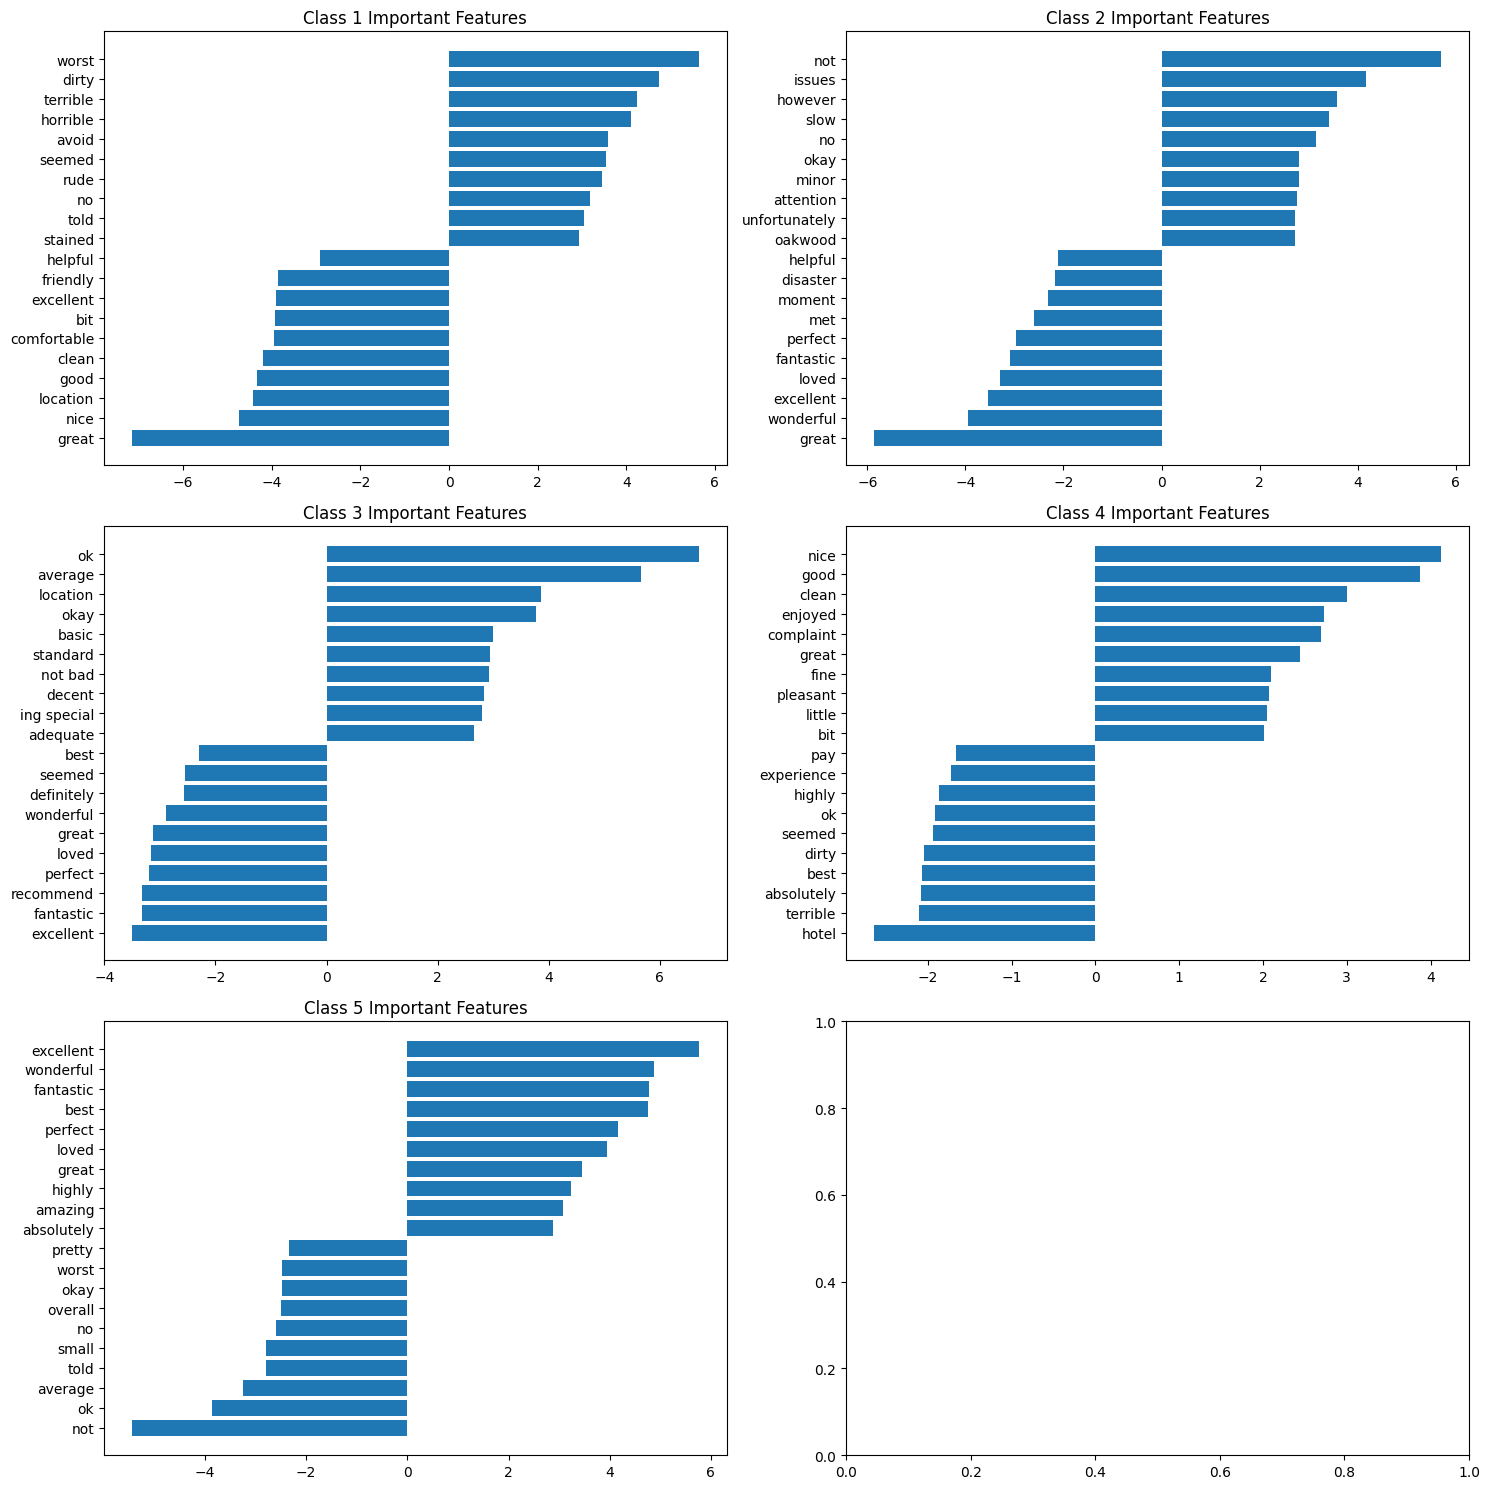


Training With Scaling with Grid Search...
Fitting 3 folds for each of 160 candidates, totalling 480 fits


/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  


With Scaling Results:
Best parameters: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'scaler__with_mean': False, 'vectorizer__max_features': 1000, 'vectorizer__ngram_range': (1, 2)}
Best CV score: 0.632
Training accuracy: 0.730
Testing accuracy: 0.637
Fit time: 6.968 seconds

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.82      0.80       550
           2       0.68      0.61      0.64       625
           3       0.46      0.48      0.47       509
           4       0.50      0.47      0.49      1007
           5       0.72      0.75      0.73      1411

    accuracy                           0.64      4102
   macro avg       0.63      0.63      0.63      4102
weighted avg       0.63      0.64      0.63      4102



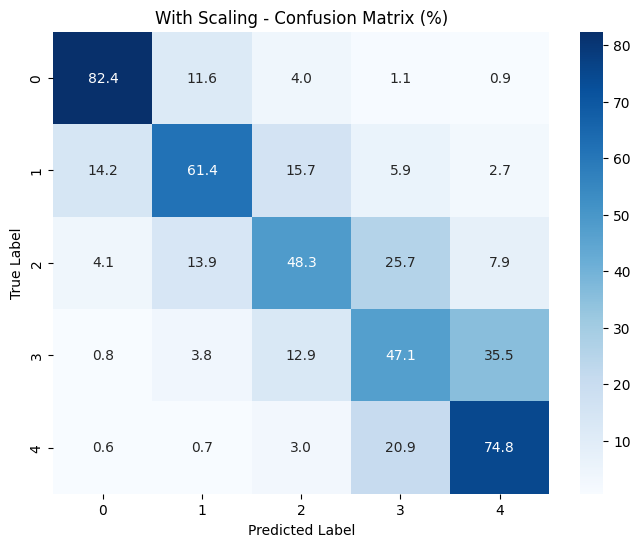

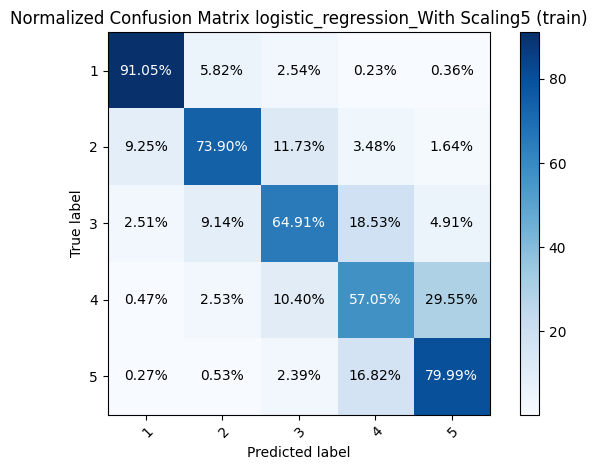

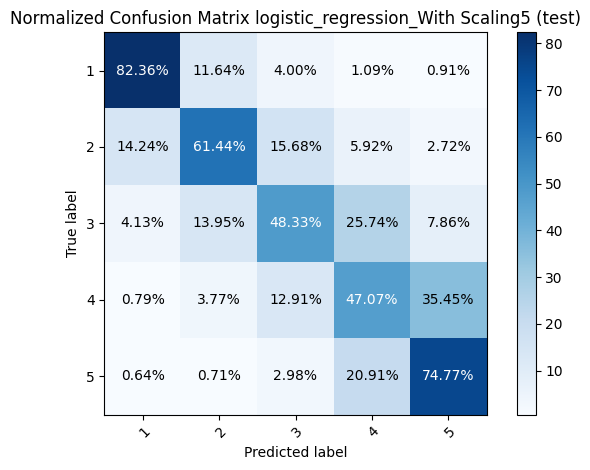

'Y Test'

(array([1, 2, 3, 4, 5]), array([ 550,  625,  509, 1007, 1411]))

'Y Test Predictions'

(array([1, 2, 3, 4, 5]), array([ 580,  567,  538,  943, 1474]))

Score for logistic_regression_With Scaling5


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             1   0.781034  0.823636  0.801770    550.0       NaN         NaN   
1             2   0.677249  0.614400  0.644295    625.0       NaN         NaN   
2             3   0.457249  0.483301  0.469914    509.0       NaN         NaN   
3             4   0.502651  0.470705  0.486154   1007.0       NaN         NaN   
4             5   0.715739  0.747697  0.731369   1411.0       NaN         NaN   
5      accuracy        NaN       NaN       NaN      NaN  0.636763         NaN   
6     macro avg   0.626785  0.627948  0.626700   4102.0       NaN         NaN   
7  weighted avg   0.634244  0.636763  0.634901   4102.0       NaN         NaN   
8    time_train        NaN       NaN       NaN      NaN       NaN    6.968464   

                             Modelo  
0  logistic_regression_With Scaling  
1  logistic_regression_With Scaling  
2  logistic_regression_With Scaling  
3  logistic_regression_With Scaling  
4  logistic_regression_With Scaling  
5  logistic_regression_With Scaling  
6  logistic_regression_With Scaling  
7  logistic_regression_With Scaling  
8  logistic_regression_With Scaling

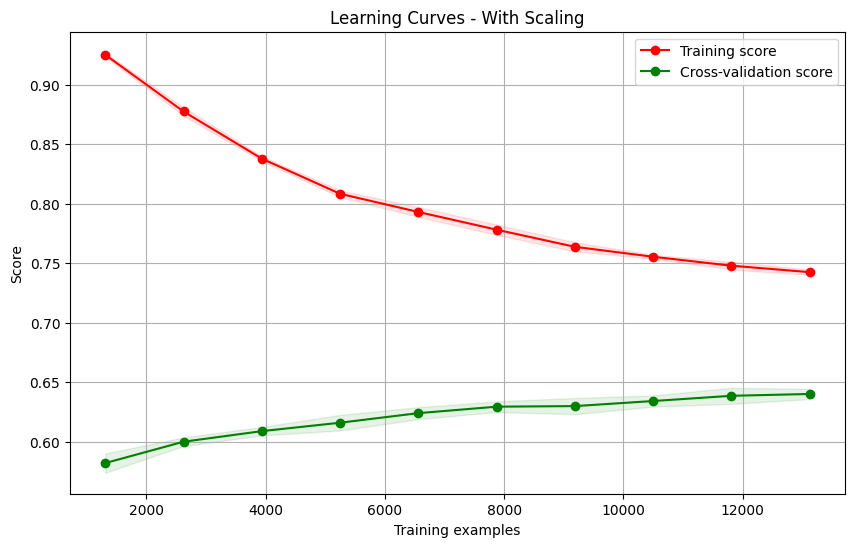


Grid Search Results for With Scaling:


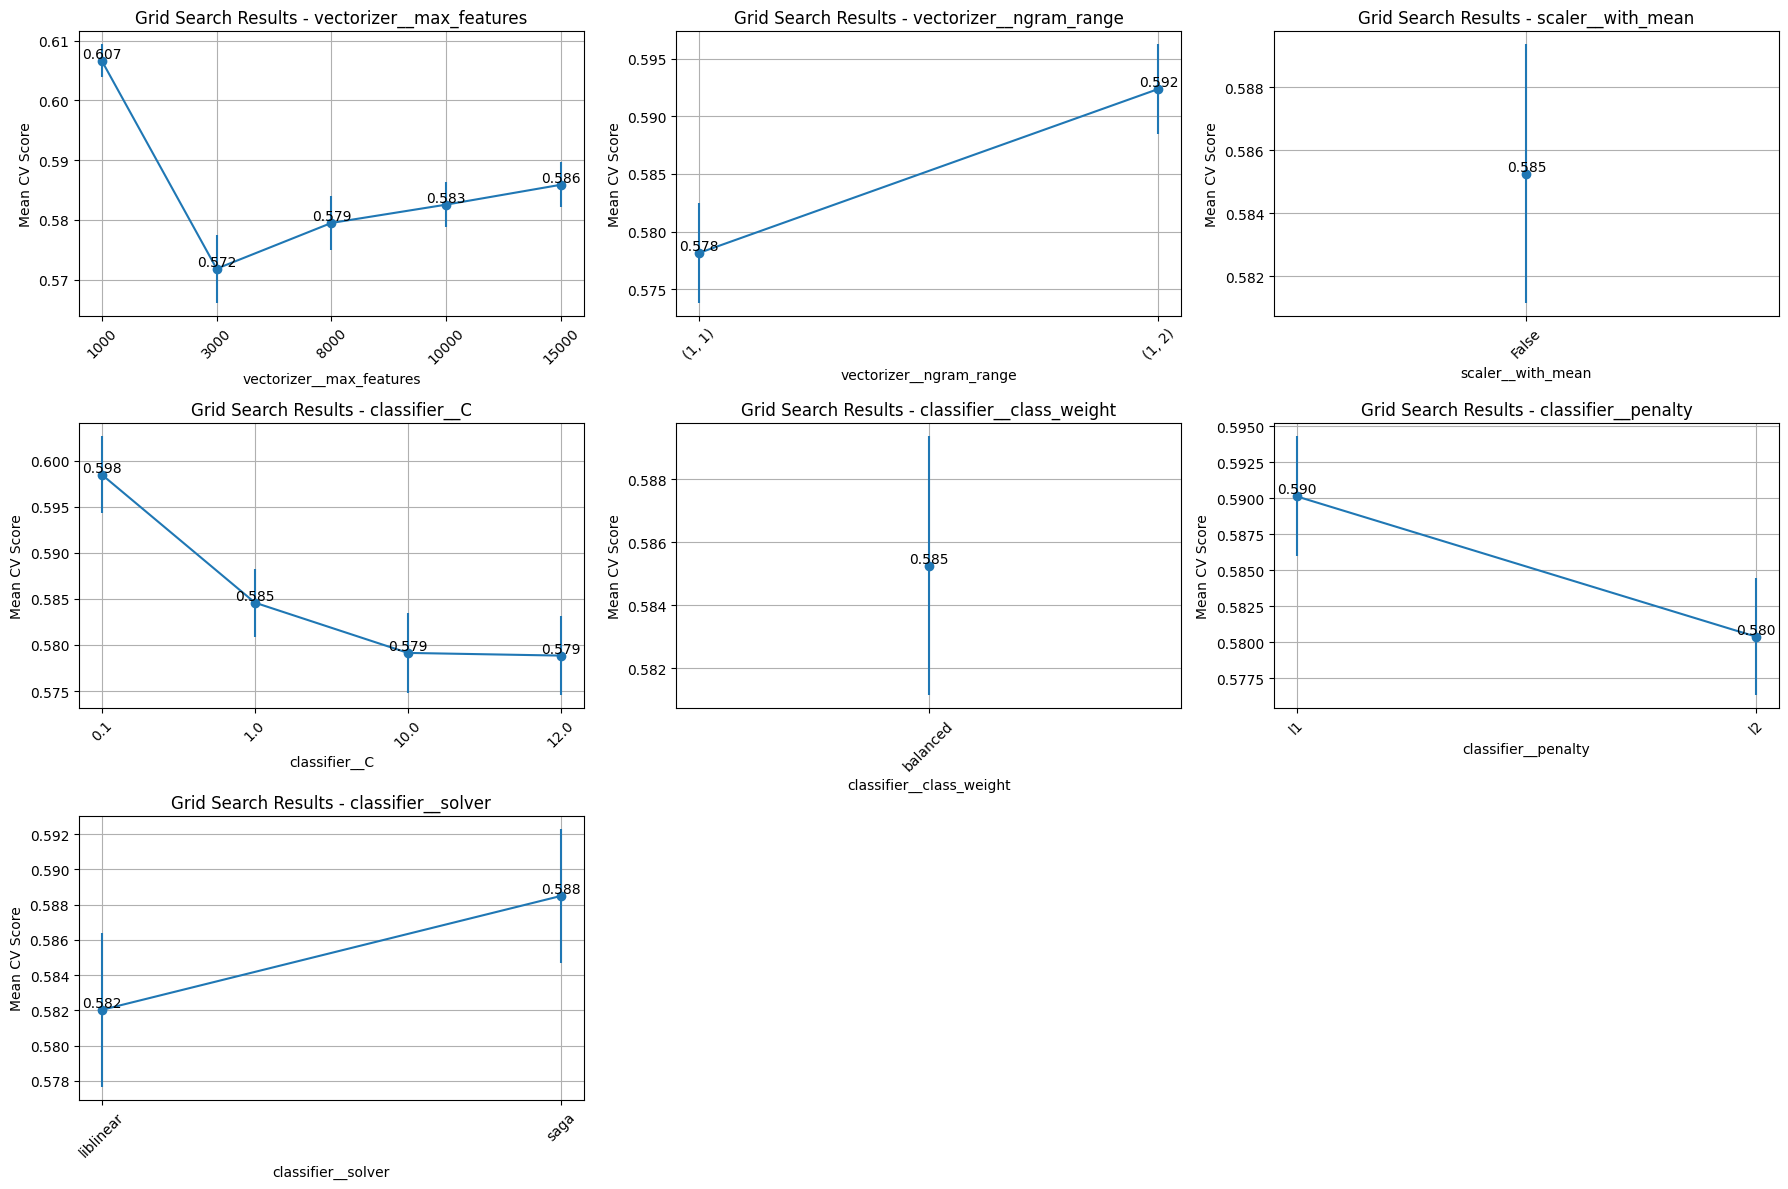


Top Features for With Scaling:
Could not plot feature importance for With Scaling: local variable 'importances' referenced before assignment

Class-specific Features for With Scaling:

Training With PCA with Grid Search...
Fitting 3 folds for each of 480 candidates, totalling 1440 fits

With PCA Results:
Best parameters: {'classifier__C': 12.0, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'saga', 'dim_reduction__n_components': 200, 'vectorizer__max_features': 8000, 'vectorizer__ngram_range': (1, 2)}
Best CV score: 0.660
Training accuracy: 0.686
Testing accuracy: 0.650
Fit time: 49.010 seconds

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.85      0.84       550
           2       0.73      0.66      0.70       625
           3       0.46      0.56      0.51       509
           4       0.50      0.53      0.51      1007
           5       0.76      0.68      0.72      1411

   

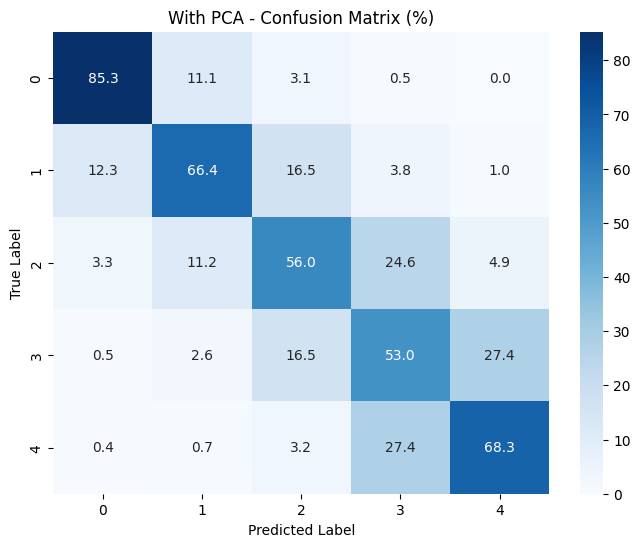

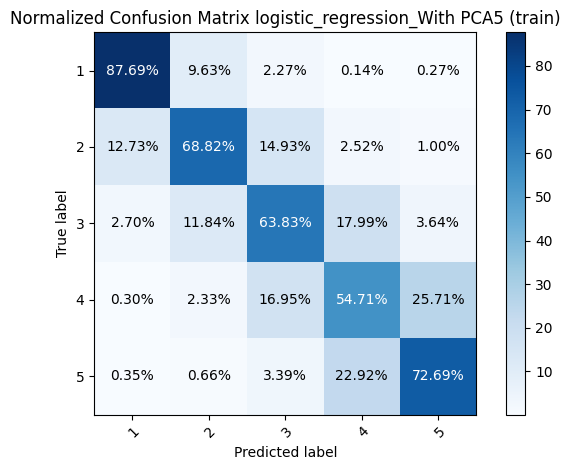

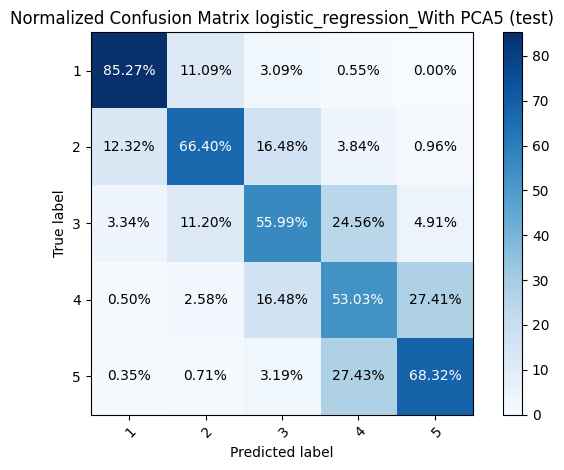

'Y Test'

(array([1, 2, 3, 4, 5]), array([ 550,  625,  509, 1007, 1411]))

'Y Test Predictions'

(array([1, 2, 3, 4, 5]), array([ 573,  569,  616, 1073, 1271]))

Score for logistic_regression_With PCA5


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             1   0.818499  0.852727  0.835263    550.0       NaN         NaN   
1             2   0.729350  0.664000  0.695142    625.0       NaN         NaN   
2             3   0.462662  0.559921  0.506667    509.0       NaN         NaN   
3             4   0.497670  0.530288  0.513462   1007.0       NaN         NaN   
4             5   0.758458  0.683203  0.718867   1411.0       NaN         NaN   
5      accuracy        NaN       NaN       NaN      NaN  0.650171         NaN   
6     macro avg   0.653328  0.658028  0.653880   4102.0       NaN         NaN   
7  weighted avg   0.661348  0.650171  0.654102   4102.0       NaN         NaN   
8    time_train        NaN       NaN       NaN      NaN       NaN   49.010344   

                         Modelo  
0  logistic_regression_With PCA  
1  logistic_regression_With PCA  
2  logistic_regression_With PCA  
3  logistic_regression_With PCA  
4  logistic_regression_With PCA  
5  logistic_regression_With PCA  
6  logistic_regression_With PCA  
7  logistic_regression_With PCA  
8  logistic_regression_With PCA

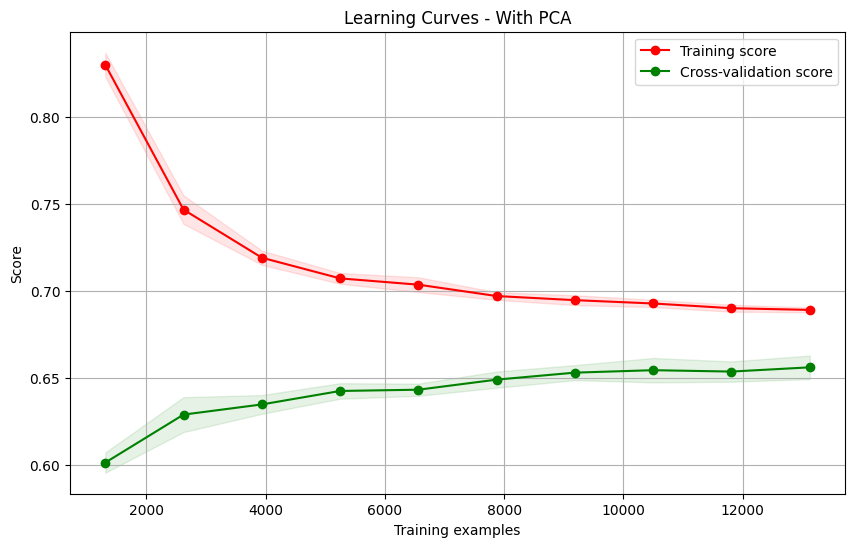


Grid Search Results for With PCA:


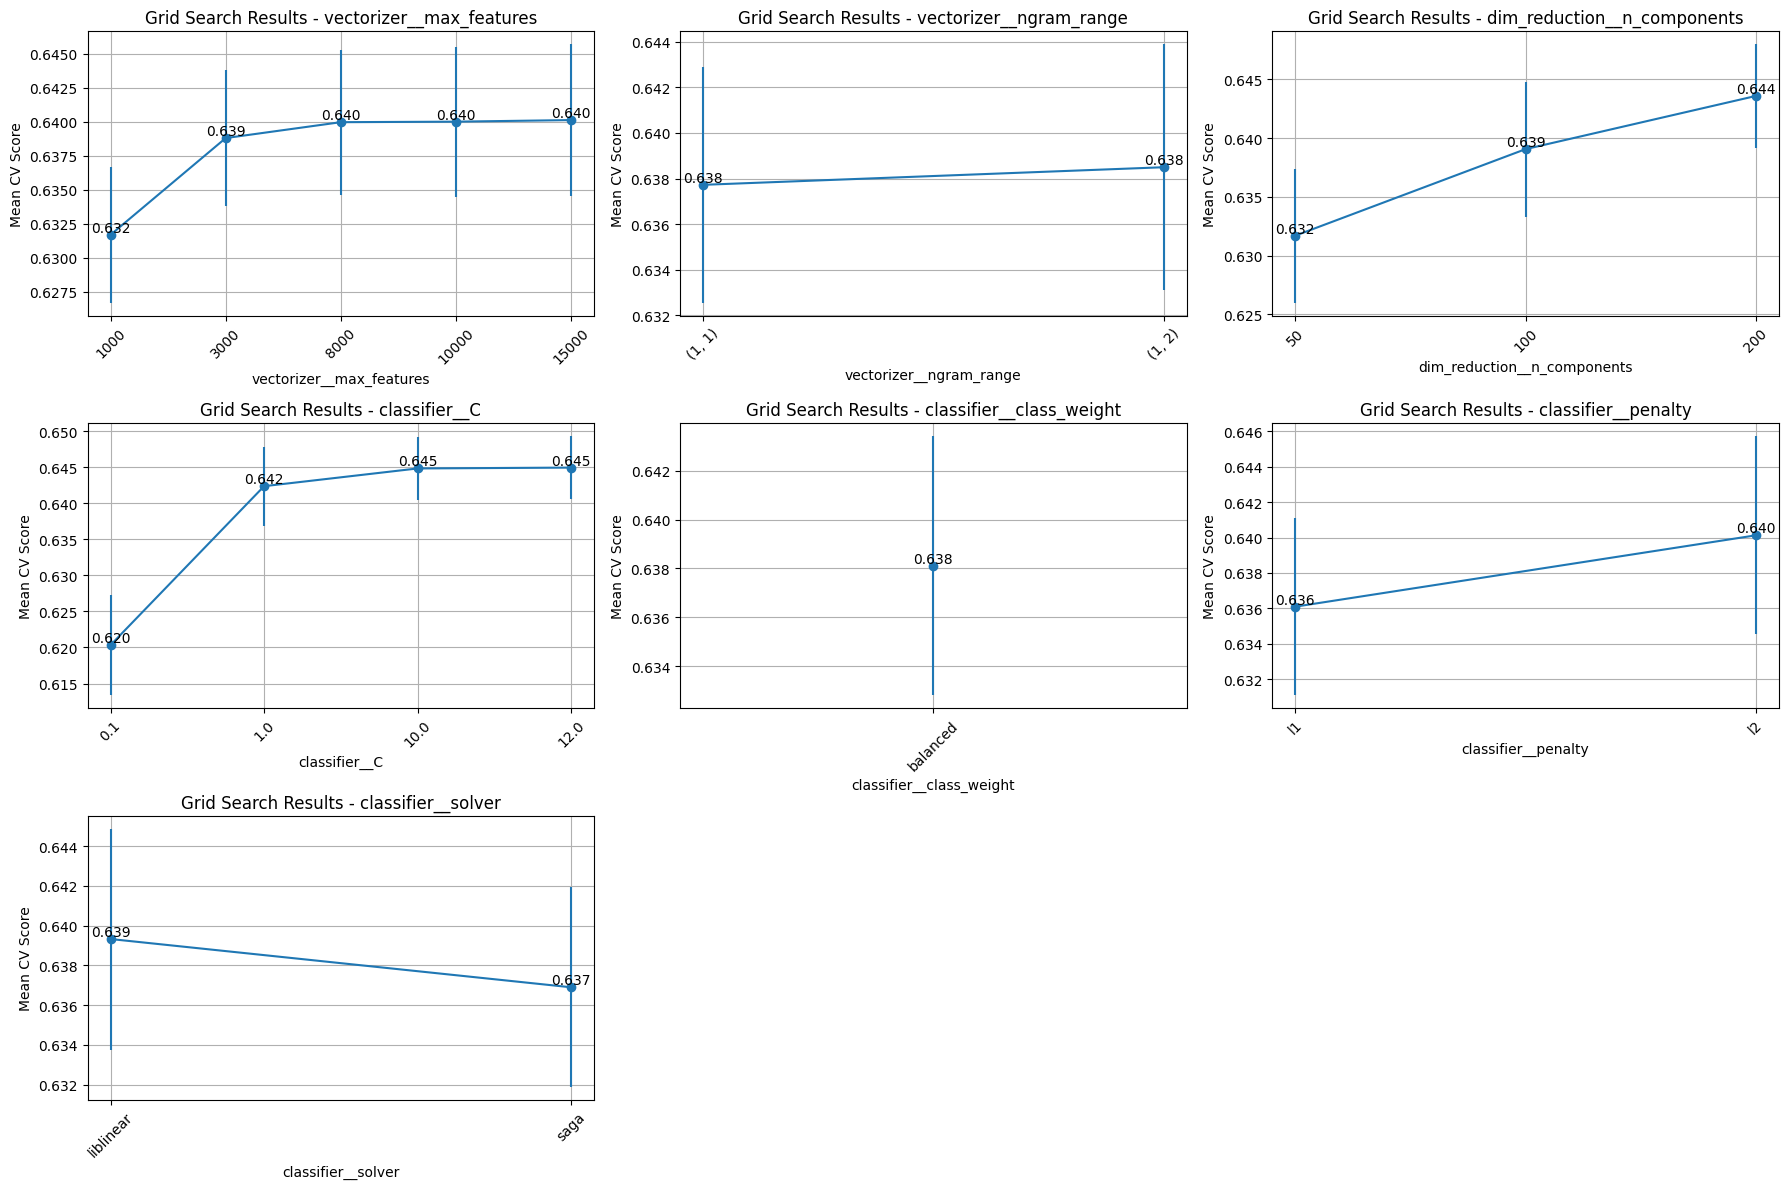


Top Features for With PCA:
Could not plot feature importance for With PCA: local variable 'importances' referenced before assignment

Class-specific Features for With PCA:

Training PCA + Scaling with Grid Search...
Fitting 3 folds for each of 480 candidates, totalling 1440 fits

PCA + Scaling Results:
Best parameters: {'classifier__C': 10.0, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'saga', 'dim_reduction__n_components': 200, 'scaler__with_mean': False, 'vectorizer__max_features': 15000, 'vectorizer__ngram_range': (1, 2)}
Best CV score: 0.659
Training accuracy: 0.687
Testing accuracy: 0.652
Fit time: 34.643 seconds

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.84      0.83       550
           2       0.71      0.65      0.68       625
           3       0.47      0.58      0.52       509
           4       0.51      0.54      0.52      1007
           5       0.76      0.

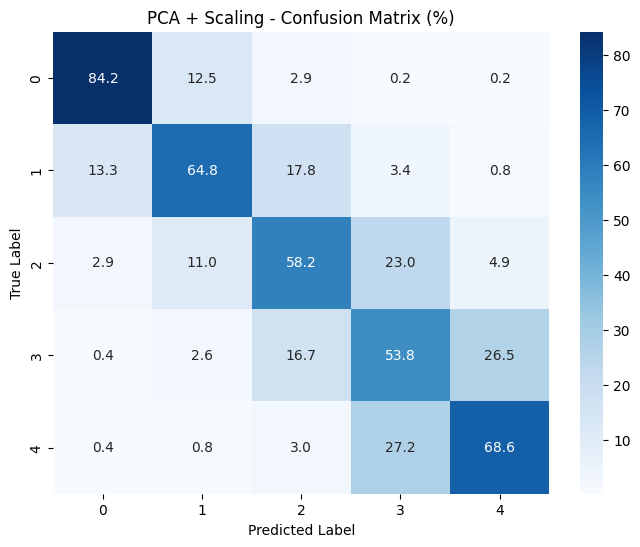

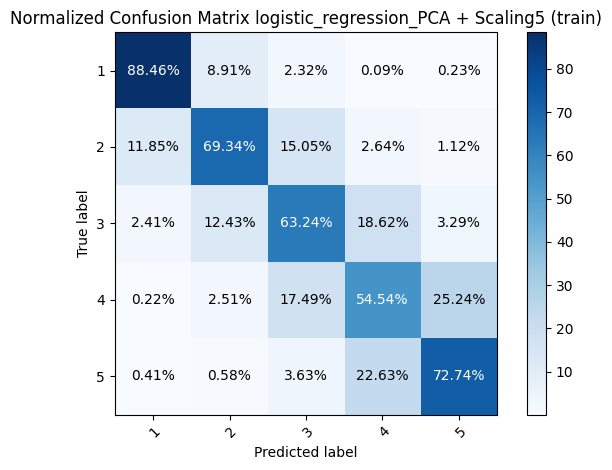

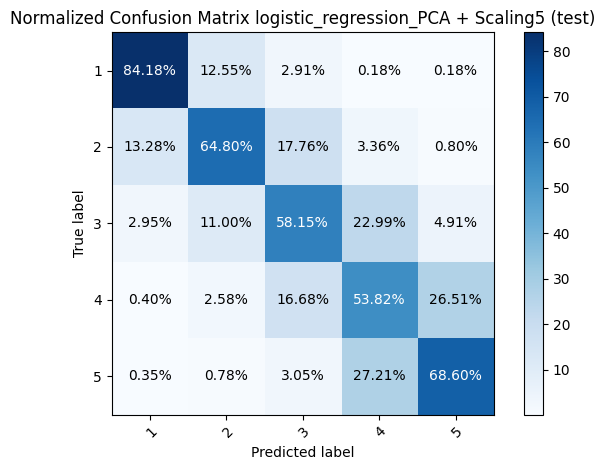

'Y Test'

(array([1, 2, 3, 4, 5]), array([ 550,  625,  509, 1007, 1411]))

'Y Test Predictions'

(array([1, 2, 3, 4, 5]), array([ 570,  567,  634, 1065, 1266]))

Score for logistic_regression_PCA + Scaling5


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             1   0.812281  0.841818  0.826786    550.0       NaN         NaN   
1             2   0.714286  0.648000  0.679530    625.0       NaN         NaN   
2             3   0.466877  0.581532  0.517935    509.0       NaN         NaN   
3             4   0.508920  0.538232  0.523166   1007.0       NaN         NaN   
4             5   0.764613  0.686038  0.723198   1411.0       NaN         NaN   
5      accuracy        NaN       NaN       NaN      NaN  0.651877         NaN   
6     macro avg   0.653395  0.659124  0.654123   4102.0       NaN         NaN   
7  weighted avg   0.663621  0.651877  0.655858   4102.0       NaN         NaN   
8    time_train        NaN       NaN       NaN      NaN       NaN   34.643008   

                              Modelo  
0  logistic_regression_PCA + Scaling  
1  logistic_regression_PCA + Scaling  
2  logistic_regression_PCA + Scaling  
3  logistic_regression_PCA + Scaling  
4  logistic_regression_PCA + Scaling  
5  logistic_regression_PCA + Scaling  
6  logistic_regression_PCA + Scaling  
7  logistic_regression_PCA + Scaling  
8  logistic_regression_PCA + Scaling

/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

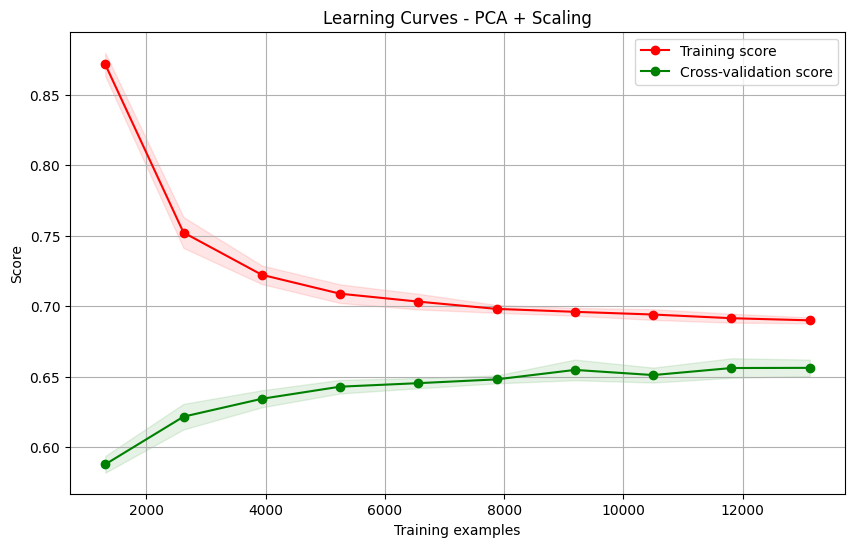


Grid Search Results for PCA + Scaling:


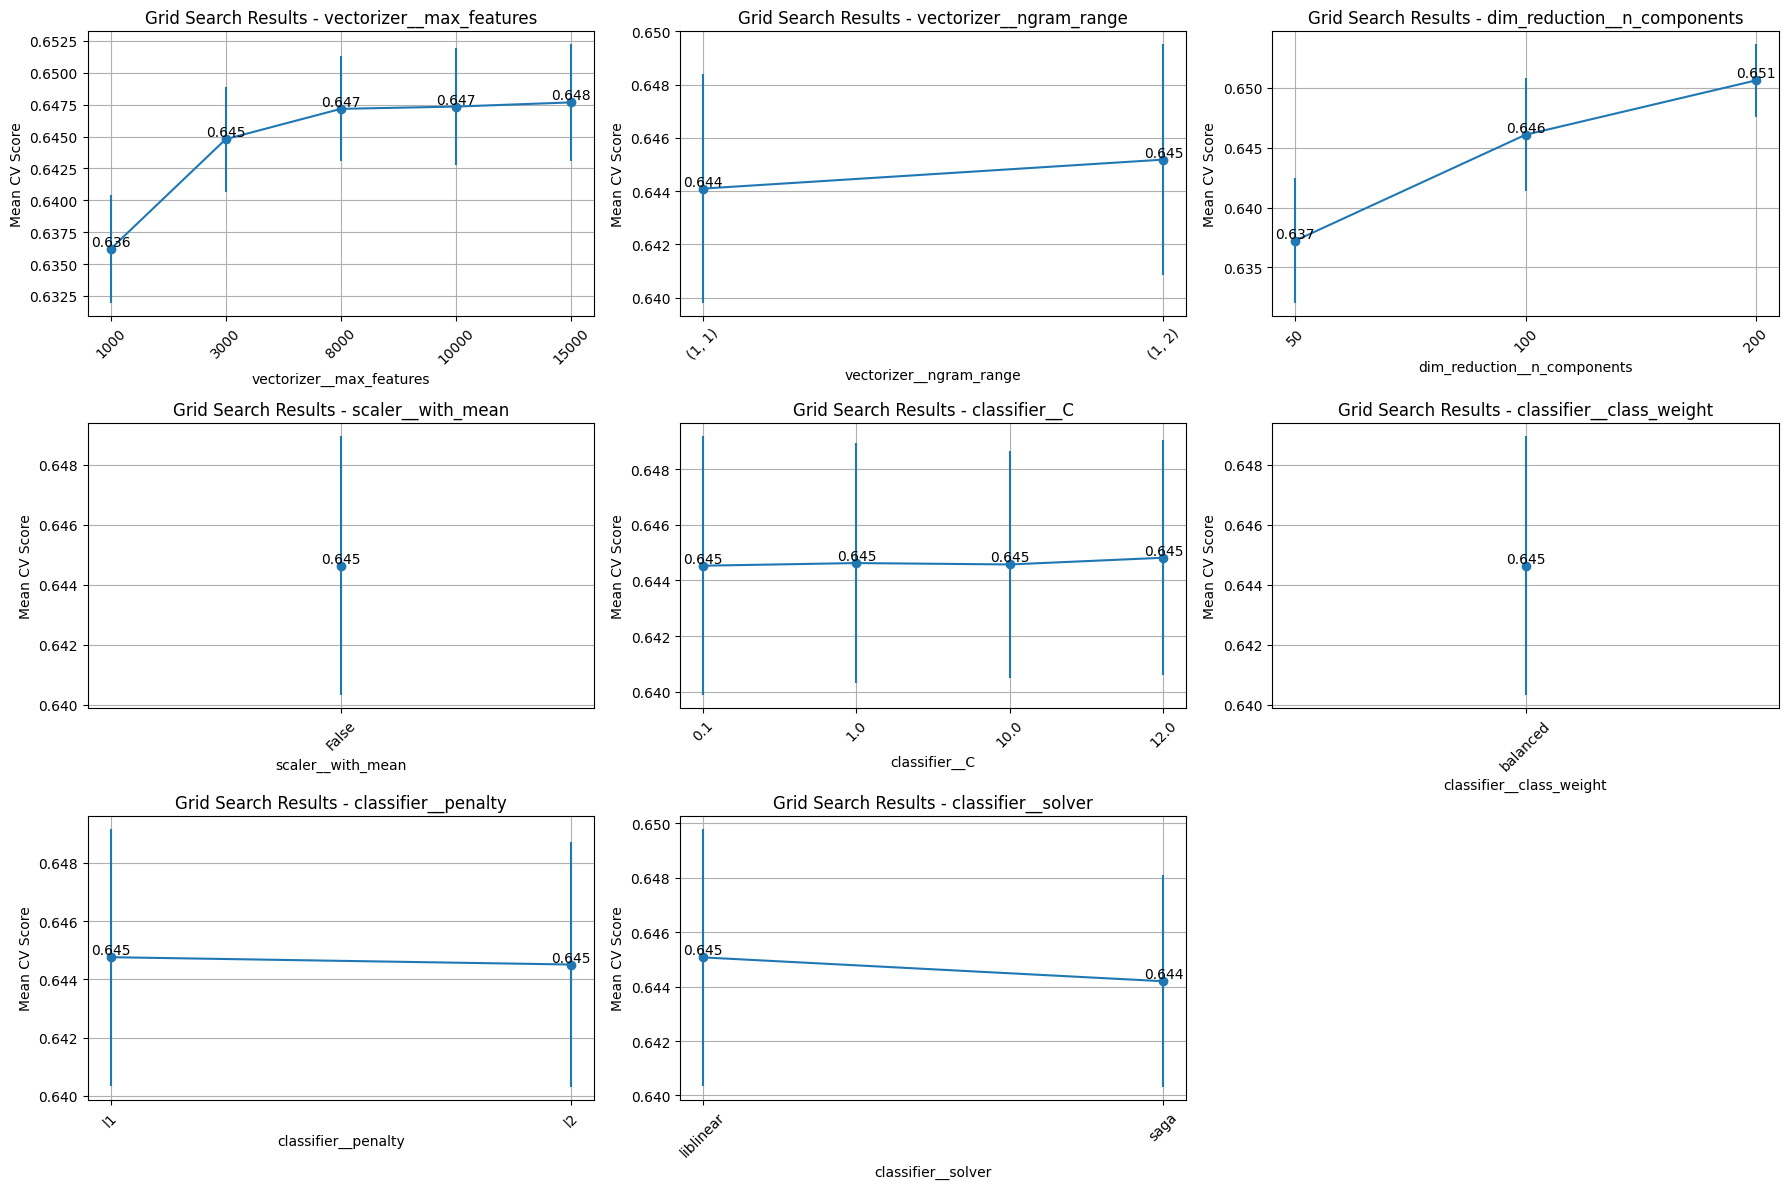


Top Features for PCA + Scaling:
Could not plot feature importance for PCA + Scaling: local variable 'importances' referenced before assignment

Class-specific Features for PCA + Scaling:


In [ ]:
# Compare models
results = compare_models_with_grid_search(X_train, X_test, y_train, y_test, classes="5")

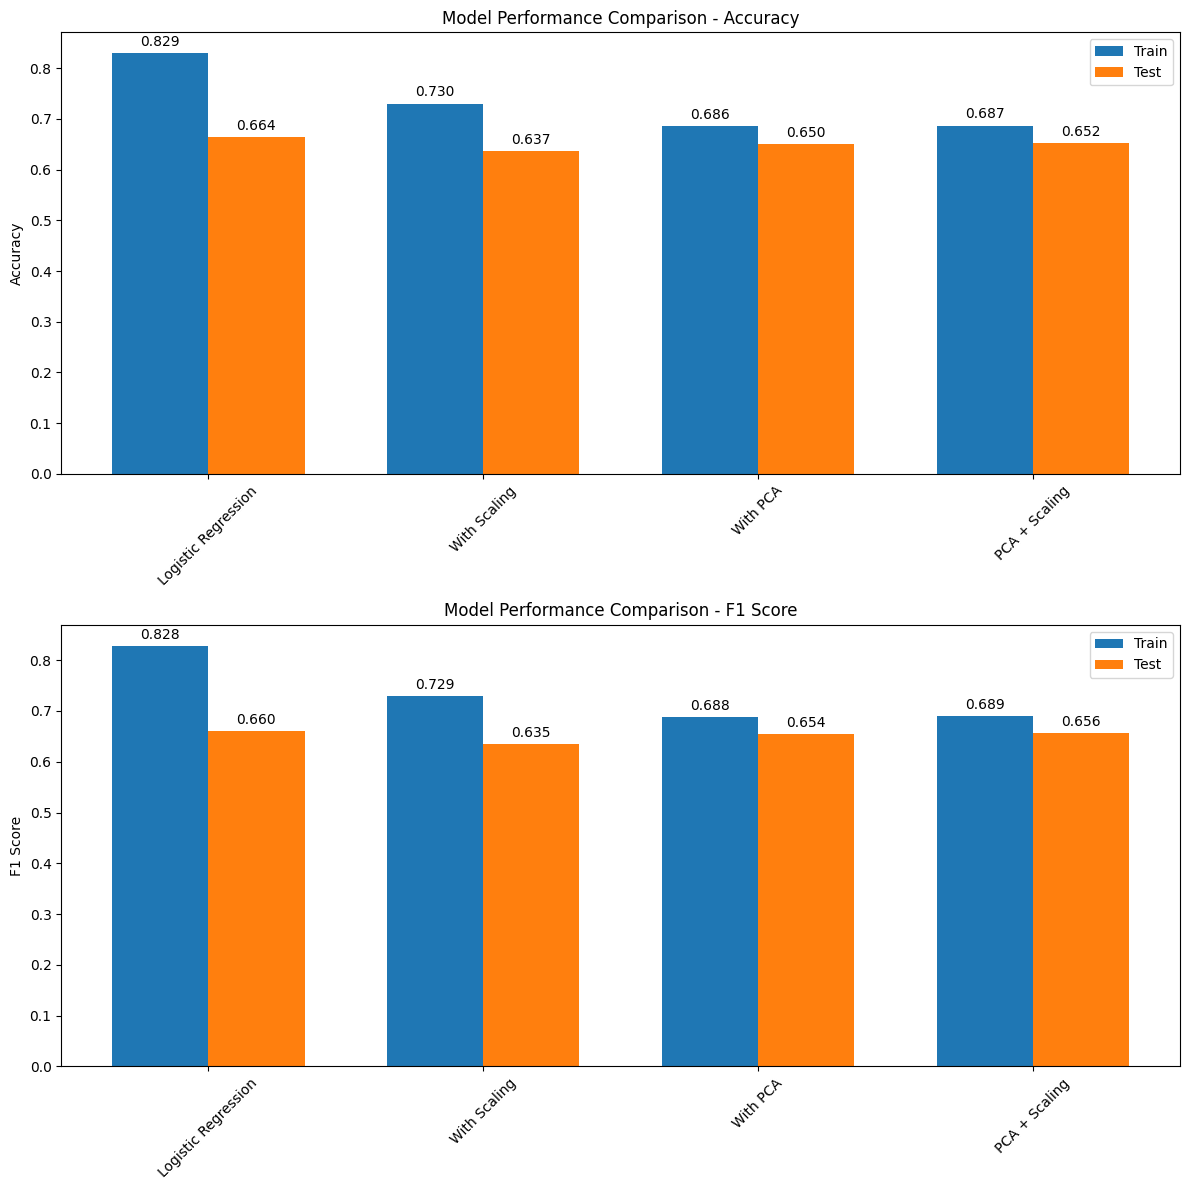

In [ ]:
# Plot comparison
plot_model_comparison(results)

### Tres Clases


Training Logistic Regression with Grid Search...
Fitting 3 folds for each of 160 candidates, totalling 480 fits


/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  


Logistic Regression Results:
Best parameters: {'classifier__C': 1.0, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'vectorizer__max_features': 15000, 'vectorizer__ngram_range': (1, 2)}
Best CV score: 0.867
Training accuracy: 0.929
Testing accuracy: 0.862
Fit time: 5.612 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1175
           1       0.54      0.45      0.49       509
           2       0.89      0.94      0.92      2418

    accuracy                           0.86      4102
   macro avg       0.78      0.76      0.77      4102
weighted avg       0.85      0.86      0.86      4102



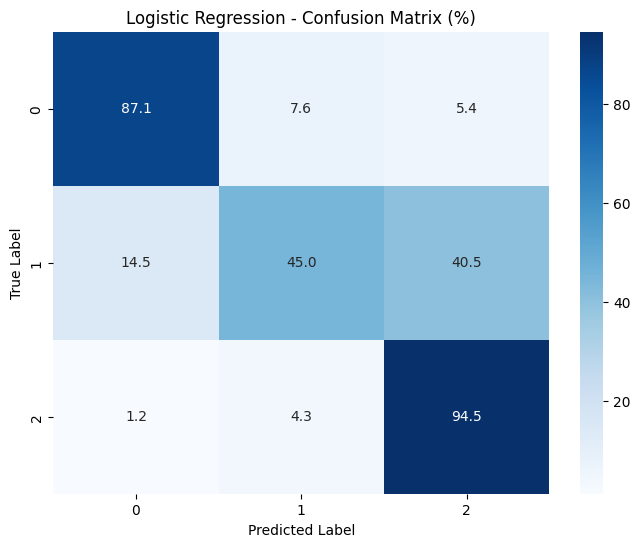

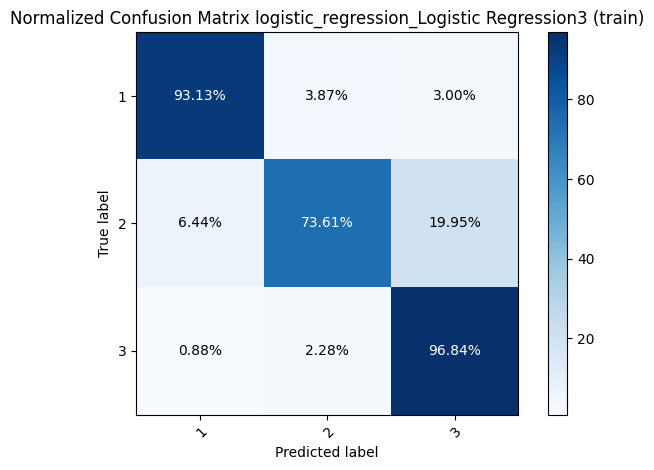

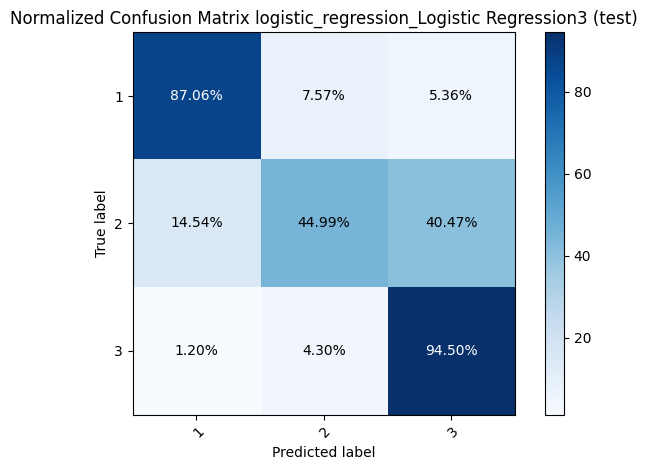

'Y Test'

(array([0, 1, 2]), array([1175,  509, 2418]))

'Y Test Predictions'

(array([0, 1, 2]), array([1126,  422, 2554]))

Score for logistic_regression_Logistic Regression3


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             0   0.908526  0.870638  0.889179   1175.0       NaN         NaN   
1             1   0.542654  0.449902  0.491944    509.0       NaN         NaN   
2             2   0.894675  0.944996  0.919147   2418.0       NaN         NaN   
3      accuracy        NaN       NaN       NaN      NaN  0.862262         NaN   
4     macro avg   0.781952  0.755179  0.766757   4102.0       NaN         NaN   
5  weighted avg   0.854962  0.862262  0.857553   4102.0       NaN         NaN   
6    time_train        NaN       NaN       NaN      NaN       NaN    5.611703   

                                    Modelo  
0  logistic_regression_Logistic Regression  
1  logistic_regression_Logistic Regression  
2  logistic_regression_Logistic Regression  
3  logistic_regression_Logistic Regression  
4  logistic_regression_Logistic Regression  
5  logistic_regression_Logistic Regression  
6  logistic_regression_Logistic Regression

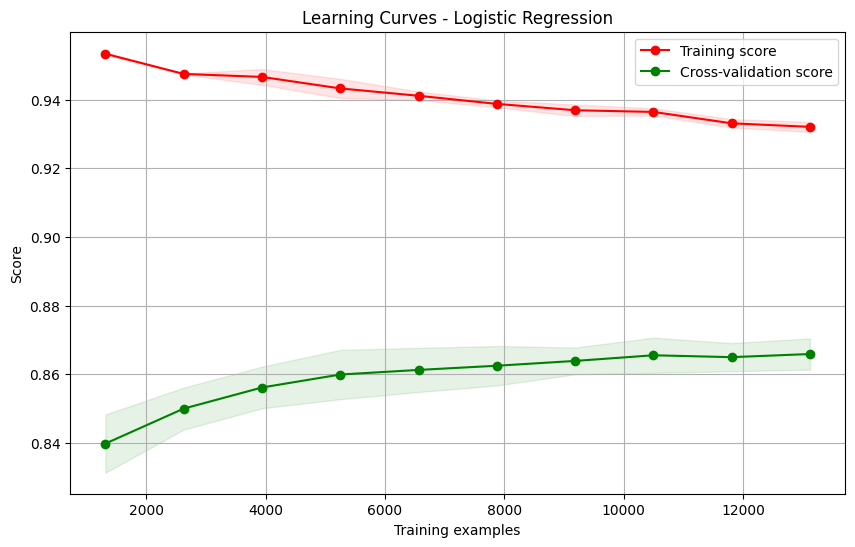


Grid Search Results for Logistic Regression:


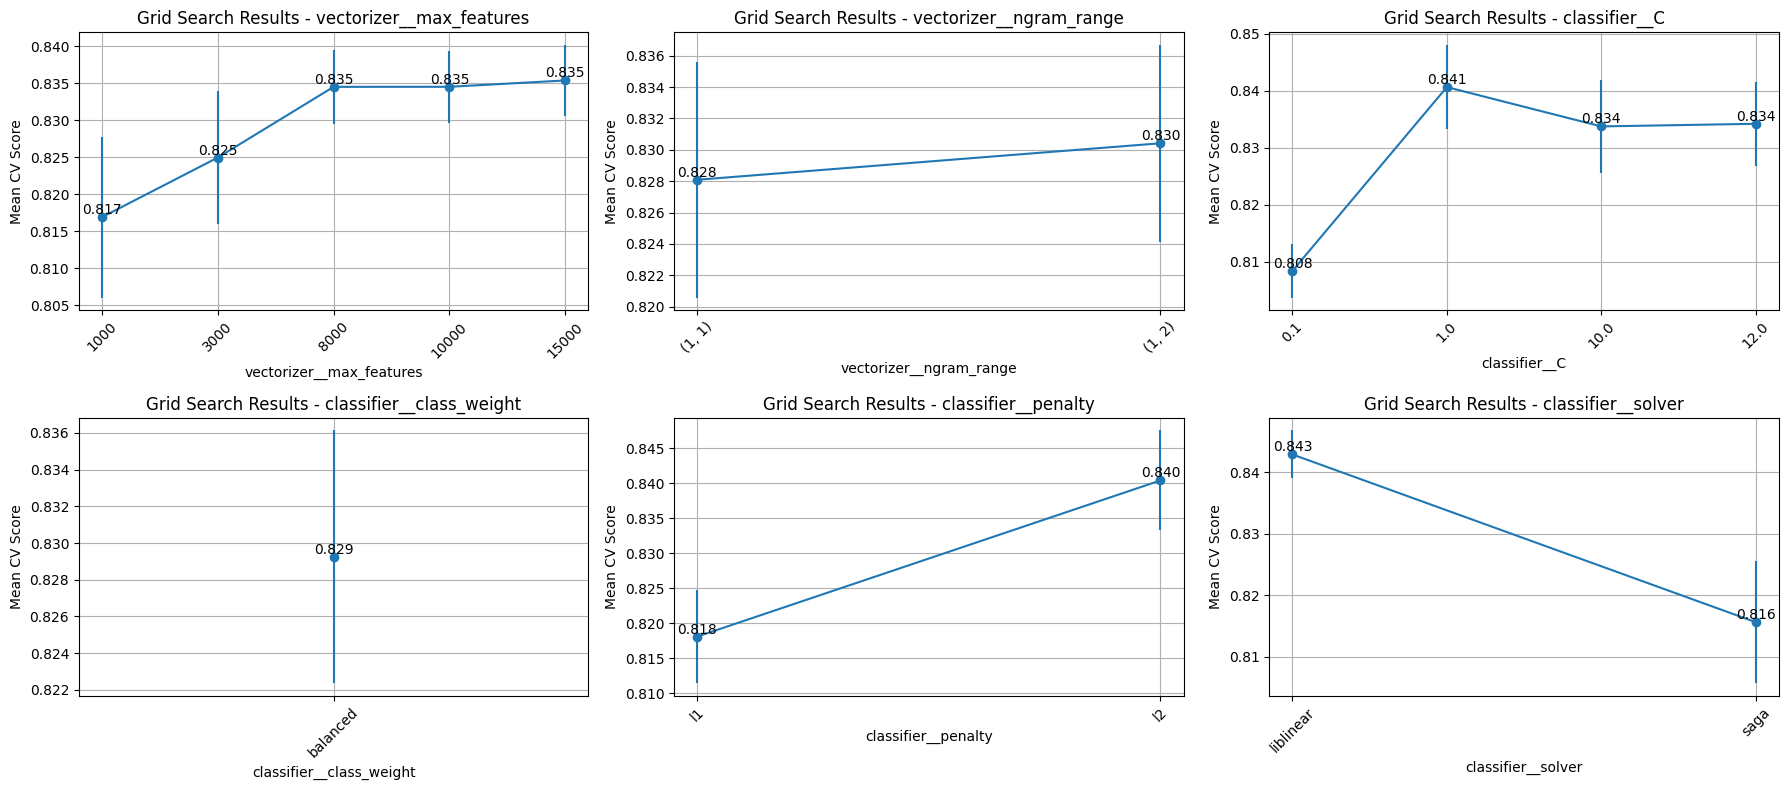


Top Features for Logistic Regression:


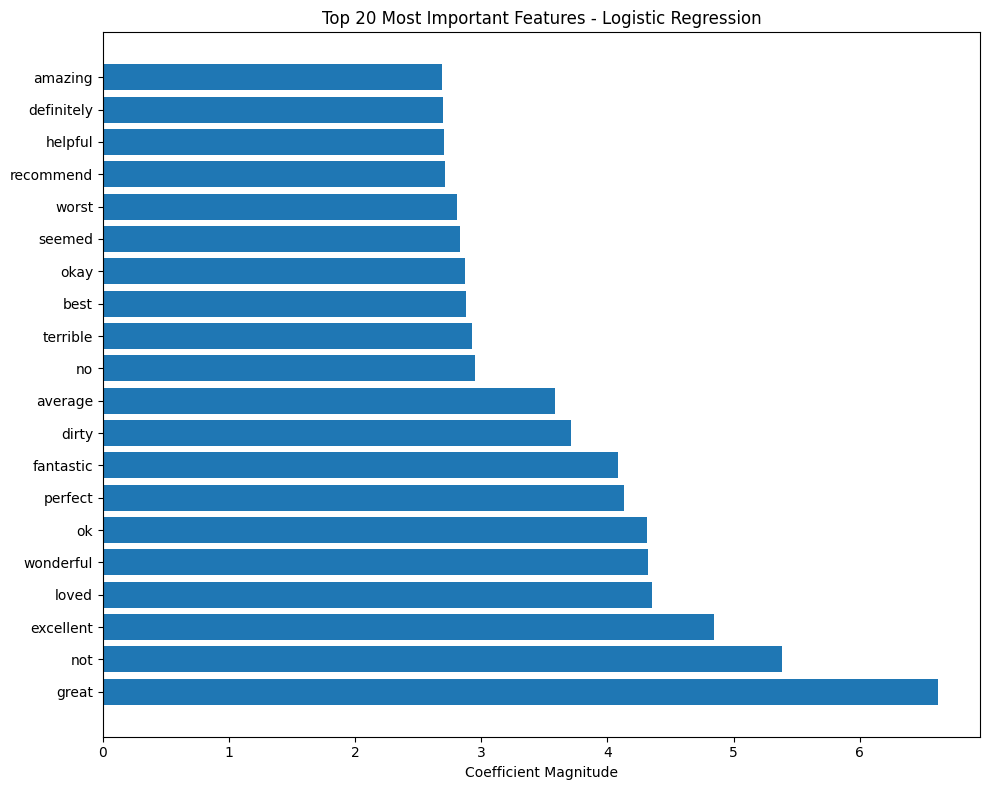


Class-specific Features for Logistic Regression:


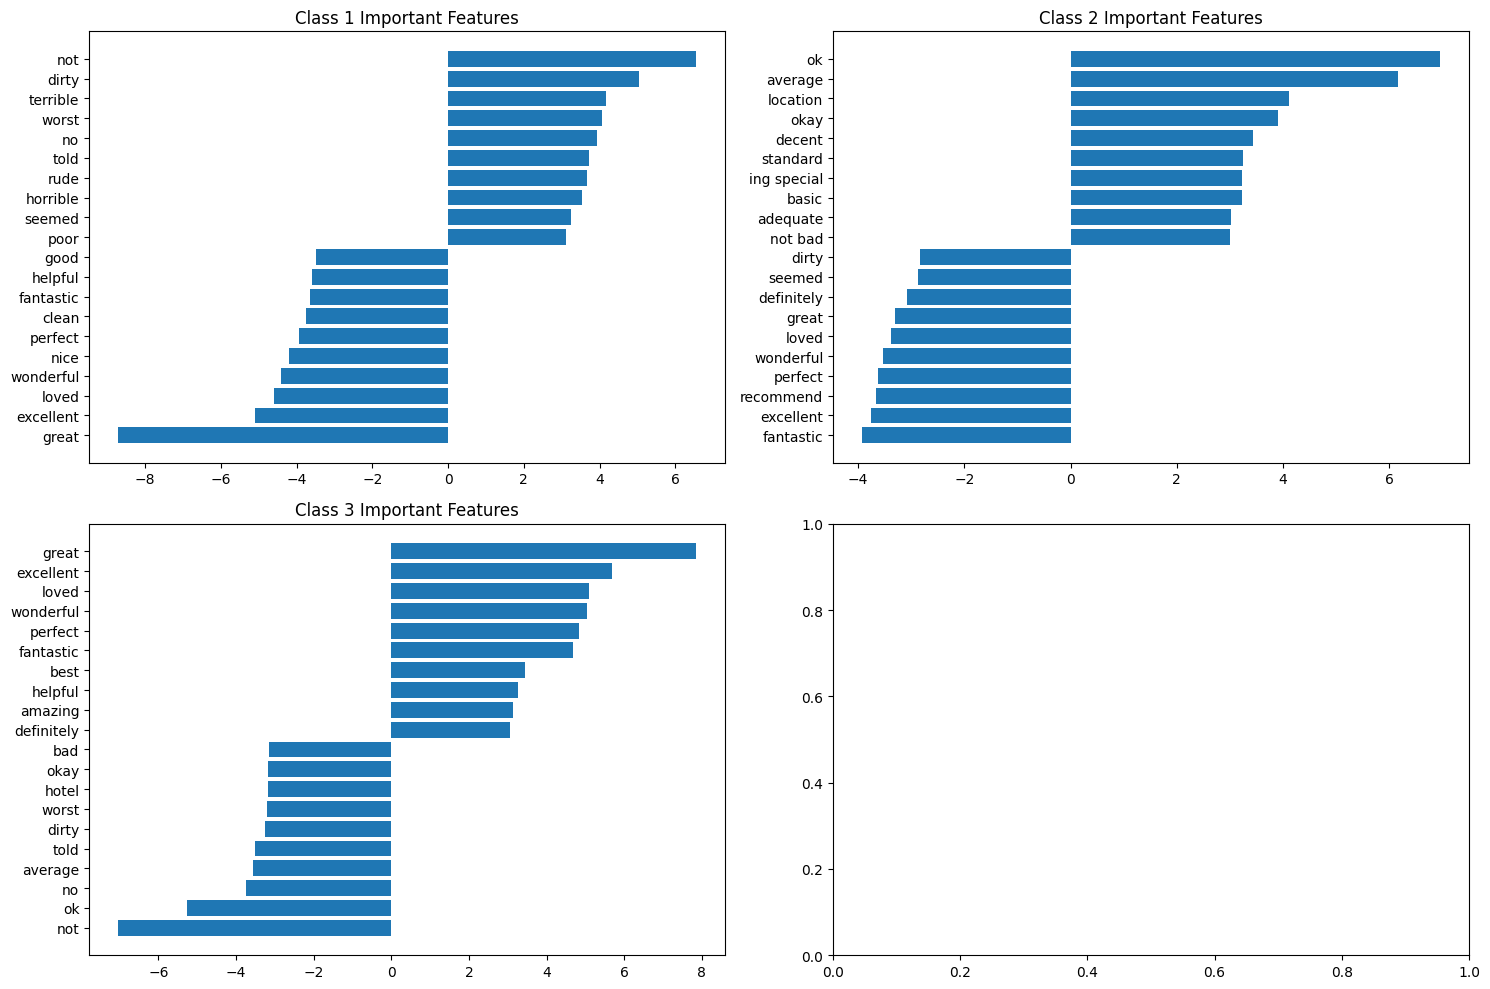


Training With Scaling with Grid Search...
Fitting 3 folds for each of 160 candidates, totalling 480 fits


/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jgonzalez/dev/.virtualenv/AM1-TP/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  


With Scaling Results:
Best parameters: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'scaler__with_mean': False, 'vectorizer__max_features': 15000, 'vectorizer__ngram_range': (1, 2)}
Best CV score: 0.852
Training accuracy: 1.000
Testing accuracy: 0.839
Fit time: 5.961 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1175
           1       0.46      0.40      0.43       509
           2       0.89      0.92      0.91      2418

    accuracy                           0.84      4102
   macro avg       0.74      0.73      0.73      4102
weighted avg       0.83      0.84      0.84      4102



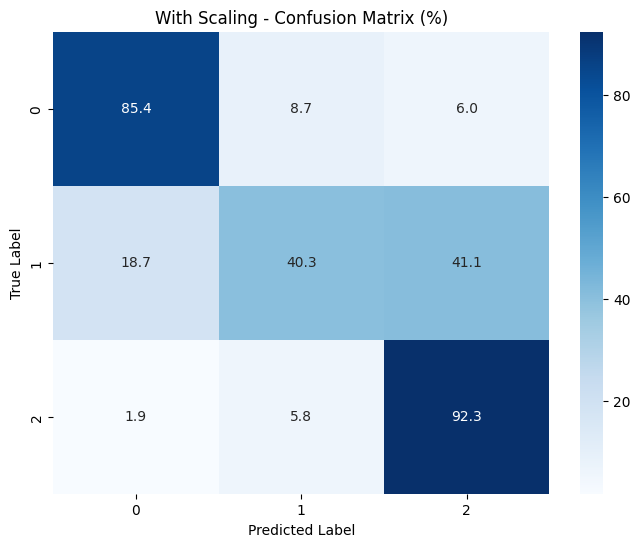

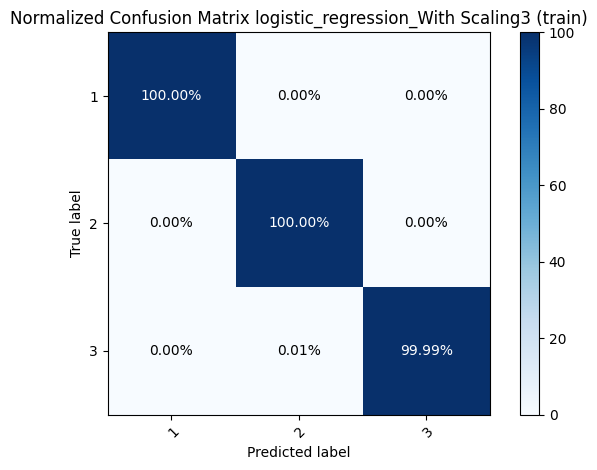

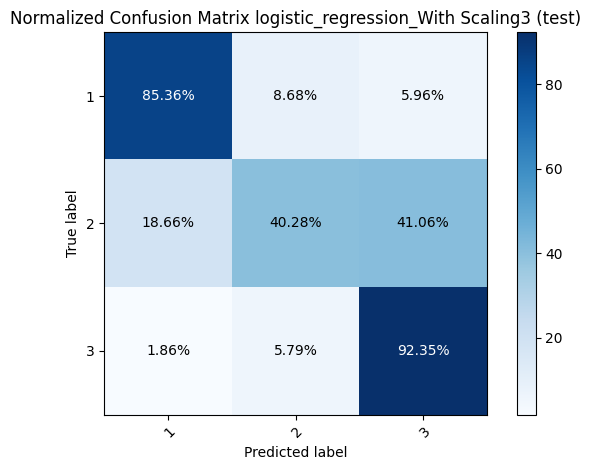

'Y Test'

(array([0, 1, 2]), array([1175,  509, 2418]))

'Y Test Predictions'

(array([0, 1, 2]), array([1143,  447, 2512]))

Score for logistic_regression_With Scaling3


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             0   0.877515  0.853617  0.865401   1175.0       NaN         NaN   
1             1   0.458613  0.402750  0.428870    509.0       NaN         NaN   
2             2   0.888933  0.923490  0.905882   2418.0       NaN         NaN   
3      accuracy        NaN       NaN       NaN      NaN  0.838859         NaN   
4     macro avg   0.741687  0.726619  0.733385   4102.0       NaN         NaN   
5  weighted avg   0.832266  0.838859  0.835096   4102.0       NaN         NaN   
6    time_train        NaN       NaN       NaN      NaN       NaN    5.960535   

                             Modelo  
0  logistic_regression_With Scaling  
1  logistic_regression_With Scaling  
2  logistic_regression_With Scaling  
3  logistic_regression_With Scaling  
4  logistic_regression_With Scaling  
5  logistic_regression_With Scaling  
6  logistic_regression_With Scaling

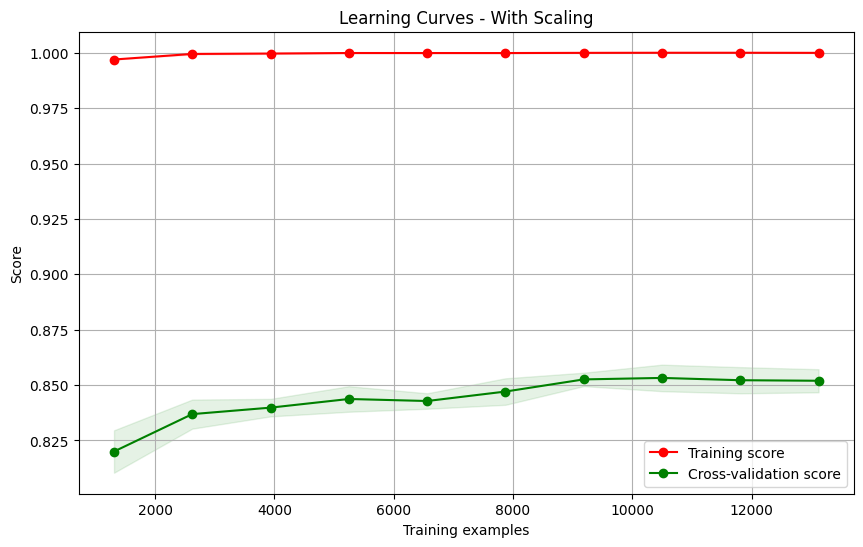


Grid Search Results for With Scaling:


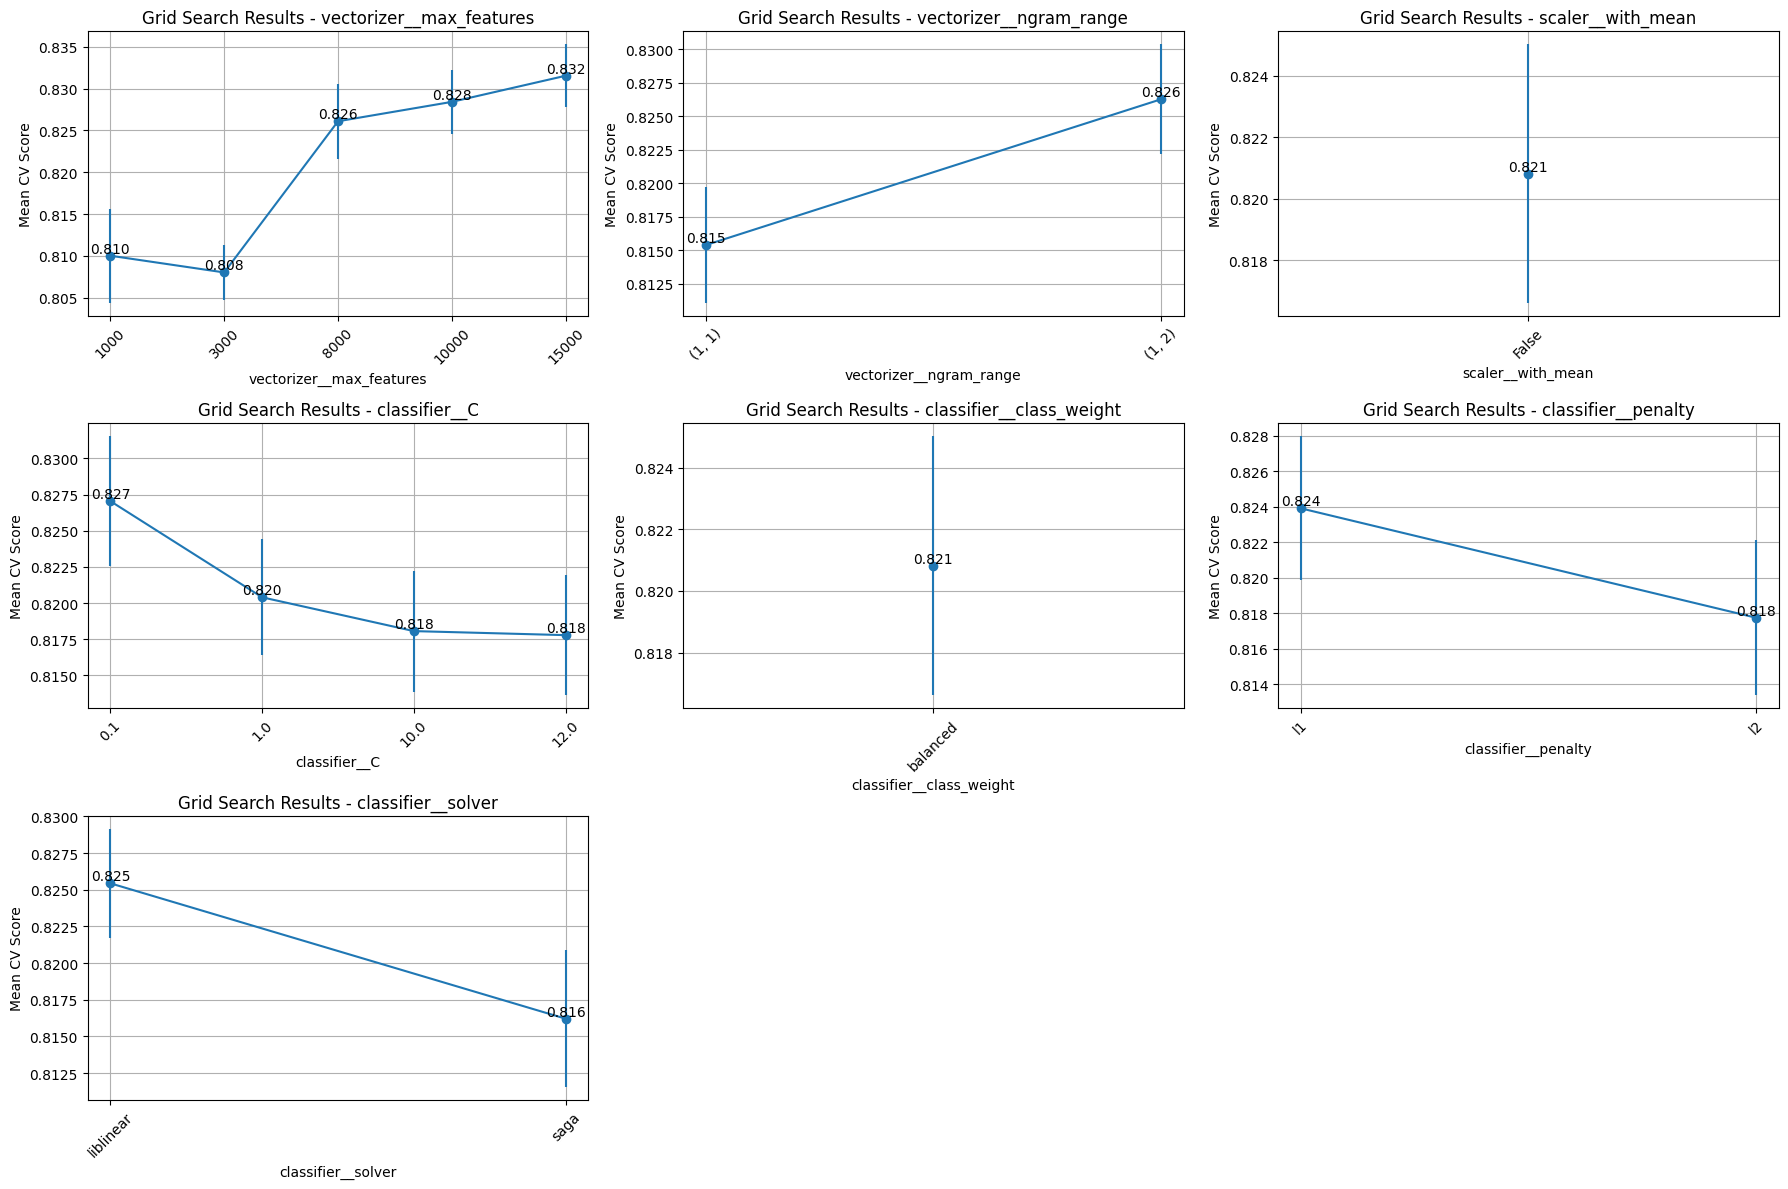


Top Features for With Scaling:
Could not plot feature importance for With Scaling: local variable 'importances' referenced before assignment

Class-specific Features for With Scaling:

Training With PCA with Grid Search...
Fitting 3 folds for each of 480 candidates, totalling 1440 fits

With PCA Results:
Best parameters: {'classifier__C': 10.0, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'dim_reduction__n_components': 200, 'vectorizer__max_features': 15000, 'vectorizer__ngram_range': (1, 2)}
Best CV score: 0.859
Training accuracy: 0.870
Testing accuracy: 0.856
Fit time: 11.418 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1175
           1       0.52      0.49      0.51       509
           2       0.90      0.92      0.91      2418

    accuracy                           0.86      4102
   macro avg       0.77      0.76      0.77      41

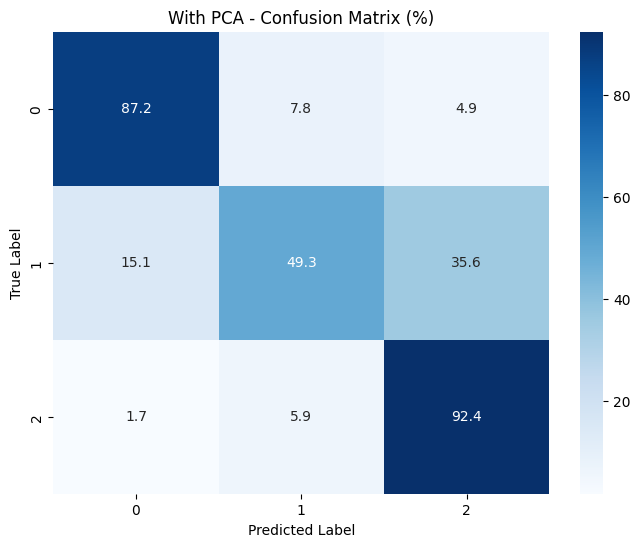

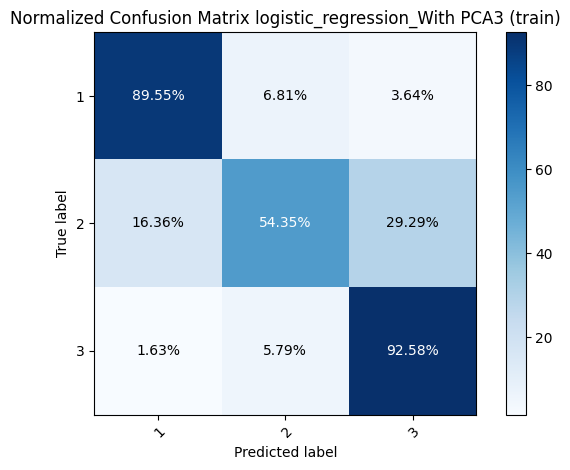

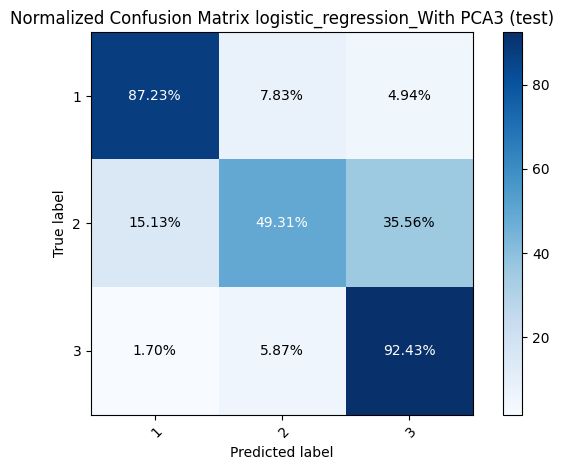

'Y Test'

(array([0, 1, 2]), array([1175,  509, 2418]))

'Y Test Predictions'

(array([0, 1, 2]), array([1143,  485, 2474]))

Score for logistic_regression_With PCA3


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             0   0.896763  0.872340  0.884383   1175.0       NaN         NaN   
1             1   0.517526  0.493124  0.505030    509.0       NaN         NaN   
2             2   0.903395  0.924318  0.913737   2418.0       NaN         NaN   
3      accuracy        NaN       NaN       NaN      NaN  0.855924         NaN   
4     macro avg   0.772561  0.763261  0.767717   4102.0       NaN         NaN   
5  weighted avg   0.853615  0.855924  0.854614   4102.0       NaN         NaN   
6    time_train        NaN       NaN       NaN      NaN       NaN   11.418445   

                         Modelo  
0  logistic_regression_With PCA  
1  logistic_regression_With PCA  
2  logistic_regression_With PCA  
3  logistic_regression_With PCA  
4  logistic_regression_With PCA  
5  logistic_regression_With PCA  
6  logistic_regression_With PCA

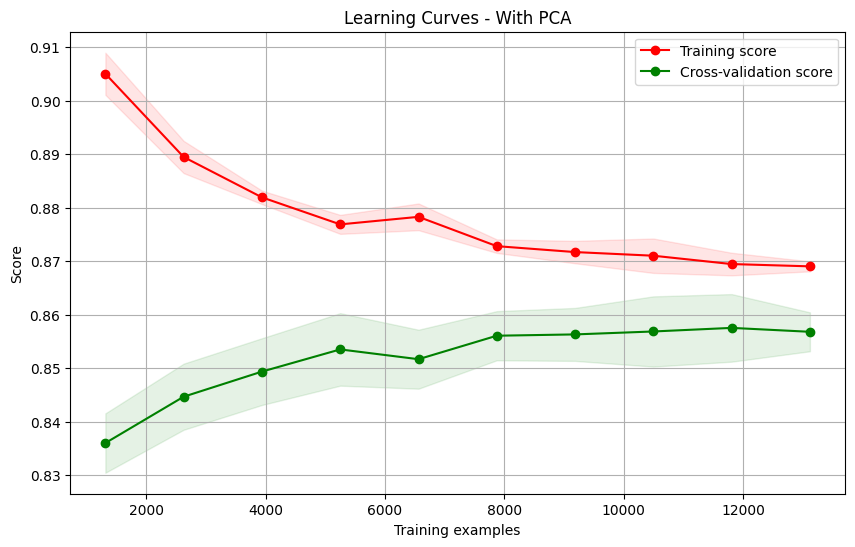


Grid Search Results for With PCA:


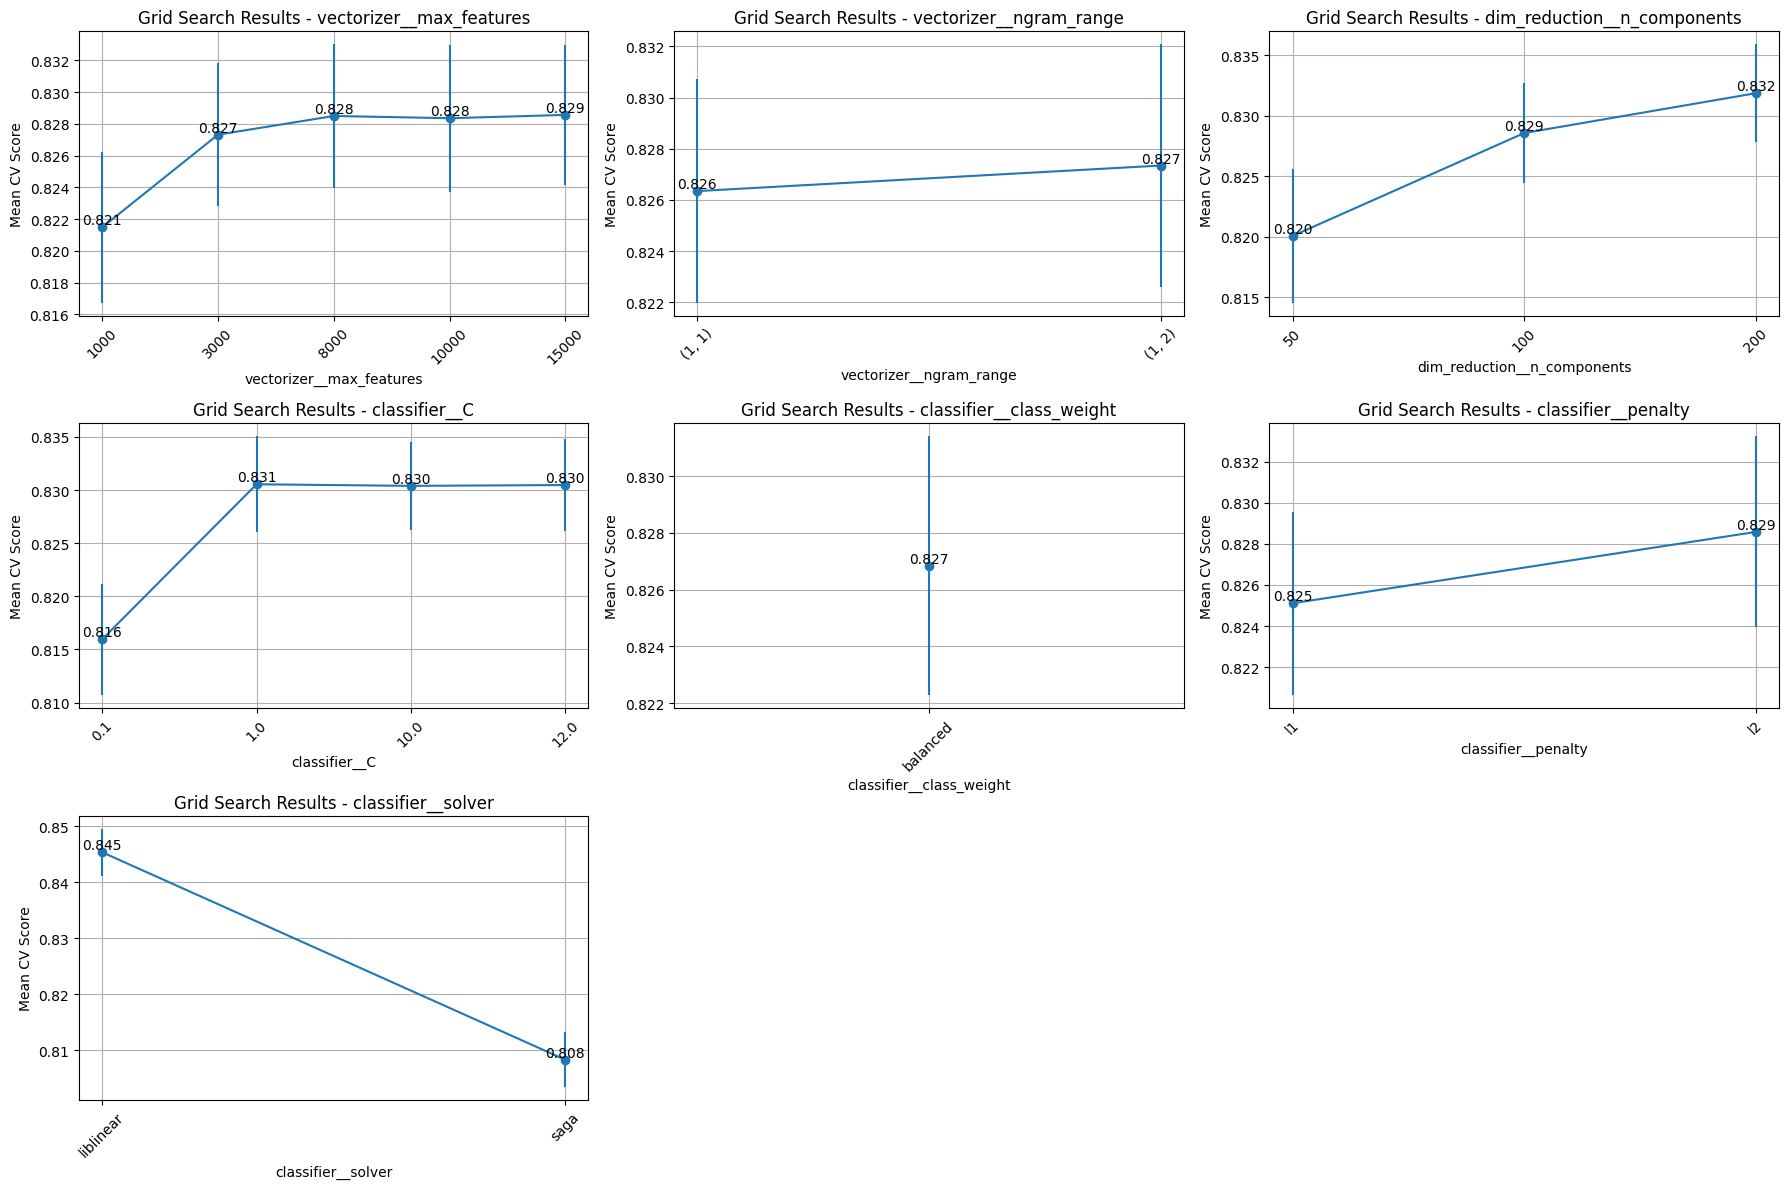


Top Features for With PCA:
Could not plot feature importance for With PCA: local variable 'importances' referenced before assignment

Class-specific Features for With PCA:

Training PCA + Scaling with Grid Search...
Fitting 3 folds for each of 480 candidates, totalling 1440 fits

PCA + Scaling Results:
Best parameters: {'classifier__C': 1.0, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'dim_reduction__n_components': 200, 'scaler__with_mean': False, 'vectorizer__max_features': 8000, 'vectorizer__ngram_range': (1, 2)}
Best CV score: 0.858
Training accuracy: 0.867
Testing accuracy: 0.852
Fit time: 12.971 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1175
           1       0.50      0.47      0.48       509
           2       0.90      0.92      0.91      2418

    accuracy                           0.85      4102
   macro avg       0.76    

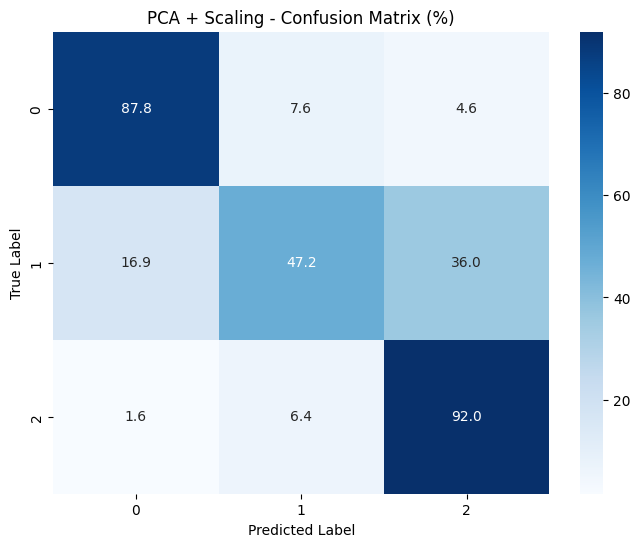

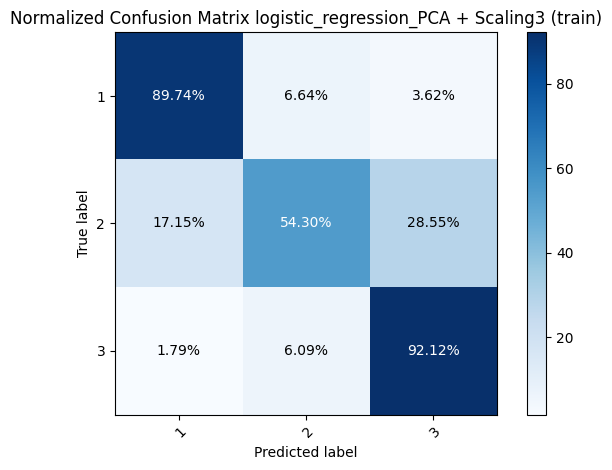

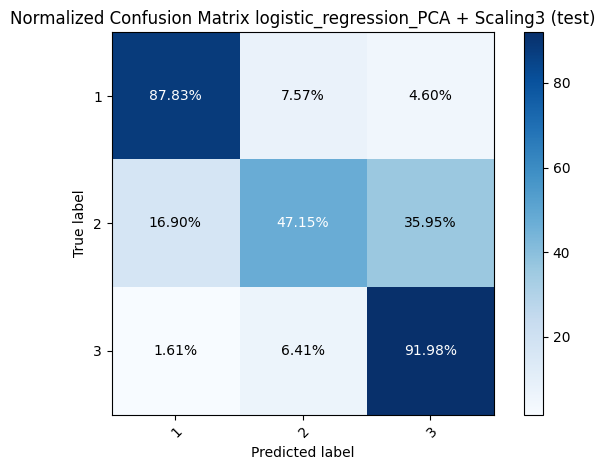

'Y Test'

(array([0, 1, 2]), array([1175,  509, 2418]))

'Y Test Predictions'

(array([0, 1, 2]), array([1157,  484, 2461]))

Score for logistic_regression_PCA + Scaling3


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             0   0.891962  0.878298  0.885077   1175.0       NaN         NaN   
1             1   0.495868  0.471513  0.483384    509.0       NaN         NaN   
2             2   0.903698  0.919768  0.911662   2418.0       NaN         NaN   
3      accuracy        NaN       NaN       NaN      NaN  0.852267         NaN   
4     macro avg   0.763842  0.756526  0.760041   4102.0       NaN         NaN   
5  weighted avg   0.849730  0.852267  0.850904   4102.0       NaN         NaN   
6    time_train        NaN       NaN       NaN      NaN       NaN   12.970954   

                              Modelo  
0  logistic_regression_PCA + Scaling  
1  logistic_regression_PCA + Scaling  
2  logistic_regression_PCA + Scaling  
3  logistic_regression_PCA + Scaling  
4  logistic_regression_PCA + Scaling  
5  logistic_regression_PCA + Scaling  
6  logistic_regression_PCA + Scaling

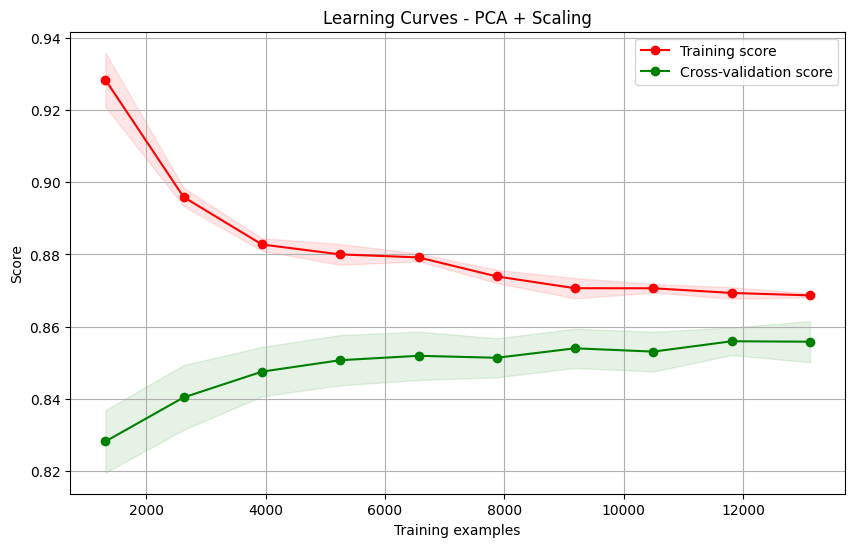


Grid Search Results for PCA + Scaling:


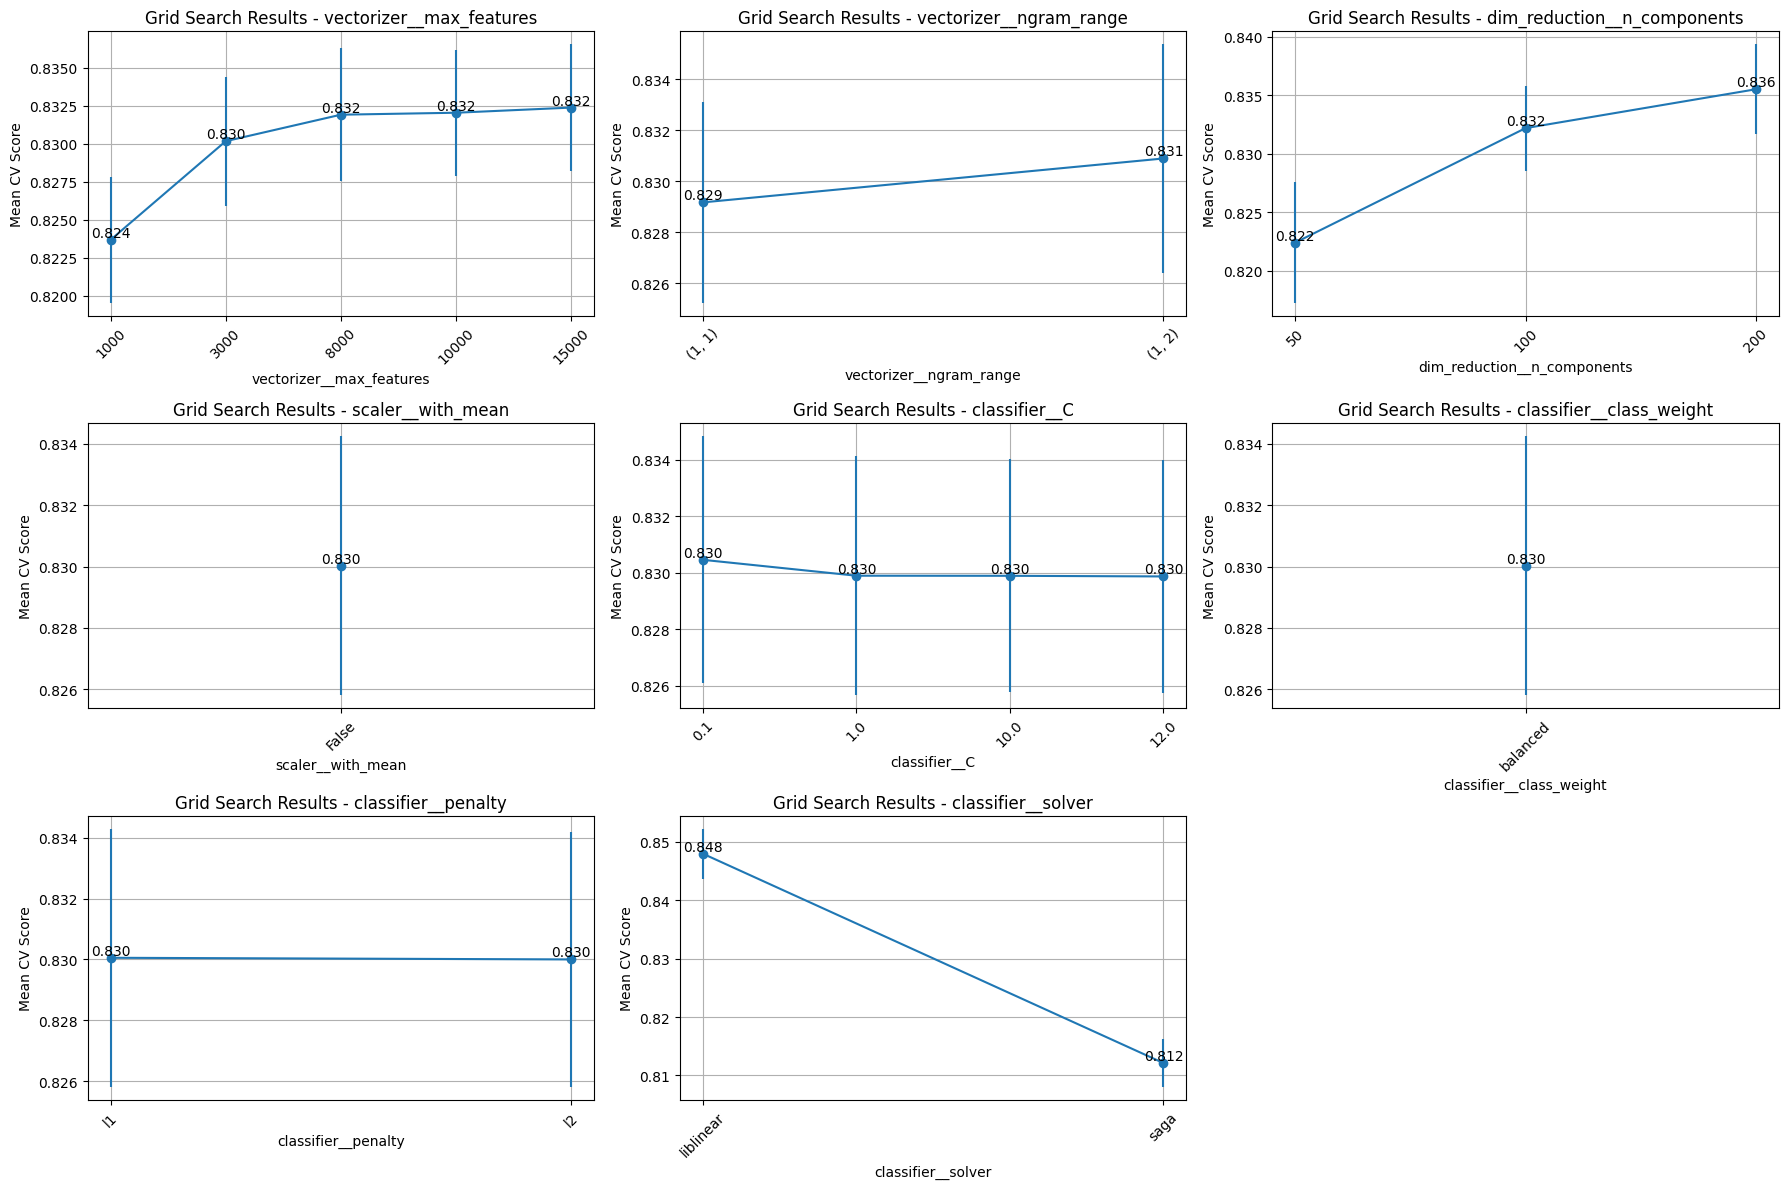


Top Features for PCA + Scaling:
Could not plot feature importance for PCA + Scaling: local variable 'importances' referenced before assignment

Class-specific Features for PCA + Scaling:


In [ ]:
# Compare models
results_three = compare_models_with_grid_search(X_train_three, X_test_three, y_train_three, y_test_three, classes="3")

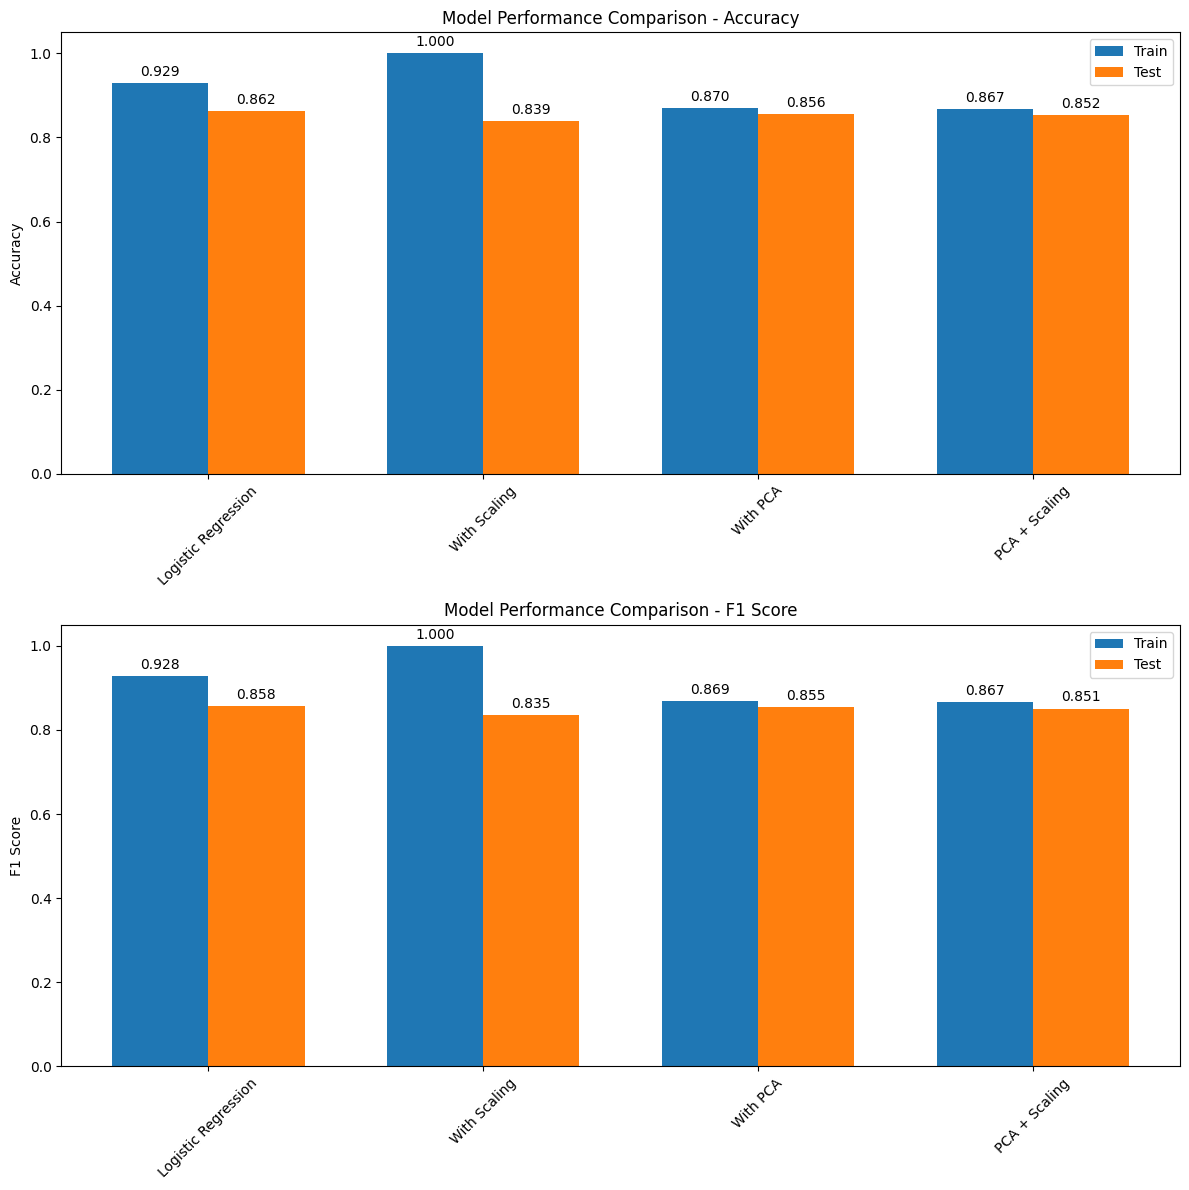

In [ ]:
# Plot comparison
plot_model_comparison(results_three)

# SVM y CatBoost para clasificación de reviews de TripAdvisor

## Definiciones

In [4]:
random_state = 42
max_iter = 20000
# Etapas del pipeline para distintos modelos
pipeline_steps = {
    "linear_svc" : [
        ("vectorizer", TfidfVectorizer(min_df=10, max_df=0.9, ngram_range=(1, 2))),
        ("scaler", MaxAbsScaler()),
        ("classifier", OneVsOneClassifier(LinearSVC(class_weight="balanced", max_iter=max_iter, random_state=random_state)))
    ],
    "svc_linear": [
        ("vectorizer", TfidfVectorizer(min_df=10, max_df=0.9, ngram_range=(1, 2), max_features=10000)),
        ("scaler", MaxAbsScaler()),
        ("classifier", SVC(kernel="linear", class_weight="balanced", decision_function_shape="ovo", probability = True, max_iter=max_iter, random_state=random_state))
    ],
    "svc_rbf": [
        ("vectorizer", TfidfVectorizer(min_df=10, max_df=0.9, ngram_range=(1, 2))),
        ("dim_reduction", TruncatedSVD(random_state=random_state)),
        ("scaler", MinMaxScaler()),
        ("classifier", SVC(kernel="rbf", class_weight="balanced", decision_function_shape="ovo", probability = True, max_iter=max_iter, random_state=random_state))
    ],
    "catboost": [
        ("vectorizer", TfidfVectorizer(min_df=10, max_df=0.9, ngram_range=(1, 2))),
        ("dim_reduction", TruncatedSVD(random_state=random_state)),
        ("scaler", MinMaxScaler()),
        ("classifier", CatBoostClassifier(learning_rate= 0.02, task_type="GPU", random_state=random_state))
    ],
}

## Datos para 5 clases

### Instanciación de modelos con los mejores parámetros encontrados y evalucación para 5 clases

In [5]:
models = ["linear_svc_5clases", "svc_linear_5clases", "svc_rbf_5clases", "catboost_5clases", "ensemble_hard_5clases", "ensemble_soft_5clases"]

##### LinearSVC (liblinear) para 5 clases

[I 2024-12-12 16:00:57,287] Using an existing study with name 'linear_svc' instead of creating a new one.


{'C': 0.015}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 OneVsOneClassifier(estimator=LinearSVC(C=0.015,
                                                        class_weight='balanced',
                                                        max_iter=20000,
                                                        random_state=42)))])>

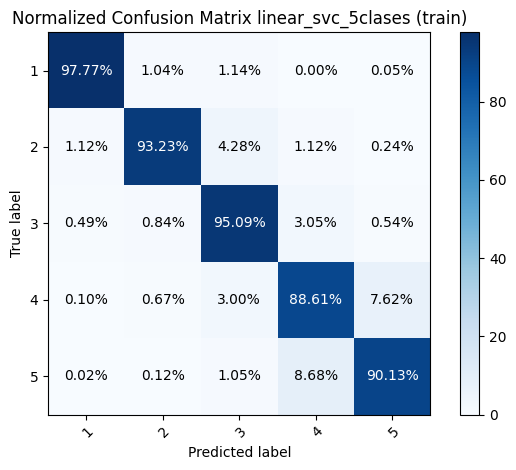

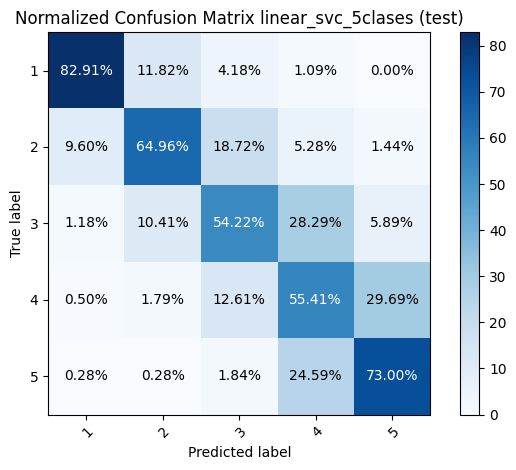

'Y Test'

(array([1, 2, 3, 4, 5], dtype=int64),
 array([ 550,  625,  509, 1007, 1411], dtype=int64))

'Y Test Predictions'

(array([1, 2, 3, 4, 5], dtype=int64),
 array([ 531,  546,  569, 1088, 1368], dtype=int64))

Score for linear_svc_5clases


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             1   0.858757  0.829091  0.843663    550.0       NaN         NaN   
1             2   0.743590  0.649600  0.693424    625.0       NaN         NaN   
2             3   0.485062  0.542240  0.512059    509.0       NaN         NaN   
3             4   0.512868  0.554121  0.532697   1007.0       NaN         NaN   
4             5   0.752924  0.729979  0.741274   1411.0       NaN         NaN   
5      accuracy        NaN       NaN       NaN      NaN  0.664554         NaN   
6     macro avg   0.670640  0.661006  0.664624   4102.0       NaN         NaN   
7  weighted avg   0.673523  0.664554  0.668066   4102.0       NaN         NaN   
8    time_train        NaN       NaN       NaN      NaN       NaN    2.114955   

       Modelo  
0  linear_svc  
1  linear_svc  
2  linear_svc  
3  linear_svc  
4  linear_svc  
5  linear_svc  
6  linear_svc  
7  linear_svc  
8  linear_svc

In [ ]:
model_config = "linear_svc"
optuna_db = create_db(model_config)
pipeline_linear_svc = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

start_time = time.time()
pipeline_linear_svc.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

y_train_pred = pipeline_linear_svc.predict(X_train)  #Para inferir si puede haber overfitting
y_test_pred = pipeline_linear_svc.predict(X_test)

cm_test_linear_svc, report_test_linear_svc = test_scoring(model_config, models[0], y_train, y_train_pred, y_test, y_test_pred, execution_time)

##### SVC kernel linear (LibSVM) para 5 clases

[I 2024-12-12 16:01:07,020] Using an existing study with name 'svc_linear' instead of creating a new one.


{'C': 0.07}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, max_features=10000, min_df=10,
                                 ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 SVC(C=0.07, class_weight='balanced',
                     decision_function_shape='ovo', kernel='linear',
                     max_iter=20000, probability=True, random_state=42))])>

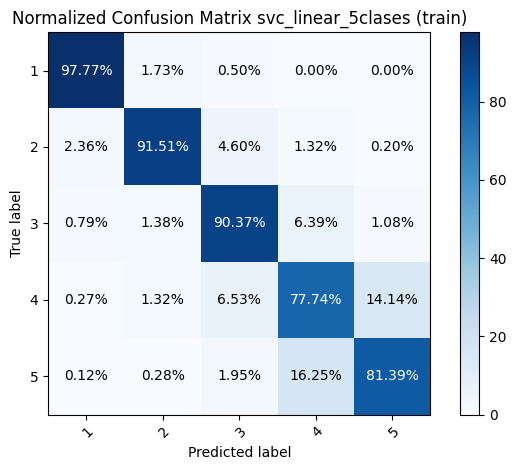

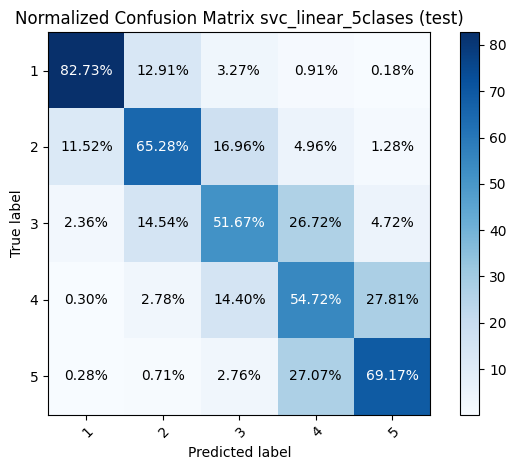

'Y Test'

(array([1, 2, 3, 4, 5], dtype=int64),
 array([ 550,  625,  509, 1007, 1411], dtype=int64))

'Y Test Predictions'

(array([1, 2, 3, 4, 5], dtype=int64),
 array([ 546,  591,  571, 1105, 1289], dtype=int64))

Score for svc_linear_5clases


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             1   0.833333  0.827273  0.830292    550.0       NaN         NaN   
1             2   0.690355  0.652800  0.671053    625.0       NaN         NaN   
2             3   0.460595  0.516699  0.487037    509.0       NaN         NaN   
3             4   0.498643  0.547170  0.521780   1007.0       NaN         NaN   
4             5   0.757176  0.691708  0.722963   1411.0       NaN         NaN   
5      accuracy        NaN       NaN       NaN      NaN  0.646758         NaN   
6     macro avg   0.648021  0.647130  0.646625   4102.0       NaN         NaN   
7  weighted avg   0.656937  0.646758  0.650781   4102.0       NaN         NaN   
8    time_train        NaN       NaN       NaN      NaN       NaN  582.512183   

       Modelo  
0  svc_linear  
1  svc_linear  
2  svc_linear  
3  svc_linear  
4  svc_linear  
5  svc_linear  
6  svc_linear  
7  svc_linear  
8  svc_linear

In [ ]:
model_config = "svc_linear"
optuna_db = create_db(model_config)
pipeline_svc_linear = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

start_time = time.time()
pipeline_svc_linear.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

y_train_pred = pipeline_svc_linear.predict(X_train)
y_test_pred = pipeline_svc_linear.predict(X_test)

cm_test_linear_svc, report_test_svc_linear = test_scoring(model_config, models[1], y_train, y_train_pred, y_test, y_test_pred, execution_time)

##### SVC kernel rbf (LibSVM) para 5 clases

[I 2024-12-12 16:13:06,848] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 1.8, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1.8, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

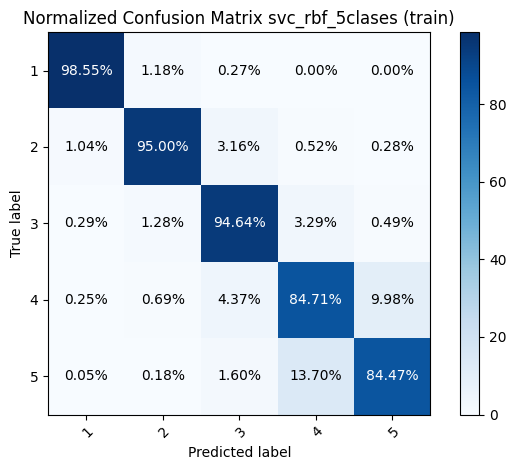

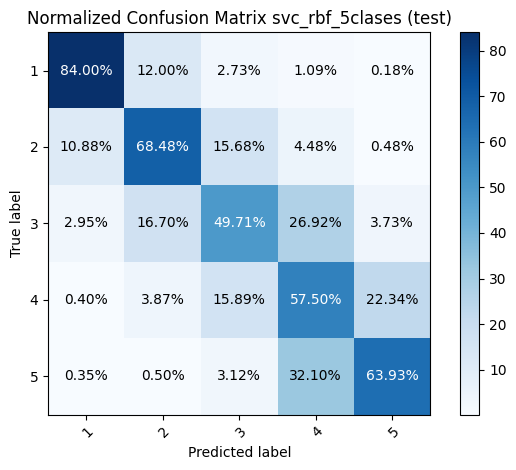

'Y Test'

(array([1, 2, 3, 4, 5], dtype=int64),
 array([ 550,  625,  509, 1007, 1411], dtype=int64))

'Y Test Predictions'

(array([1, 2, 3, 4, 5], dtype=int64),
 array([ 554,  625,  570, 1203, 1150], dtype=int64))

Score for svc_rbf_5clases


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             1   0.833935  0.840000  0.836957    550.0       NaN         NaN   
1             2   0.684800  0.684800  0.684800    625.0       NaN         NaN   
2             3   0.443860  0.497053  0.468953    509.0       NaN         NaN   
3             4   0.481297  0.574975  0.523982   1007.0       NaN         NaN   
4             5   0.784348  0.639263  0.704412   1411.0       NaN         NaN   
5      accuracy        NaN       NaN       NaN      NaN  0.639688         NaN   
6     macro avg   0.645648  0.647218  0.643821   4102.0       NaN         NaN   
7  weighted avg   0.659183  0.639688  0.645685   4102.0       NaN         NaN   
8    time_train        NaN       NaN       NaN      NaN       NaN  594.848528   

    Modelo  
0  svc_rbf  
1  svc_rbf  
2  svc_rbf  
3  svc_rbf  
4  svc_rbf  
5  svc_rbf  
6  svc_rbf  
7  svc_rbf  
8  svc_rbf

In [ ]:
model_config = "svc_rbf"
optuna_db = create_db(model_config)
pipeline_svc_rbf = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

start_time = time.time()
pipeline_svc_rbf.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

y_train_pred = pipeline_svc_rbf.predict(X_train)
y_test_pred = pipeline_svc_rbf.predict(X_test)

cm_test_svc_rbf, report_test_svc_rbf = test_scoring(model_config, models[2], y_train, y_train_pred, y_test, y_test_pred, execution_time)

##### Catboost para 5 clases (GPU)

[I 2024-12-12 16:25:36,664] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1250, 'iterations': 2500, 'depth': 8}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1250, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000235F08A0380>)])>

0:	learn: 1.5825463	total: 41.8ms	remaining: 41.8s
1:	learn: 1.5574266	total: 60.8ms	remaining: 30.3s
2:	learn: 1.5339553	total: 80.1ms	remaining: 26.6s
3:	learn: 1.5119915	total: 100ms	remaining: 24.9s
4:	learn: 1.4912709	total: 118ms	remaining: 23.5s
5:	learn: 1.4716839	total: 137ms	remaining: 22.7s
6:	learn: 1.4531342	total: 158ms	remaining: 22.4s
7:	learn: 1.4355946	total: 182ms	remaining: 22.6s
8:	learn: 1.4189715	total: 207ms	remaining: 22.8s
9:	learn: 1.4031409	total: 229ms	remaining: 22.7s
10:	learn: 1.3880387	total: 251ms	remaining: 22.6s
11:	learn: 1.3736786	total: 273ms	remaining: 22.5s
12:	learn: 1.3598423	total: 295ms	remaining: 22.4s
13:	learn: 1.3463541	total: 314ms	remaining: 22.1s
14:	learn: 1.3333951	total: 335ms	remaining: 22s
15:	learn: 1.3211410	total: 354ms	remaining: 21.8s
16:	learn: 1.3090866	total: 374ms	remaining: 21.6s
17:	learn: 1.2977691	total: 394ms	remaining: 21.5s
18:	learn: 1.2867965	total: 414ms	remaining: 21.4s
19:	learn: 1.2760241	total: 435ms	remain

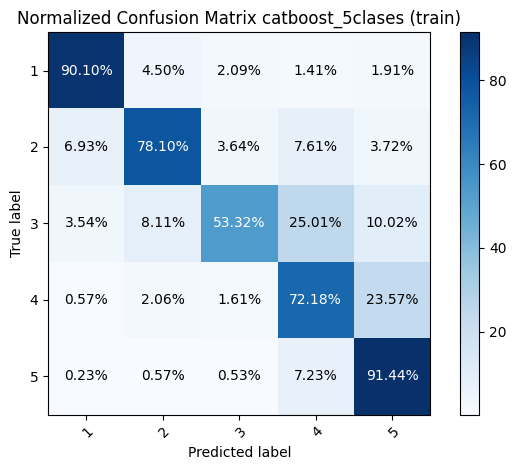

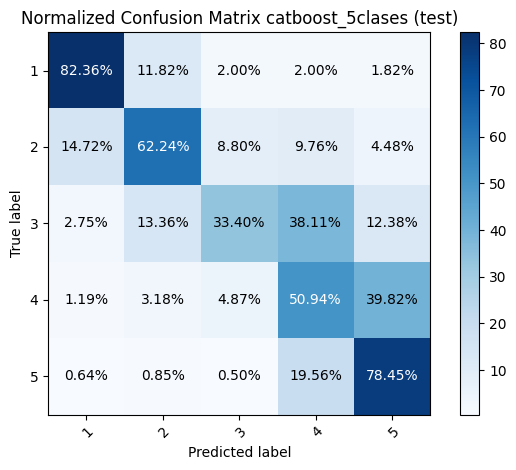

'Y Test'

(array([1, 2, 3, 4, 5], dtype=int64),
 array([ 550,  625,  509, 1007, 1411], dtype=int64))

'Y Test Predictions'

(array([1, 2, 3, 4, 5], dtype=int64),
 array([ 580,  566,  292, 1055, 1609], dtype=int64))

Score for catboost_5clases


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             1   0.781034  0.823636  0.801770    550.0       NaN         NaN   
1             2   0.687279  0.622400  0.653233    625.0       NaN         NaN   
2             3   0.582192  0.333988  0.424469    509.0       NaN         NaN   
3             4   0.486256  0.509434  0.497575   1007.0       NaN         NaN   
4             5   0.688005  0.784550  0.733113   1411.0       NaN         NaN   
5      accuracy        NaN       NaN       NaN      NaN  0.641638         NaN   
6     macro avg   0.644953  0.614802  0.622032   4102.0       NaN         NaN   
7  weighted avg   0.637711  0.641638  0.634027   4102.0       NaN         NaN   
8    time_train        NaN       NaN       NaN      NaN       NaN   51.791504   

     Modelo  
0  catboost  
1  catboost  
2  catboost  
3  catboost  
4  catboost  
5  catboost  
6  catboost  
7  catboost  
8  catboost

In [ ]:
model_config = "catboost"
optuna_db = create_db(model_config)
pipeline_catboost = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

start_time = time.time()
pipeline_catboost.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

y_train_pred = pipeline_catboost.predict(X_train)
y_test_pred = pipeline_catboost.predict(X_test)

cm_test_catboost, report_test_catboost = test_scoring(model_config, models[3], y_train, y_train_pred, y_test, y_test_pred, execution_time)

### Ensemble

#### Hard voting classifier

[I 2024-12-12 16:26:35,479] Using an existing study with name 'linear_svc' instead of creating a new one.


{'C': 0.015}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 OneVsOneClassifier(estimator=LinearSVC(C=0.015,
                                                        class_weight='balanced',
                                                        max_iter=20000,
                                                        random_state=42)))])>

[I 2024-12-12 16:26:35,509] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 1.8, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1.8, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

[I 2024-12-12 16:26:35,536] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1250, 'iterations': 2500, 'depth': 8}

Recreating catboost classifier due to error: {e}


<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1250, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000235F08A0380>)])>

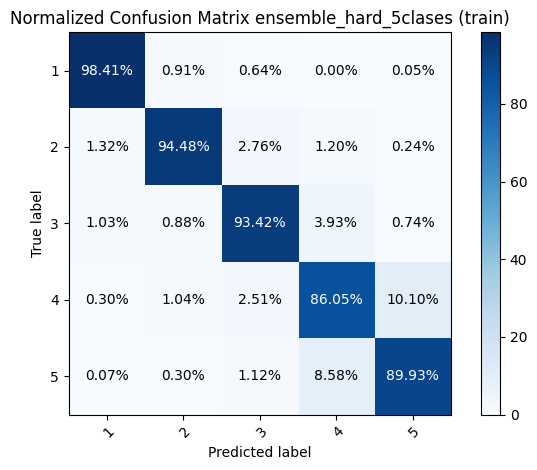

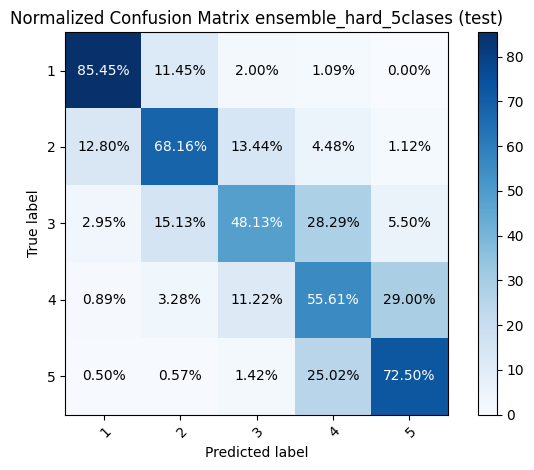

'Y Test'

(array([1, 2, 3, 4, 5], dtype=int64),
 array([ 550,  625,  509, 1007, 1411], dtype=int64))

'Y Test Predictions'

(array([1, 2, 3, 4, 5], dtype=int64),
 array([ 581,  607,  473, 1091, 1350], dtype=int64))

Score for ensemble_hard_5clases


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             1   0.808950  0.854545  0.831123    550.0       NaN         NaN   
1             2   0.701812  0.681600  0.691558    625.0       NaN         NaN   
2             3   0.517970  0.481336  0.498982    509.0       NaN         NaN   
3             4   0.513291  0.556107  0.533842   1007.0       NaN         NaN   
4             5   0.757778  0.725018  0.741036   1411.0       NaN         NaN   
5      accuracy        NaN       NaN       NaN      NaN  0.664066         NaN   
6     macro avg   0.659960  0.659721  0.659308   4102.0       NaN         NaN   
7  weighted avg   0.666336  0.664066  0.664677   4102.0       NaN         NaN   
8    time_train        NaN       NaN       NaN      NaN       NaN  612.249196   

                  Modelo  
0  votingclassifier_hard  
1  votingclassifier_hard  
2  votingclassifier_hard  
3  votingclassifier_hard  
4  votingclassifier_hard  
5  votingclassifier_hard  
6  votingclassifier_hard  
7  votingclassifier_hard  
8  votingclassifier_hard

In [ ]:
model_config = "linear_svc"
optuna_db = create_db(model_config)
linear_svc = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "svc_rbf"
optuna_db = create_db(model_config)
svc = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "catboost"
optuna_db = create_db(model_config)
catboost = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)
catboost = CatBoostWrapper(catboost)

classifiers = [('LinearSVC', linear_svc),
               ('SVC RBF', svc),
               ('Catboost', catboost),
              ]

vc = VotingClassifier(estimators=classifiers, voting="hard", verbose=True, n_jobs=-1)

start_time = time.time()
vc.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

y_train_pred = vc.predict(X_train)
y_test_pred = vc.predict(X_test)

cm_test_ensemble_hard, report_test_ensemble_hard = test_scoring("votingclassifier_hard", models[4], y_train, y_train_pred, y_test, y_test_pred, execution_time)

#### Soft voting classifier

[I 2024-12-12 16:39:29,733] Using an existing study with name 'svc_linear' instead of creating a new one.


{'C': 0.07}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, max_features=10000, min_df=10,
                                 ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 SVC(C=0.07, class_weight='balanced',
                     decision_function_shape='ovo', kernel='linear',
                     max_iter=20000, probability=True, random_state=42))])>

[I 2024-12-12 16:39:29,771] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 1.8, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1.8, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

[I 2024-12-12 16:39:29,904] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1250, 'iterations': 2500, 'depth': 8}

Recreating catboost classifier due to error: {e}


<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1250, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000235F08A0380>)])>

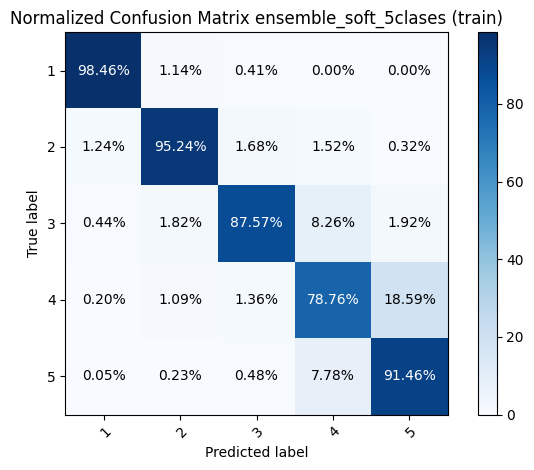

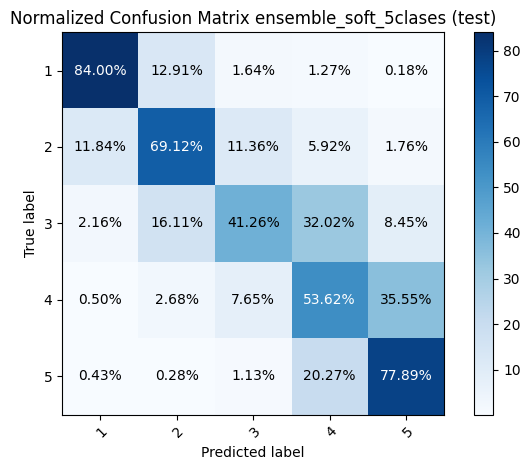

'Y Test'

(array([1, 2, 3, 4, 5], dtype=int64),
 array([ 550,  625,  509, 1007, 1411], dtype=int64))

'Y Test Predictions'

(array([1, 2, 3, 4, 5], dtype=int64),
 array([ 558,  616,  383, 1033, 1512], dtype=int64))

Score for ensemble_soft_5clases


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             1   0.827957  0.840000  0.833935    550.0       NaN         NaN   
1             2   0.701299  0.691200  0.696213    625.0       NaN         NaN   
2             3   0.548303  0.412574  0.470852    509.0       NaN         NaN   
3             4   0.522749  0.536246  0.529412   1007.0       NaN         NaN   
4             5   0.726852  0.778880  0.751967   1411.0       NaN         NaN   
5      accuracy        NaN       NaN       NaN      NaN  0.668698         NaN   
6     macro avg   0.665432  0.651780  0.656476   4102.0       NaN         NaN   
7  weighted avg   0.664254  0.668698  0.664945   4102.0       NaN         NaN   
8    time_train        NaN       NaN       NaN      NaN       NaN  661.860844   

                  Modelo  
0  votingclassifier_soft  
1  votingclassifier_soft  
2  votingclassifier_soft  
3  votingclassifier_soft  
4  votingclassifier_soft  
5  votingclassifier_soft  
6  votingclassifier_soft  
7  votingclassifier_soft  
8  votingclassifier_soft

In [ ]:
model_config = "svc_linear"
optuna_db = create_db(model_config)
svc_linear = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "svc_rbf"
optuna_db = create_db(model_config)
svc = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "catboost"
optuna_db = create_db(model_config)
catboost = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)
catboost = CatBoostWrapper(catboost)

classifiers = [('SVC', svc),
               ('SVC Linear', svc_linear),
               ('Catboost', catboost)
              ]

vc = VotingClassifier(estimators=classifiers, voting="soft", verbose=True, n_jobs=-1)

start_time = time.time()
vc.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

y_train_pred = vc.predict(X_train)
y_test_pred = vc.predict(X_test)

cm_test_ensemble_soft, report_test_ensemble_soft = test_scoring("votingclassifier_soft", models[5], y_train, y_train_pred, y_test, y_test_pred, execution_time)

### Comparación de modelos

Clase  precision    recall  f1-score  support  accuracy  \
0              1   0.858757  0.829091  0.843663    550.0       NaN   
1              2   0.743590  0.649600  0.693424    625.0       NaN   
2              3   0.485062  0.542240  0.512059    509.0       NaN   
3              4   0.512868  0.554121  0.532697   1007.0       NaN   
4              5   0.752924  0.729979  0.741274   1411.0       NaN   
..           ...        ...       ...       ...      ...       ...   
85             5   0.715739  0.747697  0.731369   1411.0       NaN   
86      accuracy        NaN       NaN       NaN      NaN  0.636763   
87     macro avg   0.626785  0.627948  0.626700   4102.0       NaN   
88  weighted avg   0.634244  0.636763  0.634901   4102.0       NaN   
89    time_train        NaN       NaN       NaN      NaN       NaN   

    time_train                            Modelo  
0          NaN                        linear_svc  
1          NaN                        linear_svc  
2          NaN                        linear_svc  
3          NaN                        linear_svc  
4          NaN                        linear_svc  
..         ...                               ...  
85         NaN  logistic_regression_With Scaling  
86         NaN  logistic_regression_With Scaling  
87         NaN  logistic_regression_With Scaling  
88         NaN  logistic_regression_With Scaling  
89    6.968464  logistic_regression_With Scaling  

[90 rows x 8 columns]

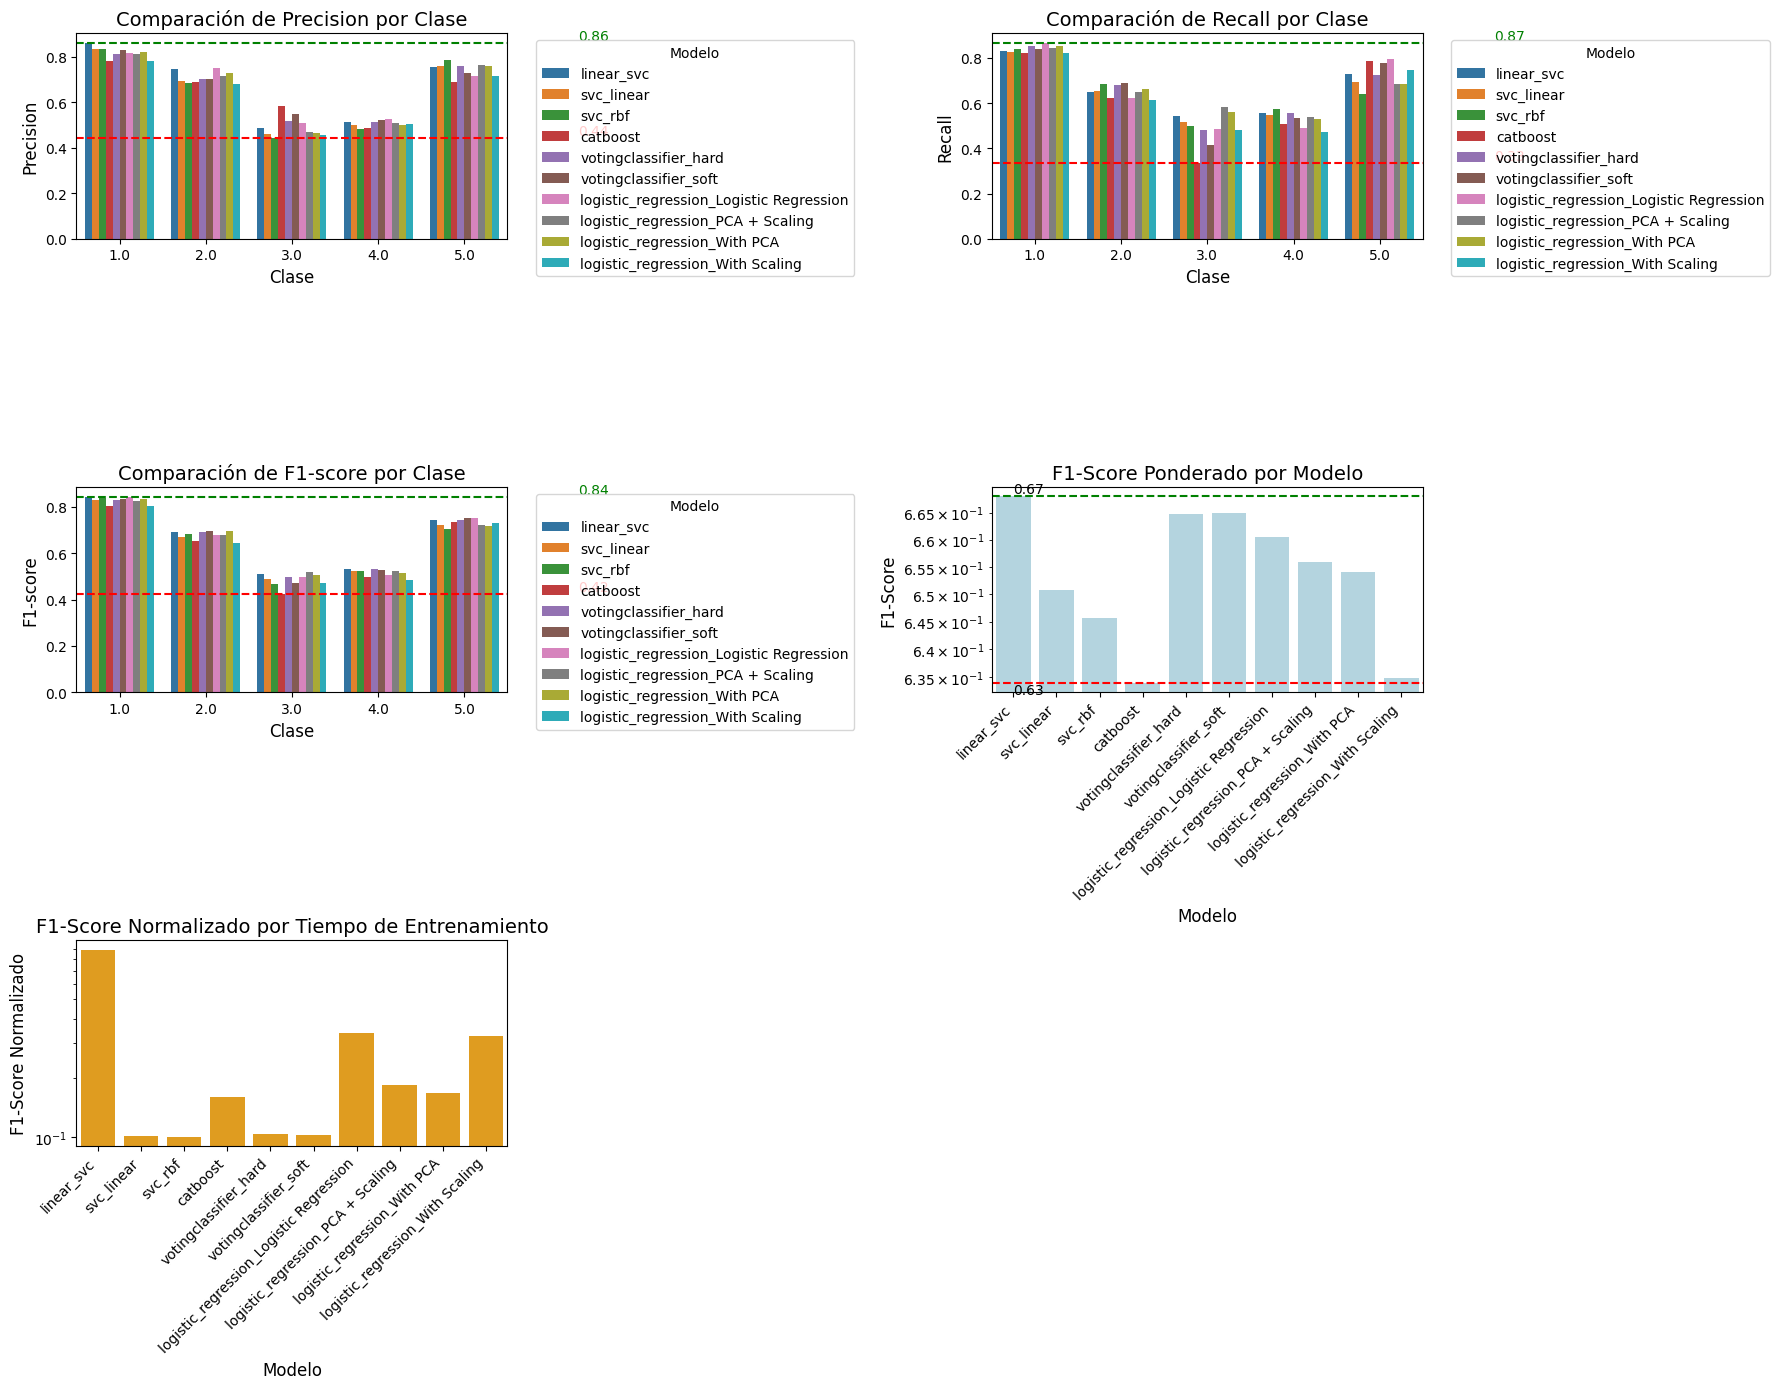

<Figure size 640x480 with 0 Axes>


Métricas ponderadas por modelo:


precision    recall  f1-score  \
Modelo                                                                   
linear_svc                                0.673523  0.664554  0.668066   
svc_linear                                0.656937  0.646758  0.650781   
svc_rbf                                   0.659183  0.639688  0.645685   
catboost                                  0.637711  0.641638  0.634027   
votingclassifier_hard                     0.666336  0.664066  0.664677   
votingclassifier_soft                     0.664254  0.668698  0.664945   
logistic_regression_Logistic Regression   0.660343  0.664310  0.660416   
logistic_regression_PCA + Scaling         0.663621  0.651877  0.655858   
logistic_regression_With PCA              0.661348  0.650171  0.654102   
logistic_regression_With Scaling          0.634244  0.636763  0.634901   

                                         f1-score_normalized  
Modelo                                                        
linear_svc                                          0.891904  
svc_linear                                          0.102206  
svc_rbf                                             0.101073  
catboost                                            0.160626  
votingclassifier_hard                               0.103578  
votingclassifier_soft                               0.102377  
logistic_regression_Logistic Regression             0.339130  
logistic_regression_PCA + Scaling                   0.185004  
logistic_regression_With PCA                        0.168062  
logistic_regression_With Scaling                    0.327033

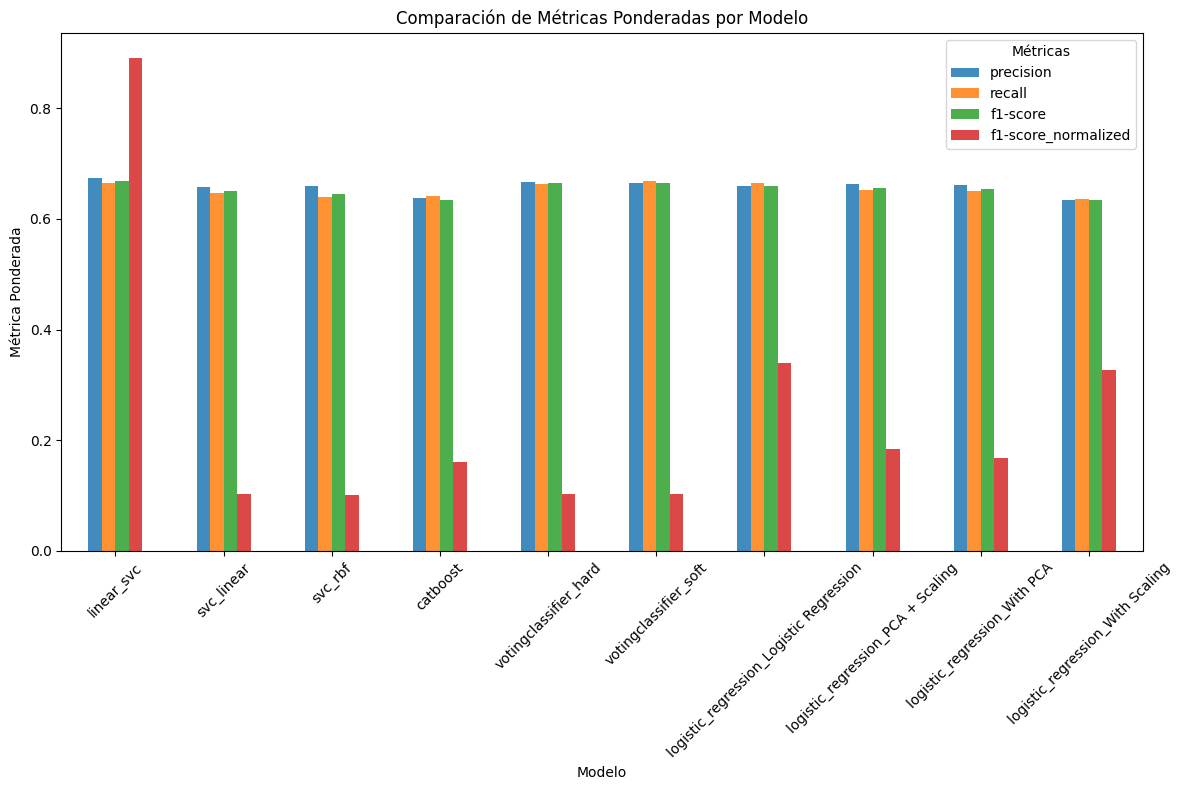


El mejor modelo por f1-score es linear_svc con un F1-Score ponderado de 0.6681.

El mejor modelo por relación score/tiempo es linear_svc con un F1-Score normalizado de 0.8919.


In [7]:
try:
    cms = [cm_test_linear_svc, cm_test_linear_svc, cm_test_svc_rbf, cm_test_catboost]
except:
    cms = None

logistic_regression_models = ["\"logistic_regression_Logistic Regression5\"", "\"logistic_regression_PCA + Scaling5\"", "\"logistic_regression_With PCA5\"", "\"logistic_regression_With Scaling5\""]
compare_models (models + logistic_regression_models, cms)

## Datos para 3 clases

### Instanciación de modelos con los mejores parámetros encontrados y evalucación para 3 clases

In [3]:
models = ["linear_svc_3clases", "svc_linear_3clases", "svc_rbf_3clases", "catboost_3clases", "ensemble_hard_3clases", "ensemble_soft_3clases", "weighted_ensemble_3clases"]

##### LinearSVC (liblinear) para 3 clases

[I 2024-12-12 17:01:47,684] Using an existing study with name 'linear_svc' instead of creating a new one.


{'C': 0.075}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 OneVsOneClassifier(estimator=LinearSVC(C=0.075,
                                                        class_weight='balanced',
                                                        max_iter=20000,
                                                        random_state=42)))])>

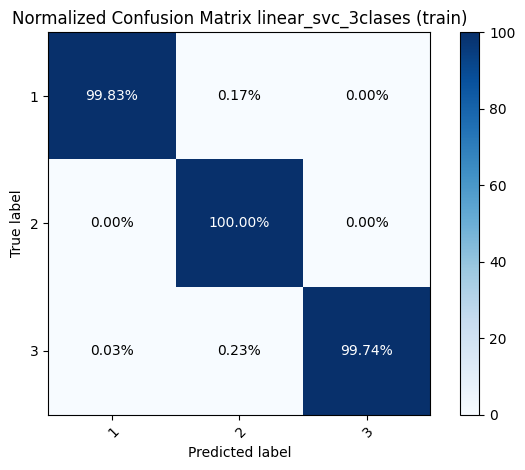

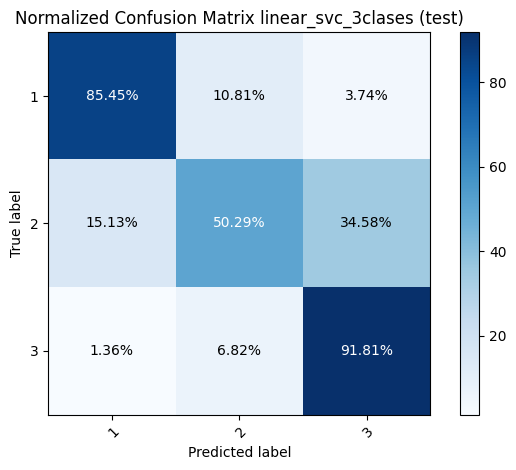

'Y Test'

(array([0, 1, 2], dtype=int64), array([1175,  509, 2418], dtype=int64))

'Y Test Predictions'

(array([0, 1, 2], dtype=int64), array([1114,  548, 2440], dtype=int64))

Score for linear_svc_3clases


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             0   0.901257  0.854468  0.877239   1175.0       NaN         NaN   
1             1   0.467153  0.502947  0.484390    509.0       NaN         NaN   
2             2   0.909836  0.918114  0.913956   2418.0       NaN         NaN   
3      accuracy        NaN       NaN       NaN      NaN  0.848367         NaN   
4     macro avg   0.759415  0.758510  0.758528   4102.0       NaN         NaN   
5  weighted avg   0.852448  0.848367  0.850136   4102.0       NaN         NaN   
6    time_train        NaN       NaN       NaN      NaN       NaN     2.16629   

       Modelo  
0  linear_svc  
1  linear_svc  
2  linear_svc  
3  linear_svc  
4  linear_svc  
5  linear_svc  
6  linear_svc

In [ ]:
model_config = "linear_svc"
optuna_db = create_db(model_config, 3)
pipeline_linear_svc_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

start_time = time.time()
pipeline_linear_svc_3.fit(X_train_three, y_train_three)
end_time = time.time()
execution_time = end_time - start_time

y_train_pred = pipeline_linear_svc_3.predict(X_train_three)
y_test_pred = pipeline_linear_svc_3.predict(X_test_three)

cm_test_linear_svc, report_test_linear_svc = test_scoring(model_config, models[0], y_train_three, y_train_pred, y_test_three, y_test_pred, execution_time)

##### SVC kernel linear (LibSVM) para 3 clases

[I 2024-12-12 17:02:36,571] Using an existing study with name 'svc_linear' instead of creating a new one.


{'C': 0.22}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, max_features=10000, min_df=10,
                                 ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 SVC(C=0.22, class_weight='balanced',
                     decision_function_shape='ovo', kernel='linear',
                     max_iter=20000, probability=True, random_state=42))])>

C:\Users\Pablo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


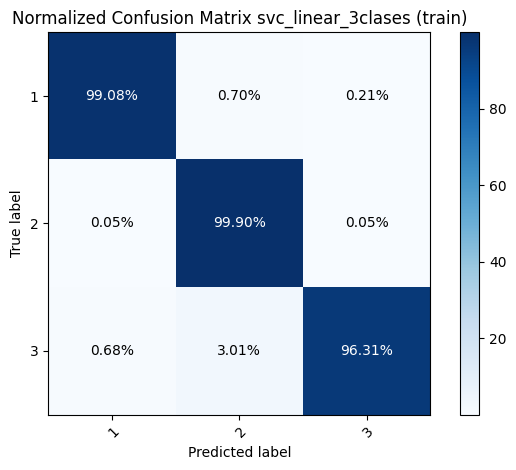

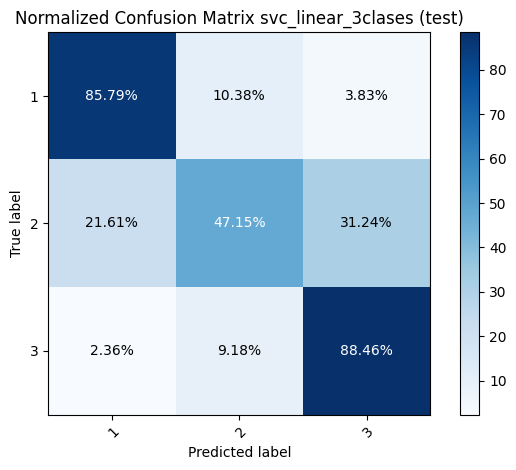

'Y Test'

(array([0, 1, 2], dtype=int64), array([1175,  509, 2418], dtype=int64))

'Y Test Predictions'

(array([0, 1, 2], dtype=int64), array([1175,  584, 2343], dtype=int64))

Score for svc_linear_3clases


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             0   0.857872  0.857872  0.857872   1175.0       NaN         NaN   
1             1   0.410959  0.471513  0.439158    509.0       NaN         NaN   
2             2   0.912932  0.884615  0.898551   2418.0       NaN         NaN   
3      accuracy        NaN       NaN       NaN      NaN  0.825695         NaN   
4     macro avg   0.727254  0.738000  0.731860   4102.0       NaN         NaN   
5  weighted avg   0.834873  0.825695  0.829894   4102.0       NaN         NaN   
6    time_train        NaN       NaN       NaN      NaN       NaN  333.841285   

       Modelo  
0  svc_linear  
1  svc_linear  
2  svc_linear  
3  svc_linear  
4  svc_linear  
5  svc_linear  
6  svc_linear

In [ ]:
model_config = "svc_linear"
optuna_db = create_db(model_config, 3)
pipeline_svc_linear_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

start_time = time.time()
pipeline_svc_linear_3.fit(X_train_three, y_train_three)
end_time = time.time()
execution_time = end_time - start_time

y_train_pred = pipeline_svc_linear_3.predict(X_train_three)
y_test_pred = pipeline_svc_linear_3.predict(X_test_three)

cm_test_linear_svc, report_test_svc_linear = test_scoring(model_config, models[1], y_train_three, y_train_pred, y_test_three, y_test_pred, execution_time)

##### SVC kernel rbf (LibSVM) para 3 clases

[I 2024-12-12 17:09:27,922] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 1.8, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1.8, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

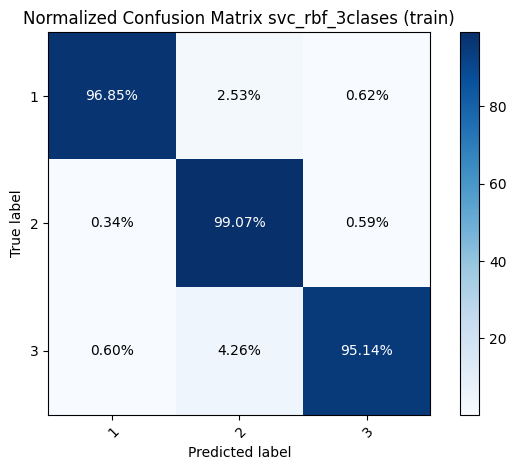

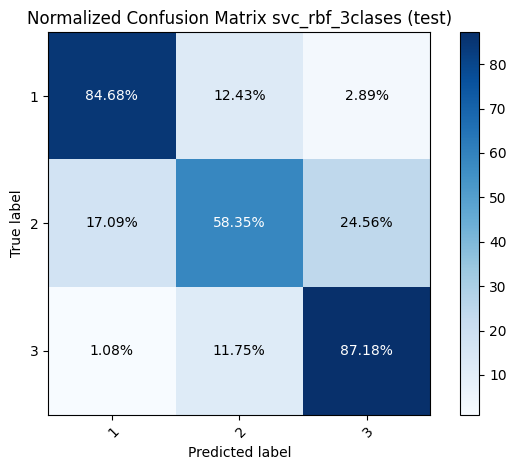

'Y Test'

(array([0, 1, 2], dtype=int64), array([1175,  509, 2418], dtype=int64))

'Y Test Predictions'

(array([0, 1, 2], dtype=int64), array([1108,  727, 2267], dtype=int64))

Score for svc_rbf_3clases


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             0   0.898014  0.846809  0.871660   1175.0       NaN         NaN   
1             1   0.408528  0.583497  0.480583    509.0       NaN         NaN   
2             2   0.929863  0.871795  0.899893   2418.0       NaN         NaN   
3      accuracy        NaN       NaN       NaN      NaN  0.828864         NaN   
4     macro avg   0.745469  0.767367  0.750712   4102.0       NaN         NaN   
5  weighted avg   0.856050  0.828864  0.839775   4102.0       NaN         NaN   
6    time_train        NaN       NaN       NaN      NaN       NaN   437.56713   

    Modelo  
0  svc_rbf  
1  svc_rbf  
2  svc_rbf  
3  svc_rbf  
4  svc_rbf  
5  svc_rbf  
6  svc_rbf

In [ ]:
model_config = "svc_rbf"
optuna_db = create_db(model_config, 3)
pipeline_svc_rbf_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

start_time = time.time()
pipeline_svc_rbf_3.fit(X_train_three, y_train_three)
end_time = time.time()
execution_time = end_time - start_time

y_train_pred = pipeline_svc_rbf_3.predict(X_train_three)
y_test_pred = pipeline_svc_rbf_3.predict(X_test_three)

cm_test_svc_rbf, report_test_svc_rbf = test_scoring(model_config, models[2], y_train_three, y_train_pred, y_test_three, y_test_pred, execution_time)

##### Catboost para 3 clases (GPU)

[I 2024-12-12 17:18:36,004] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1500, 'iterations': 2500, 'depth': 6}

Recreating catboost classifier due to error: {e}


<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1500, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000235F08A0380>)])>

0:	learn: 1.0753384	total: 17.2ms	remaining: 17.2s
1:	learn: 1.0534113	total: 31.2ms	remaining: 15.6s
2:	learn: 1.0325018	total: 45.3ms	remaining: 15.1s
3:	learn: 1.0128127	total: 60ms	remaining: 14.9s
4:	learn: 0.9940471	total: 74.6ms	remaining: 14.8s
5:	learn: 0.9759238	total: 88.8ms	remaining: 14.7s
6:	learn: 0.9586972	total: 103ms	remaining: 14.7s
7:	learn: 0.9424362	total: 118ms	remaining: 14.6s
8:	learn: 0.9265664	total: 133ms	remaining: 14.6s
9:	learn: 0.9117296	total: 147ms	remaining: 14.6s
10:	learn: 0.8973540	total: 162ms	remaining: 14.6s
11:	learn: 0.8834012	total: 177ms	remaining: 14.6s
12:	learn: 0.8701665	total: 191ms	remaining: 14.5s
13:	learn: 0.8575359	total: 208ms	remaining: 14.7s
14:	learn: 0.8451323	total: 225ms	remaining: 14.8s
15:	learn: 0.8334843	total: 240ms	remaining: 14.8s
16:	learn: 0.8221741	total: 255ms	remaining: 14.7s
17:	learn: 0.8114342	total: 270ms	remaining: 14.8s
18:	learn: 0.8009161	total: 285ms	remaining: 14.7s
19:	learn: 0.7907830	total: 300ms	rem

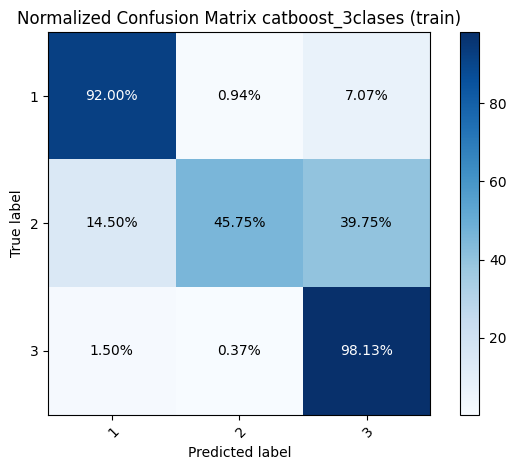

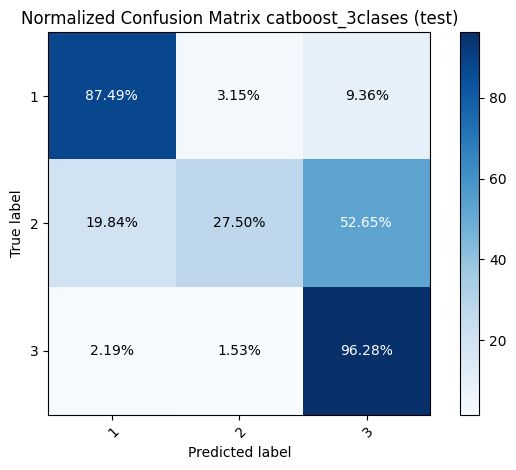

'Y Test'

(array([0, 1, 2], dtype=int64), array([1175,  509, 2418], dtype=int64))

'Y Test Predictions'

(array([0, 1, 2], dtype=int64), array([1182,  214, 2706], dtype=int64))

Score for catboost_3clases


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             0   0.869712  0.874894  0.872295   1175.0       NaN         NaN   
1             1   0.654206  0.275049  0.387275    509.0       NaN         NaN   
2             2   0.860310  0.962779  0.908665   2418.0       NaN         NaN   
3      accuracy        NaN       NaN       NaN      NaN  0.852267         NaN   
4     macro avg   0.794743  0.704241  0.722745   4102.0       NaN         NaN   
5  weighted avg   0.837429  0.852267  0.833550   4102.0       NaN         NaN   
6    time_train        NaN       NaN       NaN      NaN       NaN   53.399285   

     Modelo  
0  catboost  
1  catboost  
2  catboost  
3  catboost  
4  catboost  
5  catboost  
6  catboost

In [ ]:
model_config = "catboost"
optuna_db = create_db(model_config, 3)
pipeline_catboost_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

start_time = time.time()
pipeline_catboost_3.fit(X_train_three, y_train_three)
end_time = time.time()
execution_time = end_time - start_time

y_train_pred = pipeline_catboost_3.predict(X_train_three)
y_test_pred = pipeline_catboost_3.predict(X_test_three)

cm_test_catboost, report_test_catboost = test_scoring(model_config, models[3], y_train_three, y_train_pred, y_test_three, y_test_pred, execution_time)

### Ensemble

#### Hard voting classifier

[I 2024-12-12 17:19:37,040] Using an existing study with name 'linear_svc' instead of creating a new one.


{'C': 0.075}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 OneVsOneClassifier(estimator=LinearSVC(C=0.075,
                                                        class_weight='balanced',
                                                        max_iter=20000,
                                                        random_state=42)))])>

[I 2024-12-12 17:19:37,070] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 1.8, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1.8, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

[I 2024-12-12 17:19:37,100] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1500, 'iterations': 2500, 'depth': 6}

Recreating catboost classifier due to error: {e}


<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1500, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000235F08A0380>)])>

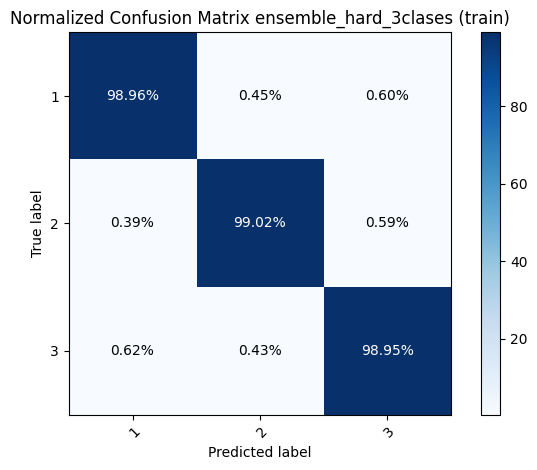

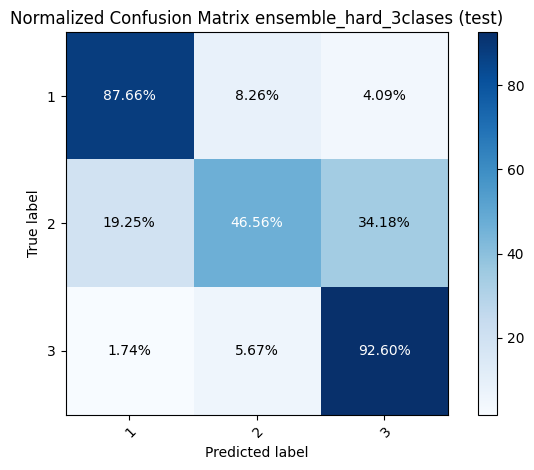

'Y Test'

(array([0, 1, 2], dtype=int64), array([1175,  509, 2418], dtype=int64))

'Y Test Predictions'

(array([0, 1, 2], dtype=int64), array([1170,  471, 2461], dtype=int64))

Score for ensemble_hard_3clases


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             0   0.880342  0.876596  0.878465   1175.0       NaN         NaN   
1             1   0.503185  0.465619  0.483673    509.0       NaN         NaN   
2             2   0.909793  0.925972  0.917811   2418.0       NaN         NaN   
3      accuracy        NaN       NaN       NaN      NaN  0.854705         NaN   
4     macro avg   0.764440  0.756062  0.759983   4102.0       NaN         NaN   
5  weighted avg   0.850902  0.854705  0.852670   4102.0       NaN         NaN   
6    time_train        NaN       NaN       NaN      NaN       NaN   452.75824   

                  Modelo  
0  votingclassifier_hard  
1  votingclassifier_hard  
2  votingclassifier_hard  
3  votingclassifier_hard  
4  votingclassifier_hard  
5  votingclassifier_hard  
6  votingclassifier_hard

In [ ]:
model_config = "linear_svc"
optuna_db = create_db(model_config, 3)
linear_svc_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "svc_rbf"
optuna_db = create_db(model_config, 3)
svc_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "catboost"
optuna_db = create_db(model_config, 3)
catboost_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)
catboost_3 = CatBoostWrapper(catboost_3)

classifiers = [('LinearSVC', linear_svc_3),
               ('SVC RBF', svc_3),
               ('Catboost', catboost_3),
              ]

vc = VotingClassifier(estimators=classifiers, voting="hard", verbose=True, n_jobs=-1)

start_time = time.time()
vc.fit(X_train_three, y_train_three)
end_time = time.time()
execution_time = end_time - start_time

y_train_pred = vc.predict(X_train_three)
y_test_pred = vc.predict(X_test_three)

cm_test_ensemble_hard, report_test_ensemble_hard = test_scoring("votingclassifier_hard", models[4], y_train_three, y_train_pred, y_test_three, y_test_pred, execution_time)

#### Soft voting classifier

[I 2024-12-12 17:29:13,999] Using an existing study with name 'svc_linear' instead of creating a new one.


{'C': 0.22}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, max_features=10000, min_df=10,
                                 ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 SVC(C=0.22, class_weight='balanced',
                     decision_function_shape='ovo', kernel='linear',
                     max_iter=20000, probability=True, random_state=42))])>

[I 2024-12-12 17:29:14,035] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 1.8, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1.8, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

[I 2024-12-12 17:29:14,071] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1500, 'iterations': 2500, 'depth': 6}

Recreating catboost classifier due to error: {e}


<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1500, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000235F08A0380>)])>

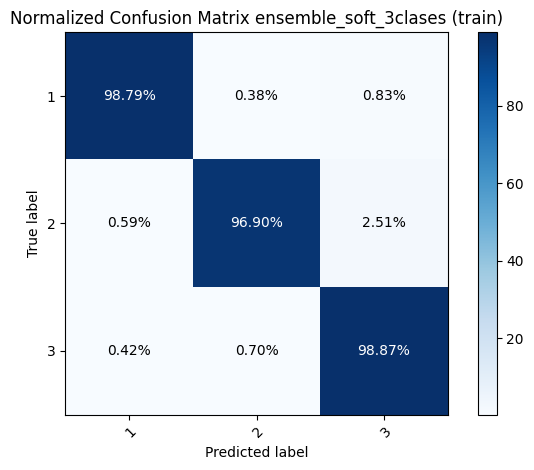

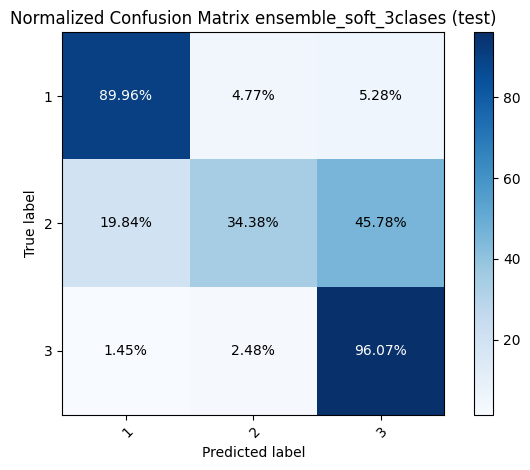

'Y Test'

(array([0, 1, 2], dtype=int64), array([1175,  509, 2418], dtype=int64))

'Y Test Predictions'

(array([0, 1, 2], dtype=int64), array([1193,  291, 2618], dtype=int64))

Score for ensemble_soft_3clases


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             0   0.886002  0.899574  0.892736   1175.0       NaN         NaN   
1             1   0.601375  0.343811  0.437500    509.0       NaN         NaN   
2             2   0.887319  0.960711  0.922558   2418.0       NaN         NaN   
3      accuracy        NaN       NaN       NaN      NaN   0.86665         NaN   
4     macro avg   0.791565  0.734699  0.750931   4102.0       NaN         NaN   
5  weighted avg   0.851460  0.866650  0.853827   4102.0       NaN         NaN   
6    time_train        NaN       NaN       NaN      NaN       NaN  461.914994   

                  Modelo  
0  votingclassifier_soft  
1  votingclassifier_soft  
2  votingclassifier_soft  
3  votingclassifier_soft  
4  votingclassifier_soft  
5  votingclassifier_soft  
6  votingclassifier_soft

In [ ]:
model_config = "svc_linear"
optuna_db = create_db(model_config, 3)
svc_linear_32 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "svc_rbf"
optuna_db = create_db(model_config, 3)
svc_32 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "catboost"
optuna_db = create_db(model_config, 3)
catboost_32 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)
catboost_32 = CatBoostWrapper(catboost_32)

classifiers = [('SVC', svc_32),
               ('SVC Linear', svc_linear_32),
               ('Catboost', catboost_32)
              ]

vc = VotingClassifier(estimators=classifiers, voting="soft", verbose=True, n_jobs=-1)

start_time = time.time()
vc.fit(X_train_three, y_train_three)
end_time = time.time()
execution_time = end_time - start_time

y_train_pred = vc.predict(X_train_three)
y_test_pred = vc.predict(X_test_three)

cm_test_ensemble_soft, report_test_ensemble_soft = test_scoring("votingclassifier_soft", models[5], y_train_three, y_train_pred, y_test_three, y_test_pred, execution_time)

### Comparación de modelos

Clase  precision    recall  f1-score  support  accuracy  \
0              0   0.901257  0.854468  0.877239   1175.0       NaN   
1              1   0.467153  0.502947  0.484390    509.0       NaN   
2              2   0.909836  0.918114  0.913956   2418.0       NaN   
3       accuracy        NaN       NaN       NaN      NaN  0.848367   
4      macro avg   0.759415  0.758510  0.758528   4102.0       NaN   
..           ...        ...       ...       ...      ...       ...   
65             2   0.888933  0.923490  0.905882   2418.0       NaN   
66      accuracy        NaN       NaN       NaN      NaN  0.838859   
67     macro avg   0.741687  0.726619  0.733385   4102.0       NaN   
68  weighted avg   0.832266  0.838859  0.835096   4102.0       NaN   
69    time_train        NaN       NaN       NaN      NaN       NaN   

    time_train                            Modelo  
0          NaN                        linear_svc  
1          NaN                        linear_svc  
2          NaN                        linear_svc  
3          NaN                        linear_svc  
4          NaN                        linear_svc  
..         ...                               ...  
65         NaN  logistic_regression_With Scaling  
66         NaN  logistic_regression_With Scaling  
67         NaN  logistic_regression_With Scaling  
68         NaN  logistic_regression_With Scaling  
69    5.960535  logistic_regression_With Scaling  

[70 rows x 8 columns]

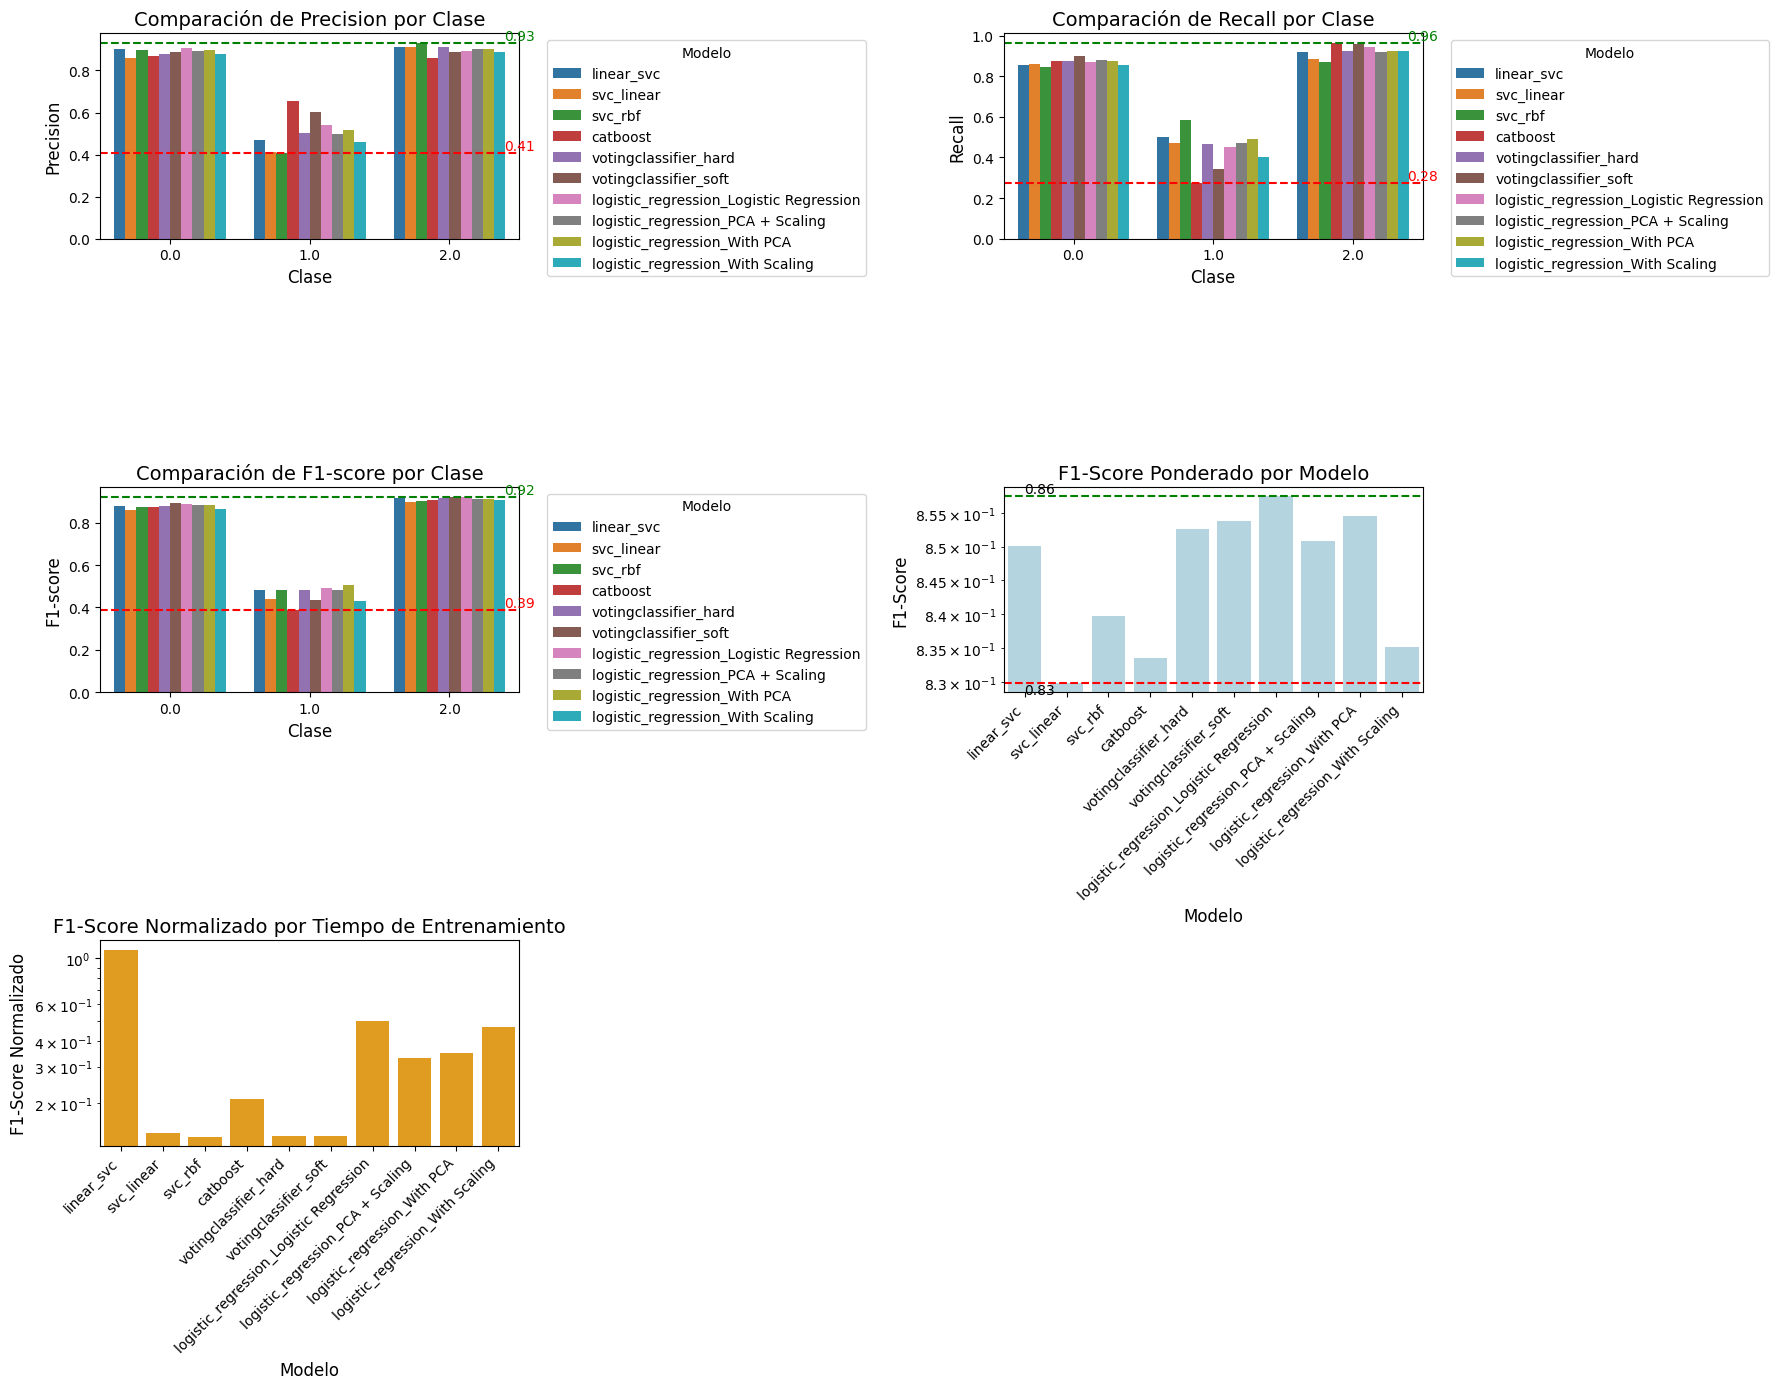

<Figure size 640x480 with 0 Axes>


Métricas ponderadas por modelo:


precision    recall  f1-score  \
Modelo                                                                   
linear_svc                                0.852448  0.848367  0.850136   
svc_linear                                0.834873  0.825695  0.829894   
svc_rbf                                   0.856050  0.828864  0.839775   
catboost                                  0.837429  0.852267  0.833550   
votingclassifier_hard                     0.850902  0.854705  0.852670   
votingclassifier_soft                     0.851460  0.866650  0.853827   
logistic_regression_Logistic Regression   0.854962  0.862262  0.857553   
logistic_regression_PCA + Scaling         0.849730  0.852267  0.850904   
logistic_regression_With PCA              0.853615  0.855924  0.854614   
logistic_regression_With Scaling          0.832266  0.838859  0.835096   

                                         f1-score_normalized  
Modelo                                                        
linear_svc                                          1.099765  
svc_linear                                          0.142823  
svc_rbf                                             0.138093  
catboost                                            0.209551  
votingclassifier_hard                               0.139431  
votingclassifier_soft                               0.139164  
logistic_regression_Logistic Regression             0.497174  
logistic_regression_PCA + Scaling                   0.332032  
logistic_regression_With PCA                        0.350938  
logistic_regression_With Scaling                    0.467799

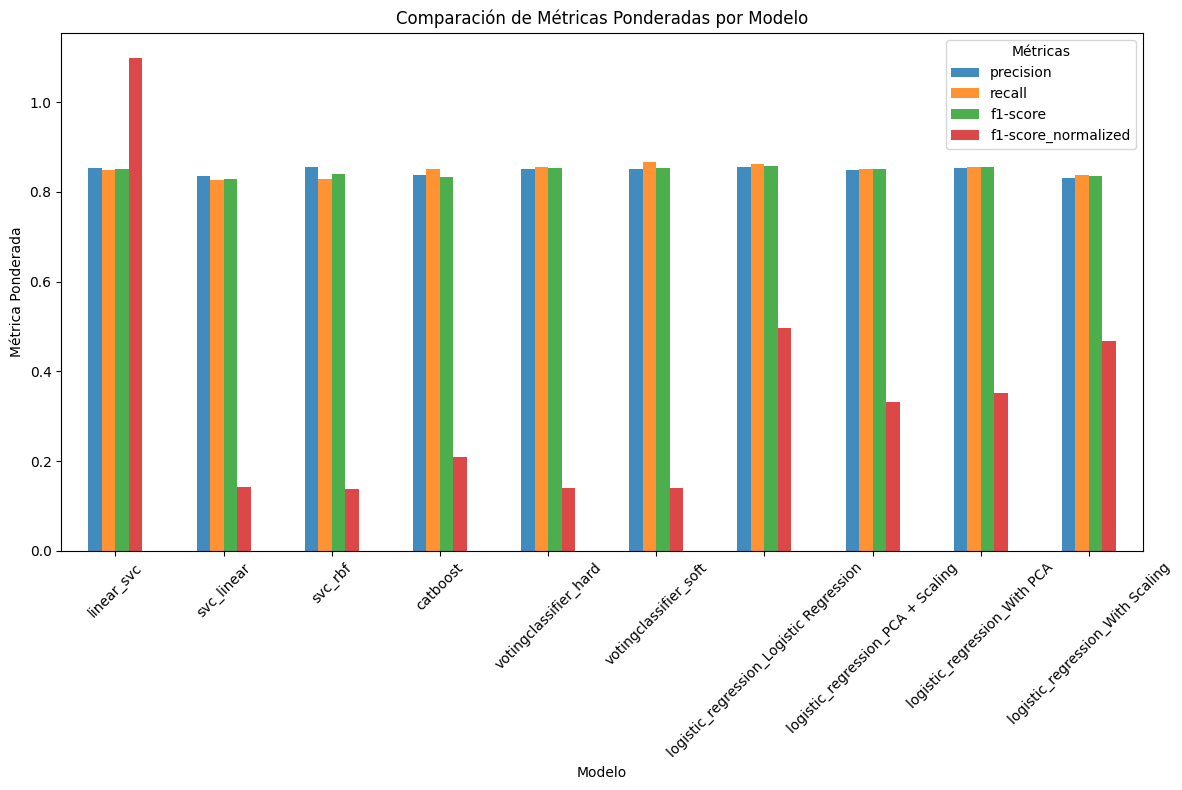


El mejor modelo por f1-score es logistic_regression_Logistic Regression con un F1-Score ponderado de 0.8576.

El mejor modelo por relación score/tiempo es linear_svc con un F1-Score normalizado de 1.0998.


In [4]:
try:
    cms = [cm_test_linear_svc, cm_test_linear_svc, cm_test_svc_rbf, cm_test_catboost]
except:
    cms = None

logistic_regression_models = ["\"logistic_regression_Logistic Regression3\"", "\"logistic_regression_PCA + Scaling3\"", "\"logistic_regression_With PCA3\"", "\"logistic_regression_With Scaling3\""]
compare_models (models[:-1] + logistic_regression_models, cms)

#### Test ponderando por clase y modelo

In [ ]:
class WeightedVotingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimators, class_weights):
        """
        Parameters:
        - estimators: list of (str, estimator) tuples
            Modelos que se usarán en el clasificador.
        - class_weights: dict of {class_label: list of weights}
            Pesos por clase para cada estimador.
        """
        self.estimators = estimators
        self.class_weights = class_weights

    def fit(self, X, y):
        for _, estimator in self.estimators:
            estimator.fit(X, y)
        return self

    def predict_proba(self, X):
        # Inicializamos las probabilidades acumuladas por clase
        weighted_probas = np.zeros((X.shape[0], len(self.class_weights)))

        for idx, (_, estimator) in enumerate(self.estimators):
            probas = estimator.predict_proba(X)
            for class_idx, weight in enumerate(self.class_weights.values()):
                weighted_probas[:, class_idx] += probas[:, class_idx] * weight[idx]

        # Normalizamos para que las probabilidades sumen 1
        return weighted_probas / weighted_probas.sum(axis=1, keepdims=True)

    def predict(self, X):
        probas = self.predict_proba(X)
        return np.argmax(probas, axis=1)


[I 2024-12-12 17:40:11,899] Using an existing study with name 'svc_linear' instead of creating a new one.


{'C': 0.22}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, max_features=10000, min_df=10,
                                 ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 SVC(C=0.22, class_weight='balanced',
                     decision_function_shape='ovo', kernel='linear',
                     max_iter=20000, probability=True, random_state=42))])>

[I 2024-12-12 17:40:11,934] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 1.8, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1.8, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

[I 2024-12-12 17:40:11,963] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1500, 'iterations': 2500, 'depth': 6}

Recreating catboost classifier due to error: {e}


<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1500, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000235F08A0380>)])>

C:\Users\Pablo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0:	learn: 1.0753385	total: 16.9ms	remaining: 16.9s
1:	learn: 1.0534112	total: 31.7ms	remaining: 15.8s
2:	learn: 1.0325016	total: 45.4ms	remaining: 15.1s
3:	learn: 1.0128127	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9940471	total: 74.3ms	remaining: 14.8s
5:	learn: 0.9759238	total: 88.6ms	remaining: 14.7s
6:	learn: 0.9586971	total: 103ms	remaining: 14.6s
7:	learn: 0.9424361	total: 117ms	remaining: 14.6s
8:	learn: 0.9265664	total: 135ms	remaining: 14.8s
9:	learn: 0.9117295	total: 149ms	remaining: 14.7s
10:	learn: 0.8973541	total: 166ms	remaining: 15s
11:	learn: 0.8834013	total: 182ms	remaining: 15s
12:	learn: 0.8701665	total: 197ms	remaining: 14.9s
13:	learn: 0.8575359	total: 211ms	remaining: 14.9s
14:	learn: 0.8451323	total: 226ms	remaining: 14.8s
15:	learn: 0.8334842	total: 240ms	remaining: 14.8s
16:	learn: 0.8221741	total: 255ms	remaining: 14.8s
17:	learn: 0.8114341	total: 271ms	remaining: 14.8s
18:	learn: 0.8009161	total: 286ms	remaining: 14.7s
19:	learn: 0.7907832	total: 300ms	remai

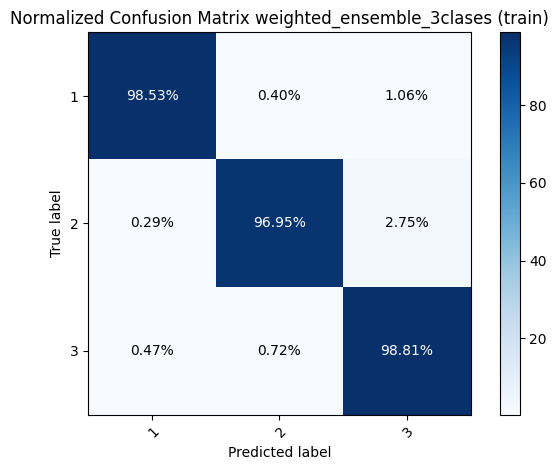

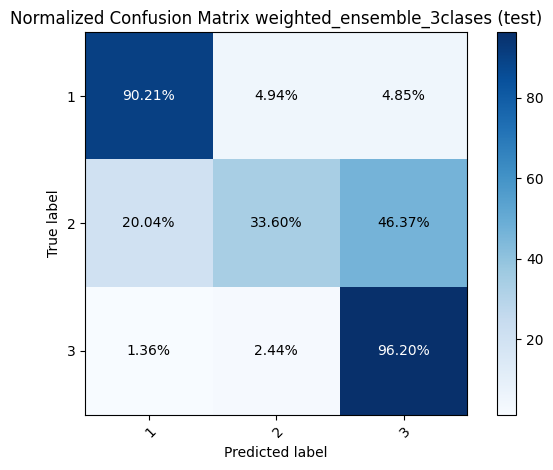

'Y Test'

(array([0, 1, 2], dtype=int64), array([1175,  509, 2418], dtype=int64))

'Y Test Predictions'

(array([0, 1, 2], dtype=int64), array([1195,  288, 2619], dtype=int64))

Score for weighted_ensemble_3clases


Clase  precision    recall  f1-score  support  accuracy  time_train  \
0             0   0.887029  0.902128  0.894515   1175.0       NaN         NaN   
1             1   0.593750  0.335953  0.429109    509.0       NaN         NaN   
2             2   0.888125  0.961952  0.923566   2418.0       NaN         NaN   
3      accuracy        NaN       NaN       NaN      NaN  0.867138         NaN   
4     macro avg   0.789635  0.733344  0.749063   4102.0       NaN         NaN   
5  weighted avg   0.851284  0.867138  0.853889   4102.0       NaN         NaN   
6    time_train        NaN       NaN       NaN      NaN       NaN    818.8405   

                      Modelo  
0  weighted_votingclassifier  
1  weighted_votingclassifier  
2  weighted_votingclassifier  
3  weighted_votingclassifier  
4  weighted_votingclassifier  
5  weighted_votingclassifier  
6  weighted_votingclassifier

In [ ]:
model_config = "svc_linear"
optuna_db = create_db(model_config, 3)
svc_linear_32 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "svc_rbf"
optuna_db = create_db(model_config, 3)
svc_32 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "catboost"
optuna_db = create_db(model_config, 3)
catboost_32 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)
catboost_32 = CatBoostWrapper(catboost_32)

classifiers = [('SVC', svc_32),
               ('SVC Linear', svc_linear_32),
               ('Catboost', catboost_32)
              ]

# Clasificador personalizado
voting_clf = WeightedVotingClassifier(
    estimators=classifiers,
    class_weights={
        0: [0.6, 0.2, 0.2],  # Pesos para clase 0
        1: [0.2, 0.6, 0.2],  # Pesos para clase 1
        2: [0.3, 0.2, 0.5],  # Pesos para clase 2
    }
)

start_time = time.time()
voting_clf.fit(X_train_three, y_train_three)
end_time = time.time()
execution_time = end_time - start_time

y_train_pred = voting_clf.predict(X_train_three)
y_test_pred = voting_clf.predict(X_test_three)

cm_test_ensemble_test, report_test_ensemble_test = test_scoring("weighted_votingclassifier", models[6], y_train_three, y_train_pred, y_test_three, y_test_pred, execution_time)